# Parcours Data Scientist - Yann Pham-Van

## Projet 3 : Concevez une application au service de la santé publique

**Mission**

L'agence "Santé publique France" a lancé **un appel à projets pour trouver des idées innovantes d’applications en lien avec l'alimentation**. Vous souhaitez y participer et proposer une idée d’application.

**Les données**

Extrait de l’appel à projets :

Le jeu de données Open Food Facts est disponible sur le site officiel (ou disponible à ce lien en téléchargement). Les variables sont définies à cette adresse.

Les champs sont séparés en quatre sections :

- Les informations générales sur la fiche du produit : nom, date de modification, etc.
- Un ensemble de tags : catégorie du produit, localisation, origine, etc.
- Les ingrédients composant les produits et leurs additifs éventuels.
- Des informations nutritionnelles : quantité en grammes d’un nutriment pour 100 grammes du produit.

**Votre mission**

Après avoir lu l’appel à projets, voici les différentes étapes que vous avez identifiées :

1) **Traiter le jeu de données**, en :

- **Réfléchissant à une idée d’application**.
- **Repérant des variables pertinentes** pour les traitements à venir, et nécessaires pour votre idée d’application.
- **Nettoyant les données** en :
    - mettant en évidence les éventuelles **valeurs manquantes**, avec au moins 3 méthodes de traitement adaptées aux variables concernées,
    - identifiant et en quantifiant les éventuelles **valeurs aberrantes** de chaque variable.
- **Automatisant ces traitements** pour éviter de répéter ces opérations

Le programme doit fonctionner si la base de données est légèrement modifiée (ajout d’entrées, par exemple).

2) Tout au long de l’analyse, **produire des visualisations** afin de mieux comprendre les données.

**Effectuer une analyse univariée** pour chaque variable intéressante, afin de synthétiser son comportement.

L’appel à projets spécifie que l’analyse doit être simple à comprendre pour un public néophyte. **Soyez donc attentif à la lisibilité** : taille des textes, choix des couleurs, netteté suffisante, et variez les graphiques (boxplots, histogrammes, diagrammes circulaires, nuages de points…) pour illustrer au mieux votre propos.

3) **Confirmer ou infirmer les hypothèses à l’aide d’une analyse multivariée. Effectuer les tests statistiques appropriés** pour vérifier la significativité des résultats.

4) **Justifier votre idée d’application**. Identifier des arguments justifiant la faisabilité (ou non) de l’application à partir des données Open Food Facts.

5) **Rédiger un rapport d’exploration** et **pitcher votre idée** durant la soutenance du projet.

# Etape 2 - Analyse exploratoire

Appel des librairies utilisées

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Chargement du dataframe nettoyé

In [2]:
df = pd.read_csv('off_propre.csv', low_memory=False)
df.head(5)

code                    product_name              brands  \
0  0000000290616                    Salade Cesar  Kirkland Signature   
1  0000000394710  Danoises à la cannelle roulées  Kirkland Signature   
2  0000001071894                           Flute            Waitrose   
3  0000001938067    Chaussons tressés aux pommes  Kirkland Signature   
4  0000005200016               lentilles vertes     Bertrand Lejeune   

  countries_fr          pnns_groups_1       pnns_groups_2 nutrition_grade_fr  \
0       Canada  Fruits and vegetables          Vegetables                  c   
1       Canada          Sugary snacks  Biscuits and cakes                  e   
2  Royaume-Uni   Cereals and potatoes               Bread                  b   
3       Canada          Sugary snacks  Biscuits and cakes                  c   
4       France   Cereals and potatoes             Legumes                  a   

   energy_100g  saturated-fat_100g  sodium_100g  sugars_100g  proteins_100g  \
0       1210.0               7.000     0.850000          0.0          22.00   
1       1520.0               9.600     0.363000         28.1           4.79   
2       1240.5               0.600     0.472441          4.2           9.20   
3       1090.0               2.000     0.255000         24.7           3.33   
4        579.0               0.275     0.224705          1.3          12.70   

   fiber_100g  fruits-vegetables-nuts_100g  fat_100g  nutrition-score-fr_100g  
0        2.00                         80.0      12.0                      6.0  
1        2.05                         20.0      14.4                     19.0  
2        4.40                          0.0       4.3                      1.0  
3        2.00                         20.0      10.7                      9.0  
4        6.10                        100.0       1.7                     -4.0

Vérification de la complétude et de l'homogénéité des types de variables

In [3]:
df.isna().mean()

code                           0.0
product_name                   0.0
brands                         0.0
countries_fr                   0.0
pnns_groups_1                  0.0
pnns_groups_2                  0.0
nutrition_grade_fr             0.0
energy_100g                    0.0
saturated-fat_100g             0.0
sodium_100g                    0.0
sugars_100g                    0.0
proteins_100g                  0.0
fiber_100g                     0.0
fruits-vegetables-nuts_100g    0.0
fat_100g                       0.0
nutrition-score-fr_100g        0.0
dtype: float64

In [4]:
df.dtypes

code                            object
product_name                    object
brands                          object
countries_fr                    object
pnns_groups_1                   object
pnns_groups_2                   object
nutrition_grade_fr              object
energy_100g                    float64
saturated-fat_100g             float64
sodium_100g                    float64
sugars_100g                    float64
proteins_100g                  float64
fiber_100g                     float64
fruits-vegetables-nuts_100g    float64
fat_100g                       float64
nutrition-score-fr_100g        float64
dtype: object

## Partie 1 - Analyses univariées

Les variables qualitatives sont :
- code
- product_name
- brands
- countries_fr
- pnns_groups_1
- pnns_groups_2
- nutrition_grade_fr 

En théorie, il y a une variable quantitative discrète : nutrition-score-fr_100g.

In [5]:
df['nutrition-score-fr_100g'].unique()

array([  6. ,  19. ,   1. ,   9. ,  -4. ,   2. ,   4. ,  26. ,  10. ,
        13. ,  -5. ,  11. ,  12. ,  22. ,  14. ,  18. ,  20. ,  -2. ,
        23. ,   0. ,  -3. ,  -1. ,   8. ,  24. ,  25. ,  27. ,  17. ,
         5. ,   7. ,  -9. ,   3. ,  15. ,  -6. ,  21. ,  16. , -10. ,
        -7. ,  13.5,  29. ,  28. , -11. ,  -8. , -13. ,  30. ,  33. ,
        40. ,  31. , -12. ,  32. , -14. , -15. ,  35. ,  34. ,  37. ])

In [6]:
df.loc[df['nutrition-score-fr_100g']==13.5].head(5)

code                        product_name           brands  \
428   0029000073241        Unsalted dry roasted peanuts         Planters   
520        00362702  Sea Salt and Black Pepper Cashews    Mark & Spenser   
768        00462907                       Noix de cajou  Marks & Spencer   
1914  0207091023882                     Arachide Wasabi        Carrefour   
2178       03246481                         cashew nuts            Tesco   

            countries_fr pnns_groups_1 pnns_groups_2 nutrition_grade_fr  \
428           États-Unis  Salty snacks          Nuts                  d   
520               France  Salty snacks          Nuts                  d   
768   France,Royaume-Uni  Salty snacks          Nuts                  d   
1914              France  Salty snacks          Nuts                  d   
2178         Royaume-Uni  Salty snacks          Nuts                  d   

      energy_100g  saturated-fat_100g  sodium_100g  sugars_100g  \
428        2561.5                 6.4     0.051181          5.5   
520        2561.5                 6.4     0.051181          5.5   
768        2561.5                 6.4     0.051181          5.5   
1914       2561.5                 6.4     0.051181          5.5   
2178       2561.5                 6.4     0.051181          5.5   

      proteins_100g  fiber_100g  fruits-vegetables-nuts_100g  fat_100g  \
428            20.0        7.01                        100.0      50.3   
520            20.0        7.01                        100.0      50.3   
768            20.0        7.01                        100.0      50.3   
1914           20.0        7.01                        100.0      50.3   
2178           20.0        7.01                        100.0      50.3   

      nutrition-score-fr_100g  
428                      13.5  
520                      13.5  
768                      13.5  
1914                     13.5  
2178                     13.5

Mais avec l'imputation par la médiane sur les manquants, lors du nettoyage en étape 1, une modalité à *13.5* est apparue.

Je vais condidérer la variable comme quantitative continue.

Les autres variables quantitatives continues sont :
- energy_100g
- saturated-fat_100g
- sodium_100g
- sugars_100g
- proteins_100g
- fiber_100g
- fruits-vegetables-nuts_100g
- fat_100g

Je commence avec un tableau général des statistiques.

In [7]:
df.describe()

energy_100g  saturated-fat_100g   sodium_100g   sugars_100g  \
count  68312.000000        68312.000000  68312.000000  68312.000000   
mean    1041.704571            4.905401      0.315684     12.443710   
std      788.896727            7.895650      0.682572     18.121029   
min        0.000000            0.000000      0.000000      0.000000   
25%      326.000000            0.200000      0.014764      1.000000   
50%      899.000000            1.400000      0.196850      4.300000   
75%     1571.000000            6.800000      0.472441     13.800000   
max     3776.000000          100.000000     83.000000    100.000000   

       proteins_100g    fiber_100g  fruits-vegetables-nuts_100g      fat_100g  \
count   68312.000000  68312.000000                  68312.00000  68312.000000   
mean        7.245793      2.012958                     24.60125     12.406028   
std         7.285594      3.048444                     31.31600     17.094215   
min         0.000000      0.000000                      0.00000      0.000000   
25%         1.100000      0.100000                      0.00000      0.500000   
50%         5.600000      1.100000                     12.00000      5.500000   
75%        10.500000      2.600000                     33.15000     20.000000   
max        86.000000     94.800000                    100.00000    100.000000   

       nutrition-score-fr_100g  
count             68312.000000  
mean                  7.755848  
std                   8.925411  
min                 -15.000000  
25%                   1.000000  
50%                   6.000000  
75%                  14.000000  
max                  40.000000

Rien de surprenant au premier regard si ce n'est qu'avec un max de sodium à 83%, on peut affirmer qu'aucun paquet de sel n'est présent parmi les produits !!!

Il serait intéressant d'avoir ces informations par familles et sous-familles de produits.

In [8]:
df.groupby(['pnns_groups_1','pnns_groups_2']).describe()

energy_100g  \
                                                               count   
pnns_groups_1           pnns_groups_2                                  
Beverages               Artificially sweetened beverages       260.0   
                        Fruit juices                          1904.0   
                        Fruit nectars                          373.0   
                        Non sugared beverages                 4207.0   
                        Sweetened beverages                   2151.0   
Cereals and potatoes    Bread                                 1814.0   
                        Breakfast cereals                     1403.0   
                        Cereals                               4093.0   
                        Legumes                                917.0   
                        Potatoes                               162.0   
Composite foods         One dish meals                        5537.0   
                        Pizza pies and quiche                  508.0   
                        Sandwich                               679.0   
Fat and sauces          Dressings and sauces                  3560.0   
                        Fats                                  1599.0   
Fish meat eggs          Eggs                                   455.0   
                        Fish and seafood                      2616.0   
                        Meat                                  1678.0   
                        Processed meat                        3231.0   
Fruits and vegetables   Dried fruits                           490.0   
                        Fruits                                2106.0   
                        Soups                                  501.0   
                        Vegetables                            3758.0   
Milk and dairy products Cheese                                4002.0   
                        Dairy desserts                         780.0   
                        Ice cream                              717.0   
                        Milk and yogurt                       3271.0   
Salty snacks            Appetizers                            2085.0   
                        Nuts                                   685.0   
                        Salty and fatty products                19.0   
Sugary snacks           Biscuits and cakes                    4537.0   
                        Chocolate products                    3075.0   
                        Pastries                               493.0   
                        Sweets                                4646.0   

                                                                       \
                                                                 mean   
pnns_groups_1           pnns_groups_2                                   
Beverages               Artificially sweetened beverages    92.838962   
                        Fruit juices                       199.858792   
                        Fruit nectars                      196.419839   
                        Non sugared beverages              217.509101   
                        Sweetened beverages                328.616616   
Cereals and potatoes    Bread                             1336.150935   
                        Breakfast cereals                 1675.135282   
                        Cereals                           1361.556465   
                        Legumes                            877.278844   
                        Potatoes                           461.469136   
Composite foods         One dish meals                     613.543525   
                        Pizza pies and quiche              976.086614   
                        Sandwich                          1021.087703   
Fat and sauces          Dressings and sauces               863.428548   
                        Fats                              3042.258662   
Fish meat eggs          Eggs                               602.340396   
     

Cela devient moins lisible d'aller autant dans le détail...!

Pour la suite, les analyses et graphiques seront répétitifs.
Je ferai appel à des fonctions.

Je répartis les variables intéressantes à observer dans deux listes selon leur nature.

In [9]:
variables_qualitatives = ['pnns_groups_1','pnns_groups_2','nutrition_grade_fr']

variables_quantitatives = ['energy_100g','saturated-fat_100g','sodium_100g','sugars_100g','proteins_100g','fiber_100g','fruits-vegetables-nuts_100g','fat_100g','nutrition-score-fr_100g']

Mise en place des paramètres généraux pour les graphiques

In [10]:
sns.set_theme(style='whitegrid', palette='pastel')

### Distribution empirique des variables qualitatives

In [11]:
def distribution_empirique_qualitatives(variable):
    plt.figure(figsize=(10,6))
    # Diagramme en secteurs
    df[variable].value_counts(normalize=True).plot(kind='pie', autopct='%.1f%%')
    # Cette ligne assure que le pie chart est un cercle plutôt qu'une ellipse
    plt.axis('equal')
    plt.title('Distribution de la variable '+str(variable), color='green', y=1.02, fontsize=15)
    plt.show() # Affiche le graphique

    # Diagramme en tuyaux d'orgues
    plt.figure(figsize=(10,6))
    df[variable].value_counts(normalize=True).plot(kind='bar')
    plt.title('Distribution de la variable '+str(variable), color='green', fontsize=15)
    plt.grid(axis='x')
    plt.show()

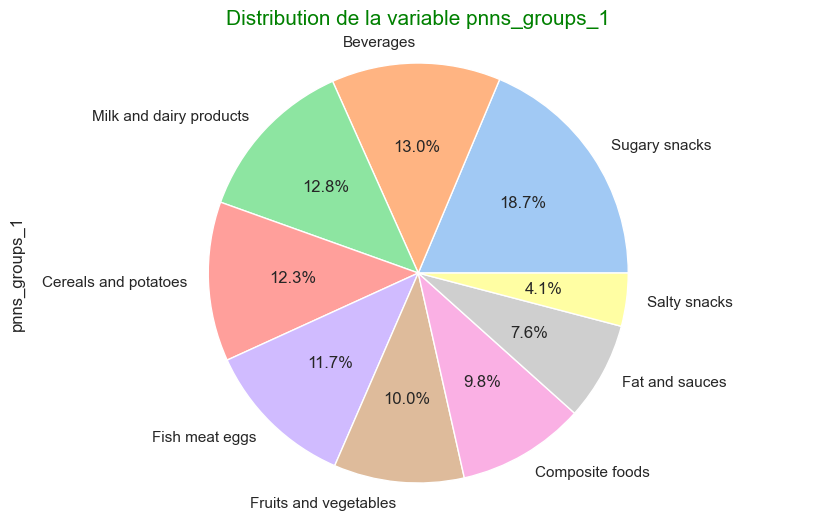

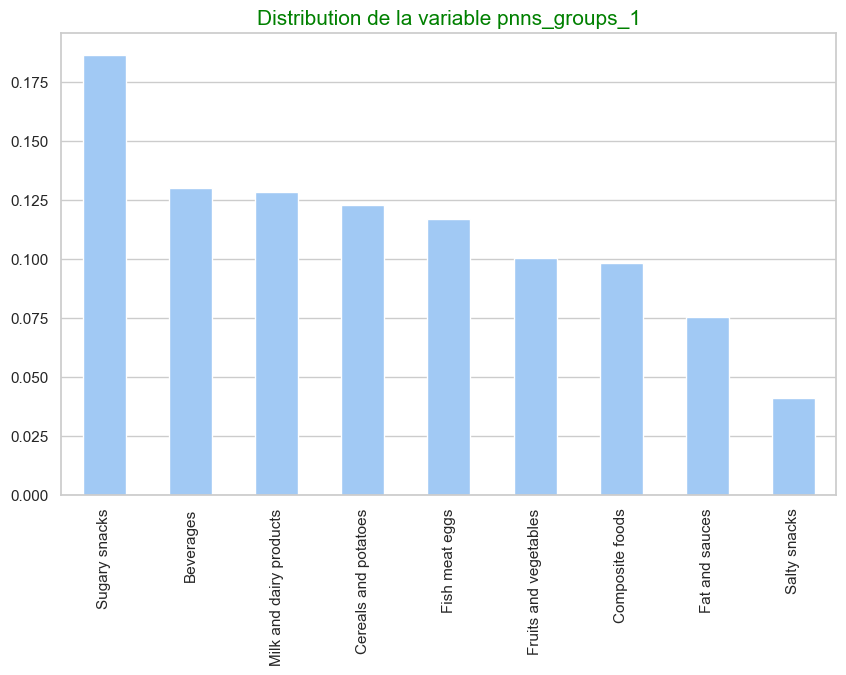

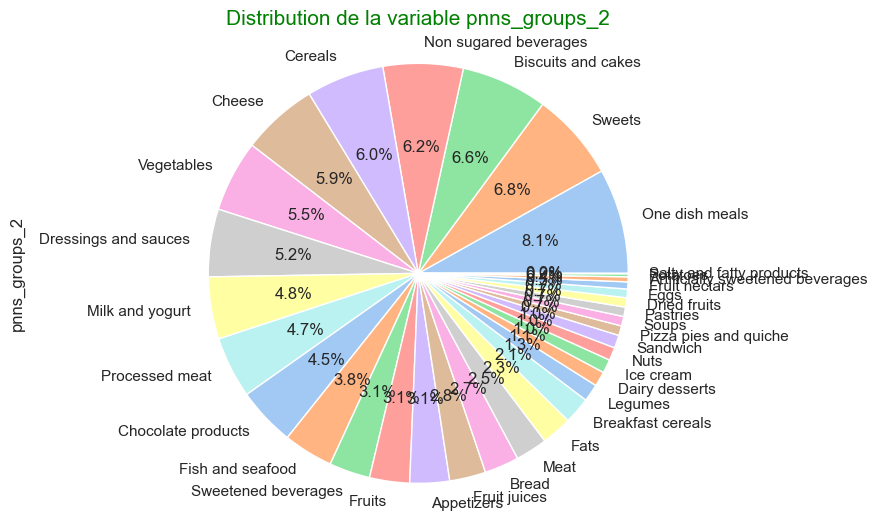

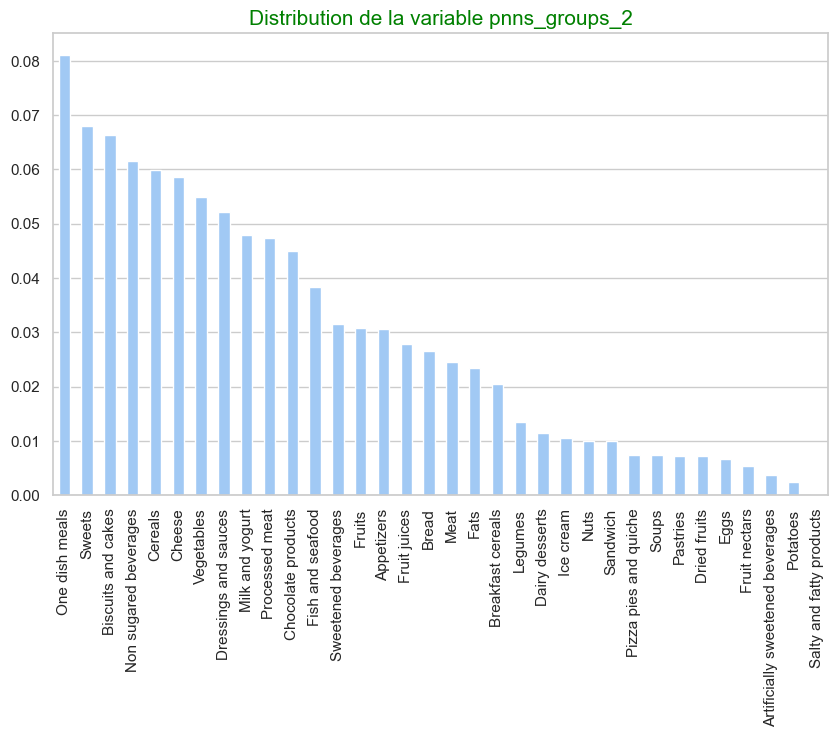

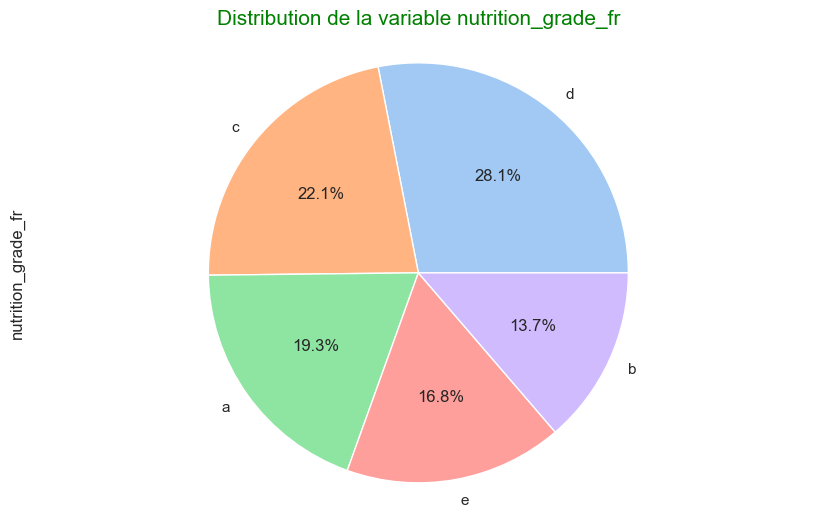

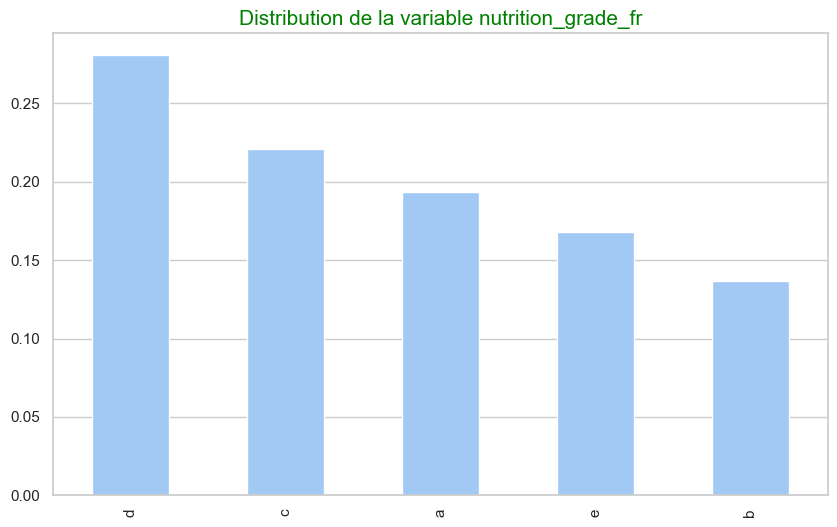

In [12]:
for v in variables_qualitatives:
    distribution_empirique_qualitatives(v)

**Commentaires**

La famille *Salty snacks* et en particulier la sous-famille *Salty and fatty products* est peu représentée (19 observations pour cette dernière). La suggestion d'un meilleur produit risque d'être difficile.

La représentation en camembert est plus indiquée pour les familles et nutrition_grade tandis que la représentation en histogramme l'est davantage pour les sous-familles.

### Analyse des variables quantitatives

J'utilise une fonction à appeler pour l'ensemble des variables quantitatives.

Cette fonction fournit pour chaque variable :
- les mesures de tendance centrale :
    - la moyenne
    - la médiane
    - le mode
- les mesures de dispersion :
    - la variance empirique
    - l'écart-type empirique
- les mesures de forme :
    - le Skewness empirique
    - le Kurtosis empirique
- les représentations graphiques :
    - une distribution sous forme de diagramme de densité
    - une boîte à moustaches montrant les écarts interquartiles
    - une mesure de concentration avec la courbe de Lorenz et l'indice de Gini    


In [13]:
def analyse_variable_quantitative(variable):
    print("-"*80)
    print('Analyse de la variable',variable)
    print("-"*5)
    print("Moyenne :",round(df[variable].mean(),2))
    print("Médiane :",round(df[variable].median(),2))
    print("Mode :",df[variable].mode())
    print("Variance :",round(df[variable].var(ddof=0),2))
    print("Ecart-type :",round(df[variable].std(ddof=0),2))
    print("Skewness :",round(df[variable].skew(),2))
    print("Kurtosis :",round(df[variable].kurtosis(),2))
    # Diagramme à densité
    plt.xlabel('Distribution de la variable '+str(variable), color='green', fontsize=15)
    plt.ylabel('Diagramme à densité', fontsize=13)
    sns.kdeplot(data=df, x=variable)
    plt.show()
    # Boxplot
    plt.xlabel(str(variable), color='green', fontsize=15)
    sns.boxplot(data=df, x=variable, showfliers=False, orient='h', showmeans=True, meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}, medianprops = {'color':"black"})
    plt.show()
    # Courbe de Lorenz
    n = len(df[variable])
    lorenz = np.cumsum(np.sort(df[variable])) / df[variable].sum()
    lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0
    xaxis = np.linspace(0-1/n,1+1/n,len(lorenz)) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
    plt.title('Courbe de Lorenz pour la variable '+str(variable), color='green', fontsize=15)
    plt.plot(xaxis,lorenz,drawstyle='steps-post')
    plt.plot([0,1], [0,1]) #tracer la bisséctrice
    plt.grid(visible=False)
    # Indice de Gini
    AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
    S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
    gini = round(2*S,2)
    plt.text(0.5, 0.4, 'Indice de Gini\n'+str(gini))
    plt.show()

--------------------------------------------------------------------------------
Analyse de la variable energy_100g
-----
Moyenne : 1041.7
Médiane : 899.0
Mode : 0    160.0
Name: energy_100g, dtype: float64
Variance : 622348.94
Ecart-type : 788.89
Skewness : 0.69
Kurtosis : -0.17


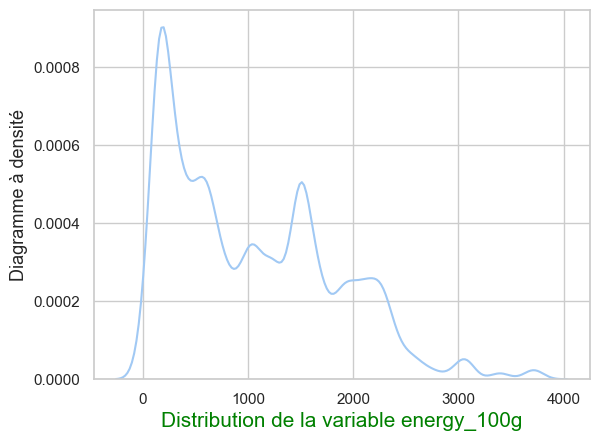

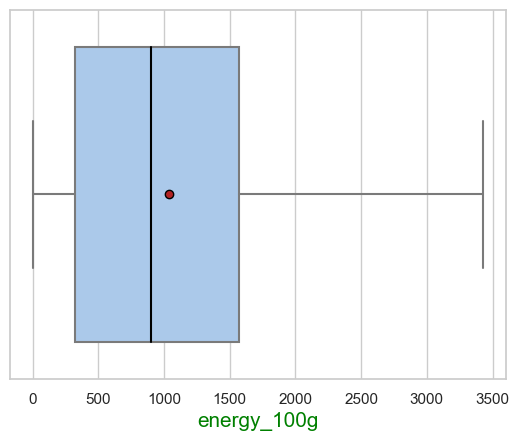

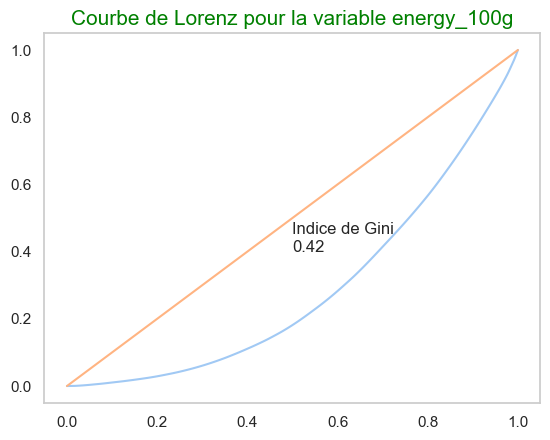

--------------------------------------------------------------------------------
Analyse de la variable saturated-fat_100g
-----
Moyenne : 4.91
Médiane : 1.4
Mode : 0    0.0
Name: saturated-fat_100g, dtype: float64
Variance : 62.34
Ecart-type : 7.9
Skewness : 3.3
Kurtosis : 18.62


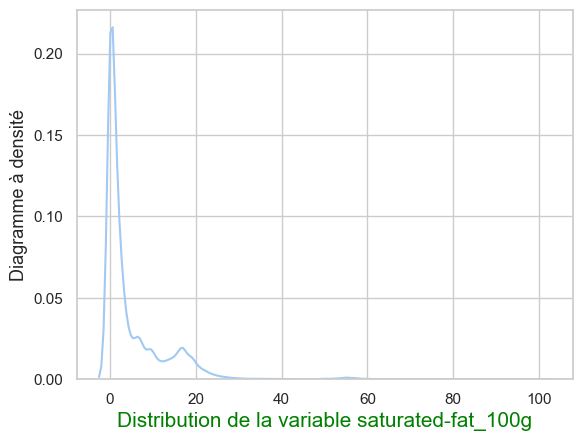

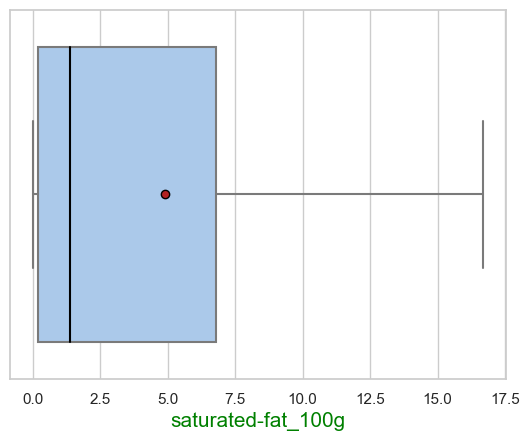

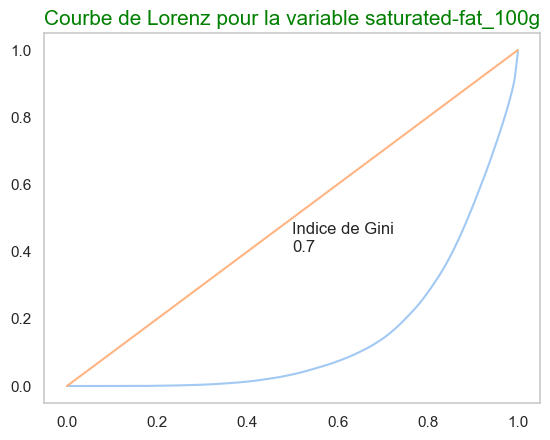

--------------------------------------------------------------------------------
Analyse de la variable sodium_100g
-----
Moyenne : 0.32
Médiane : 0.2
Mode : 0    0.0
Name: sodium_100g, dtype: float64
Variance : 0.47
Ecart-type : 0.68
Skewness : 38.72
Kurtosis : 3565.16


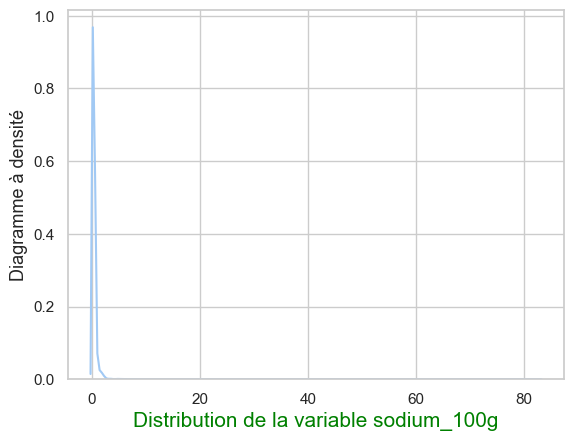

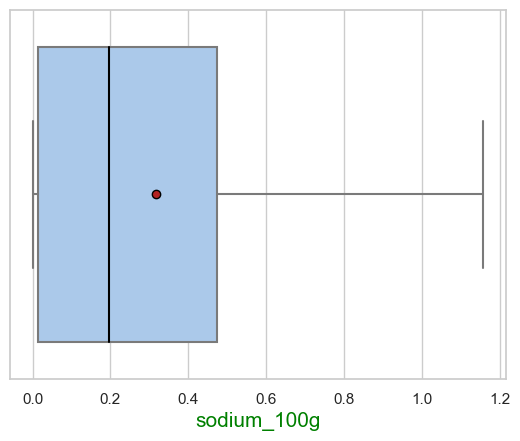

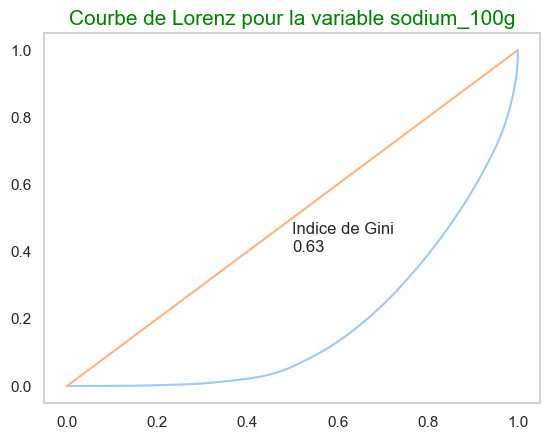

--------------------------------------------------------------------------------
Analyse de la variable sugars_100g
-----
Moyenne : 12.44
Médiane : 4.3
Mode : 0    0.0
Name: sugars_100g, dtype: float64
Variance : 328.37
Ecart-type : 18.12
Skewness : 1.95
Kurtosis : 3.38


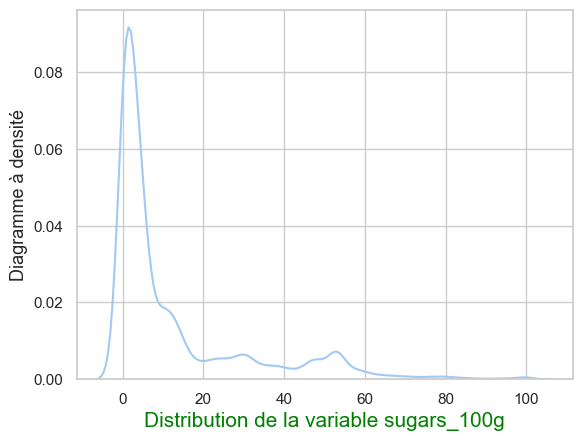

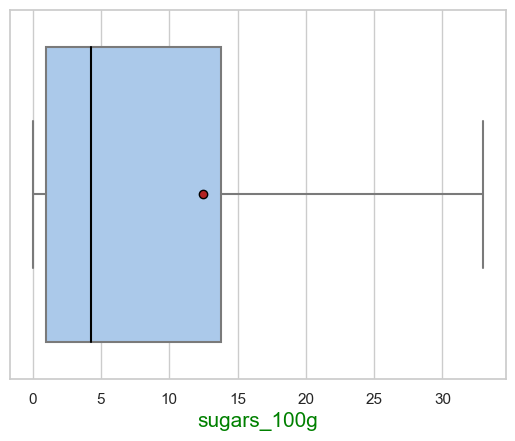

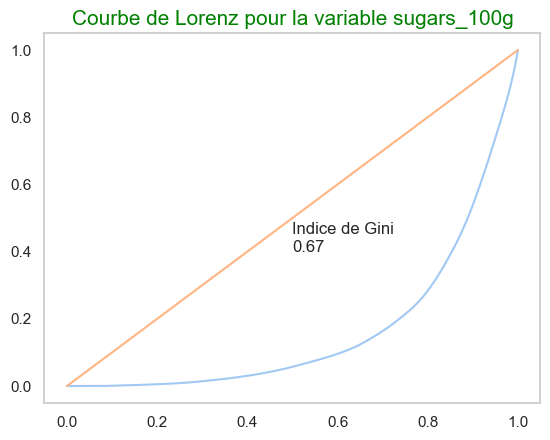

--------------------------------------------------------------------------------
Analyse de la variable proteins_100g
-----
Moyenne : 7.25
Médiane : 5.6
Mode : 0    0.5
Name: proteins_100g, dtype: float64
Variance : 53.08
Ecart-type : 7.29
Skewness : 1.33
Kurtosis : 2.03


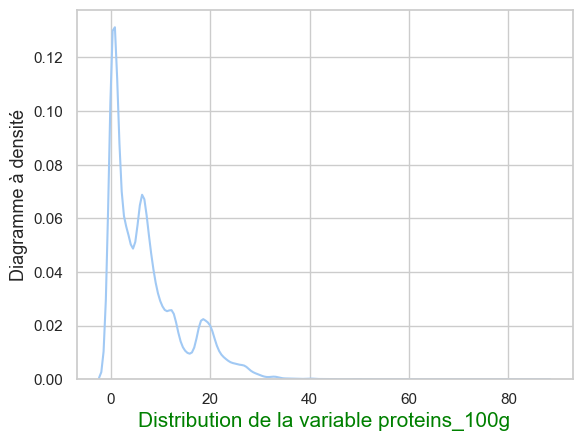

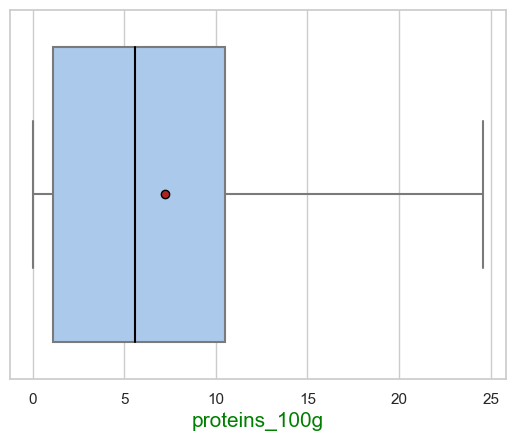

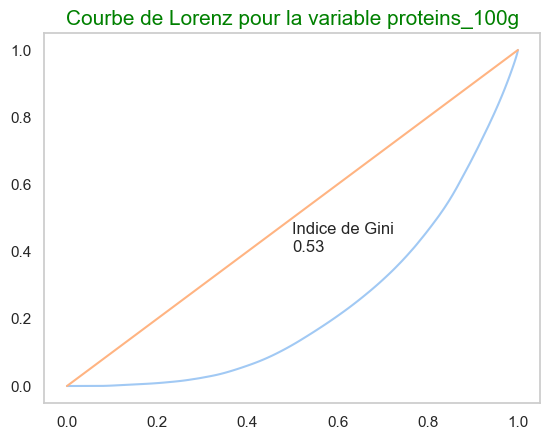

--------------------------------------------------------------------------------
Analyse de la variable fiber_100g
-----
Moyenne : 2.01
Médiane : 1.1
Mode : 0    0.0
Name: fiber_100g, dtype: float64
Variance : 9.29
Ecart-type : 3.05
Skewness : 5.76
Kurtosis : 75.15


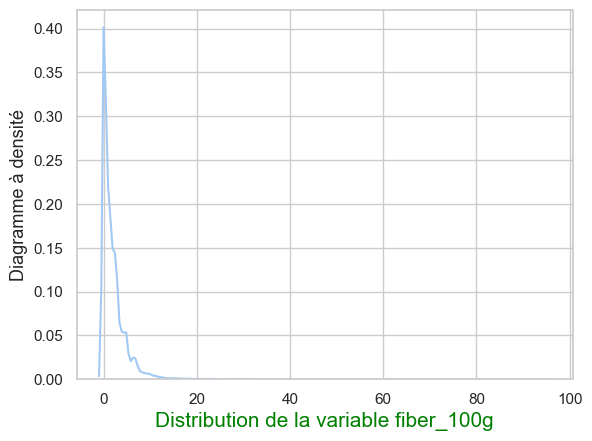

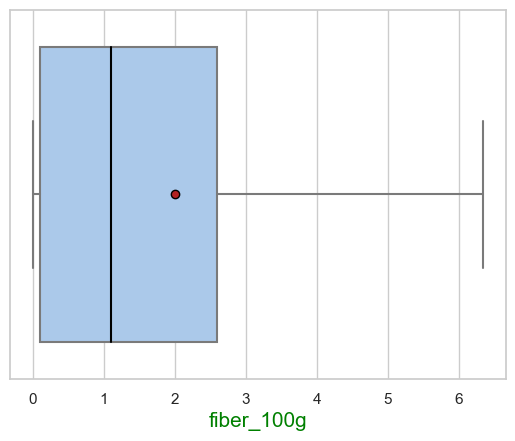

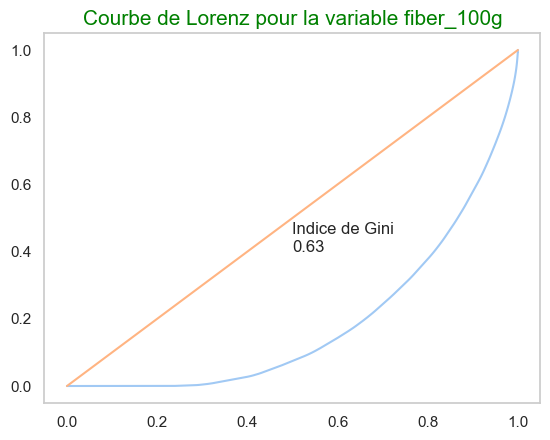

--------------------------------------------------------------------------------
Analyse de la variable fruits-vegetables-nuts_100g
-----
Moyenne : 24.6
Médiane : 12.0
Mode : 0    0.0
Name: fruits-vegetables-nuts_100g, dtype: float64
Variance : 980.68
Ecart-type : 31.32
Skewness : 1.28
Kurtosis : 0.34


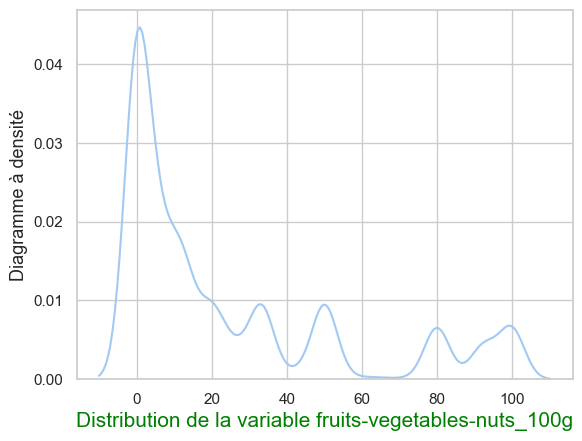

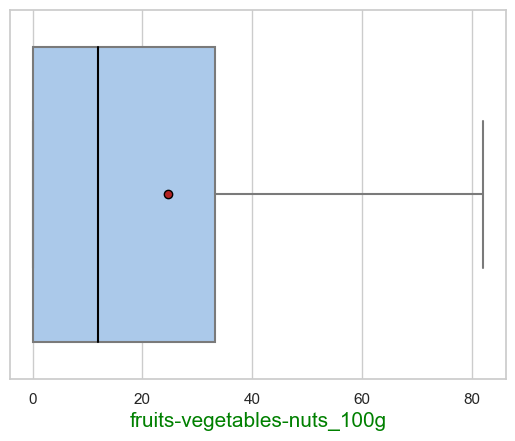

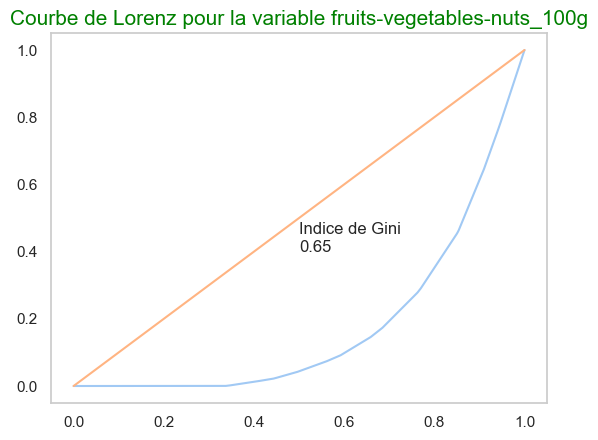

--------------------------------------------------------------------------------
Analyse de la variable fat_100g
-----
Moyenne : 12.41
Médiane : 5.5
Mode : 0    0.1
Name: fat_100g, dtype: float64
Variance : 292.21
Ecart-type : 17.09
Skewness : 2.35
Kurtosis : 6.91


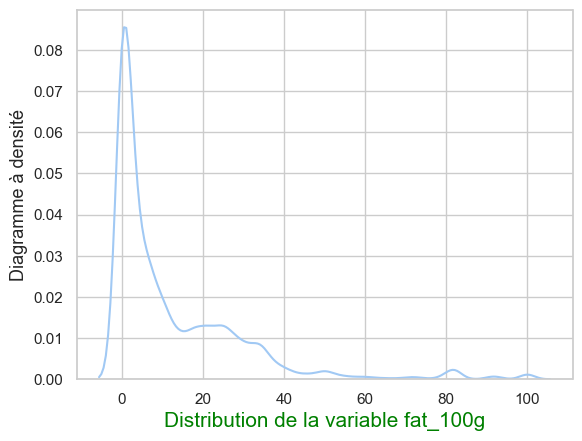

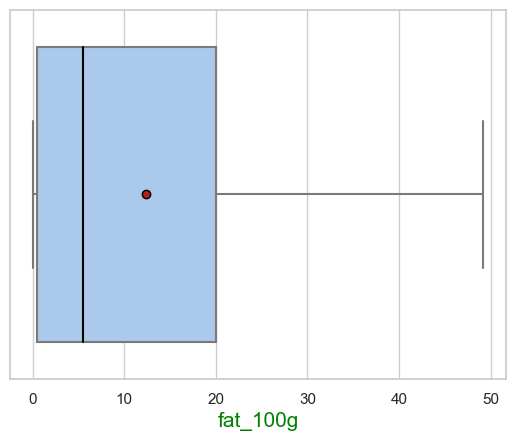

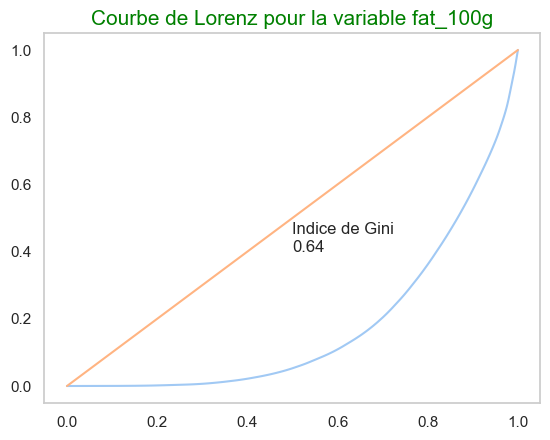

--------------------------------------------------------------------------------
Analyse de la variable nutrition-score-fr_100g
-----
Moyenne : 7.76
Médiane : 6.0
Mode : 0    2.0
Name: nutrition-score-fr_100g, dtype: float64
Variance : 79.66
Ecart-type : 8.93
Skewness : 0.23
Kurtosis : -0.91


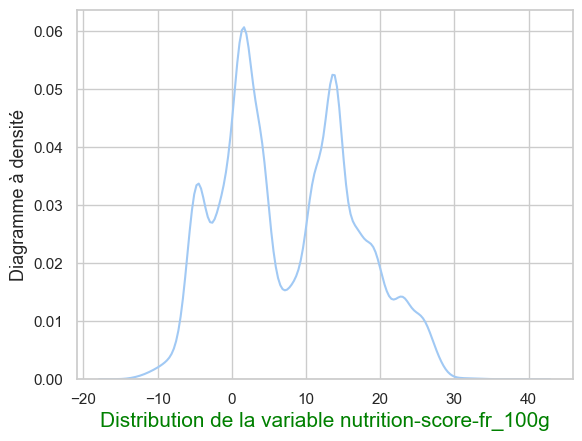

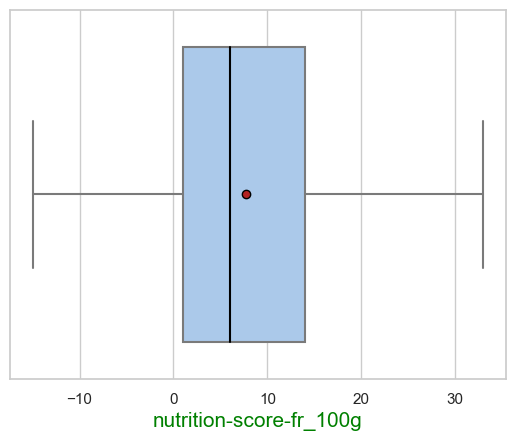

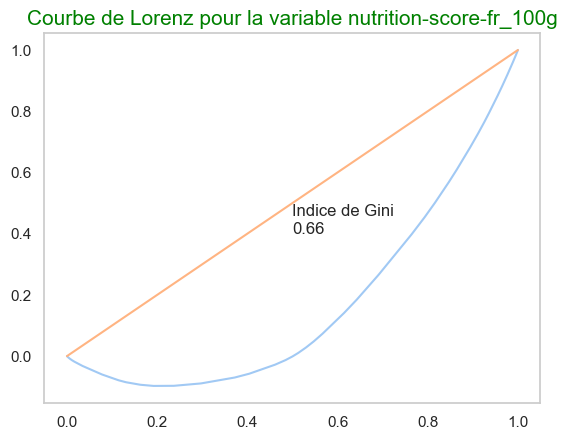

In [14]:
for v in variables_quantitatives:
    analyse_variable_quantitative(v)

**Remarques**

La courbe de Lorenz pour le nutriscore n'est pas exploitable. Cela s'explique par le fait que les modalités peuvent être négatives jusqu'à -15 ou positives jusqu'à 40.

La variable la moins discriminante est l'énergie avec un indice de Gini à 0.42.
Cela signifie qu'il sera plus difficile d'affirmer qu'un produit est bon ou pas à partir de ce critère.
A l'opposé, le niveau de gras saturé est clairement une donnée beaucoup plus concentrée sur certains produits. Il devrait être plus facile de distinguer les familles de produits à recommander ou déconseiller.

## Partie 2 - Analyses bivariées

### Recherche des corrélations linéaires entre paires de variables quantitatives

Je commence par la matrice des corrélations.

In [15]:
# Compute the correlation matrix
corr = df[variables_quantitatives].corr()
corr

energy_100g  saturated-fat_100g  sodium_100g  \
energy_100g                     1.000000            0.612758     0.035410   
saturated-fat_100g              0.612758            1.000000     0.044229   
sodium_100g                     0.035410            0.044229     1.000000   
sugars_100g                     0.356354            0.102332    -0.158641   
proteins_100g                   0.229873            0.200338     0.259233   
fiber_100g                      0.297740            0.027211    -0.027766   
fruits-vegetables-nuts_100g    -0.267443           -0.268449    -0.161878   
fat_100g                        0.789032            0.740878     0.070807   
nutrition-score-fr_100g         0.627758            0.607420     0.160106   

                             sugars_100g  proteins_100g  fiber_100g  \
energy_100g                     0.356354       0.229873    0.297740   
saturated-fat_100g              0.102332       0.200338    0.027211   
sodium_100g                    -0.158641       0.259233   -0.027766   
sugars_100g                     1.000000      -0.266622    0.113902   
proteins_100g                  -0.266622       1.000000    0.120272   
fiber_100g                      0.113902       0.120272    1.000000   
fruits-vegetables-nuts_100g     0.156170      -0.287081    0.098944   
fat_100g                        0.003627       0.184278    0.070086   
nutrition-score-fr_100g         0.475723       0.127576   -0.060193   

                             fruits-vegetables-nuts_100g  fat_100g  \
energy_100g                                    -0.267443  0.789032   
saturated-fat_100g                             -0.268449  0.740878   
sodium_100g                                    -0.161878  0.070807   
sugars_100g                                     0.156170  0.003627   
proteins_100g                                  -0.287081  0.184278   
fiber_100g                                      0.098944  0.070086   
fruits-vegetables-nuts_100g                     1.000000 -0.250941   
fat_100g                                       -0.250941  1.000000   
nutrition-score-fr_100g                        -0.309934  0.555106   

                             nutrition-score-fr_100g  
energy_100g                                 0.627758  
saturated-fat_100g                          0.607420  
sodium_100g                                 0.160106  
sugars_100g                                 0.475723  
proteins_100g                               0.127576  
fiber_100g                                 -0.060193  
fruits-vegetables-nuts_100g                -0.309934  
fat_100g                                    0.555106  
nutrition-score-fr_100g                     1.000000

Sous une forme plus visuelle, à l'aide de diagrammes de dispersion indiquant la classe de nutriscore :

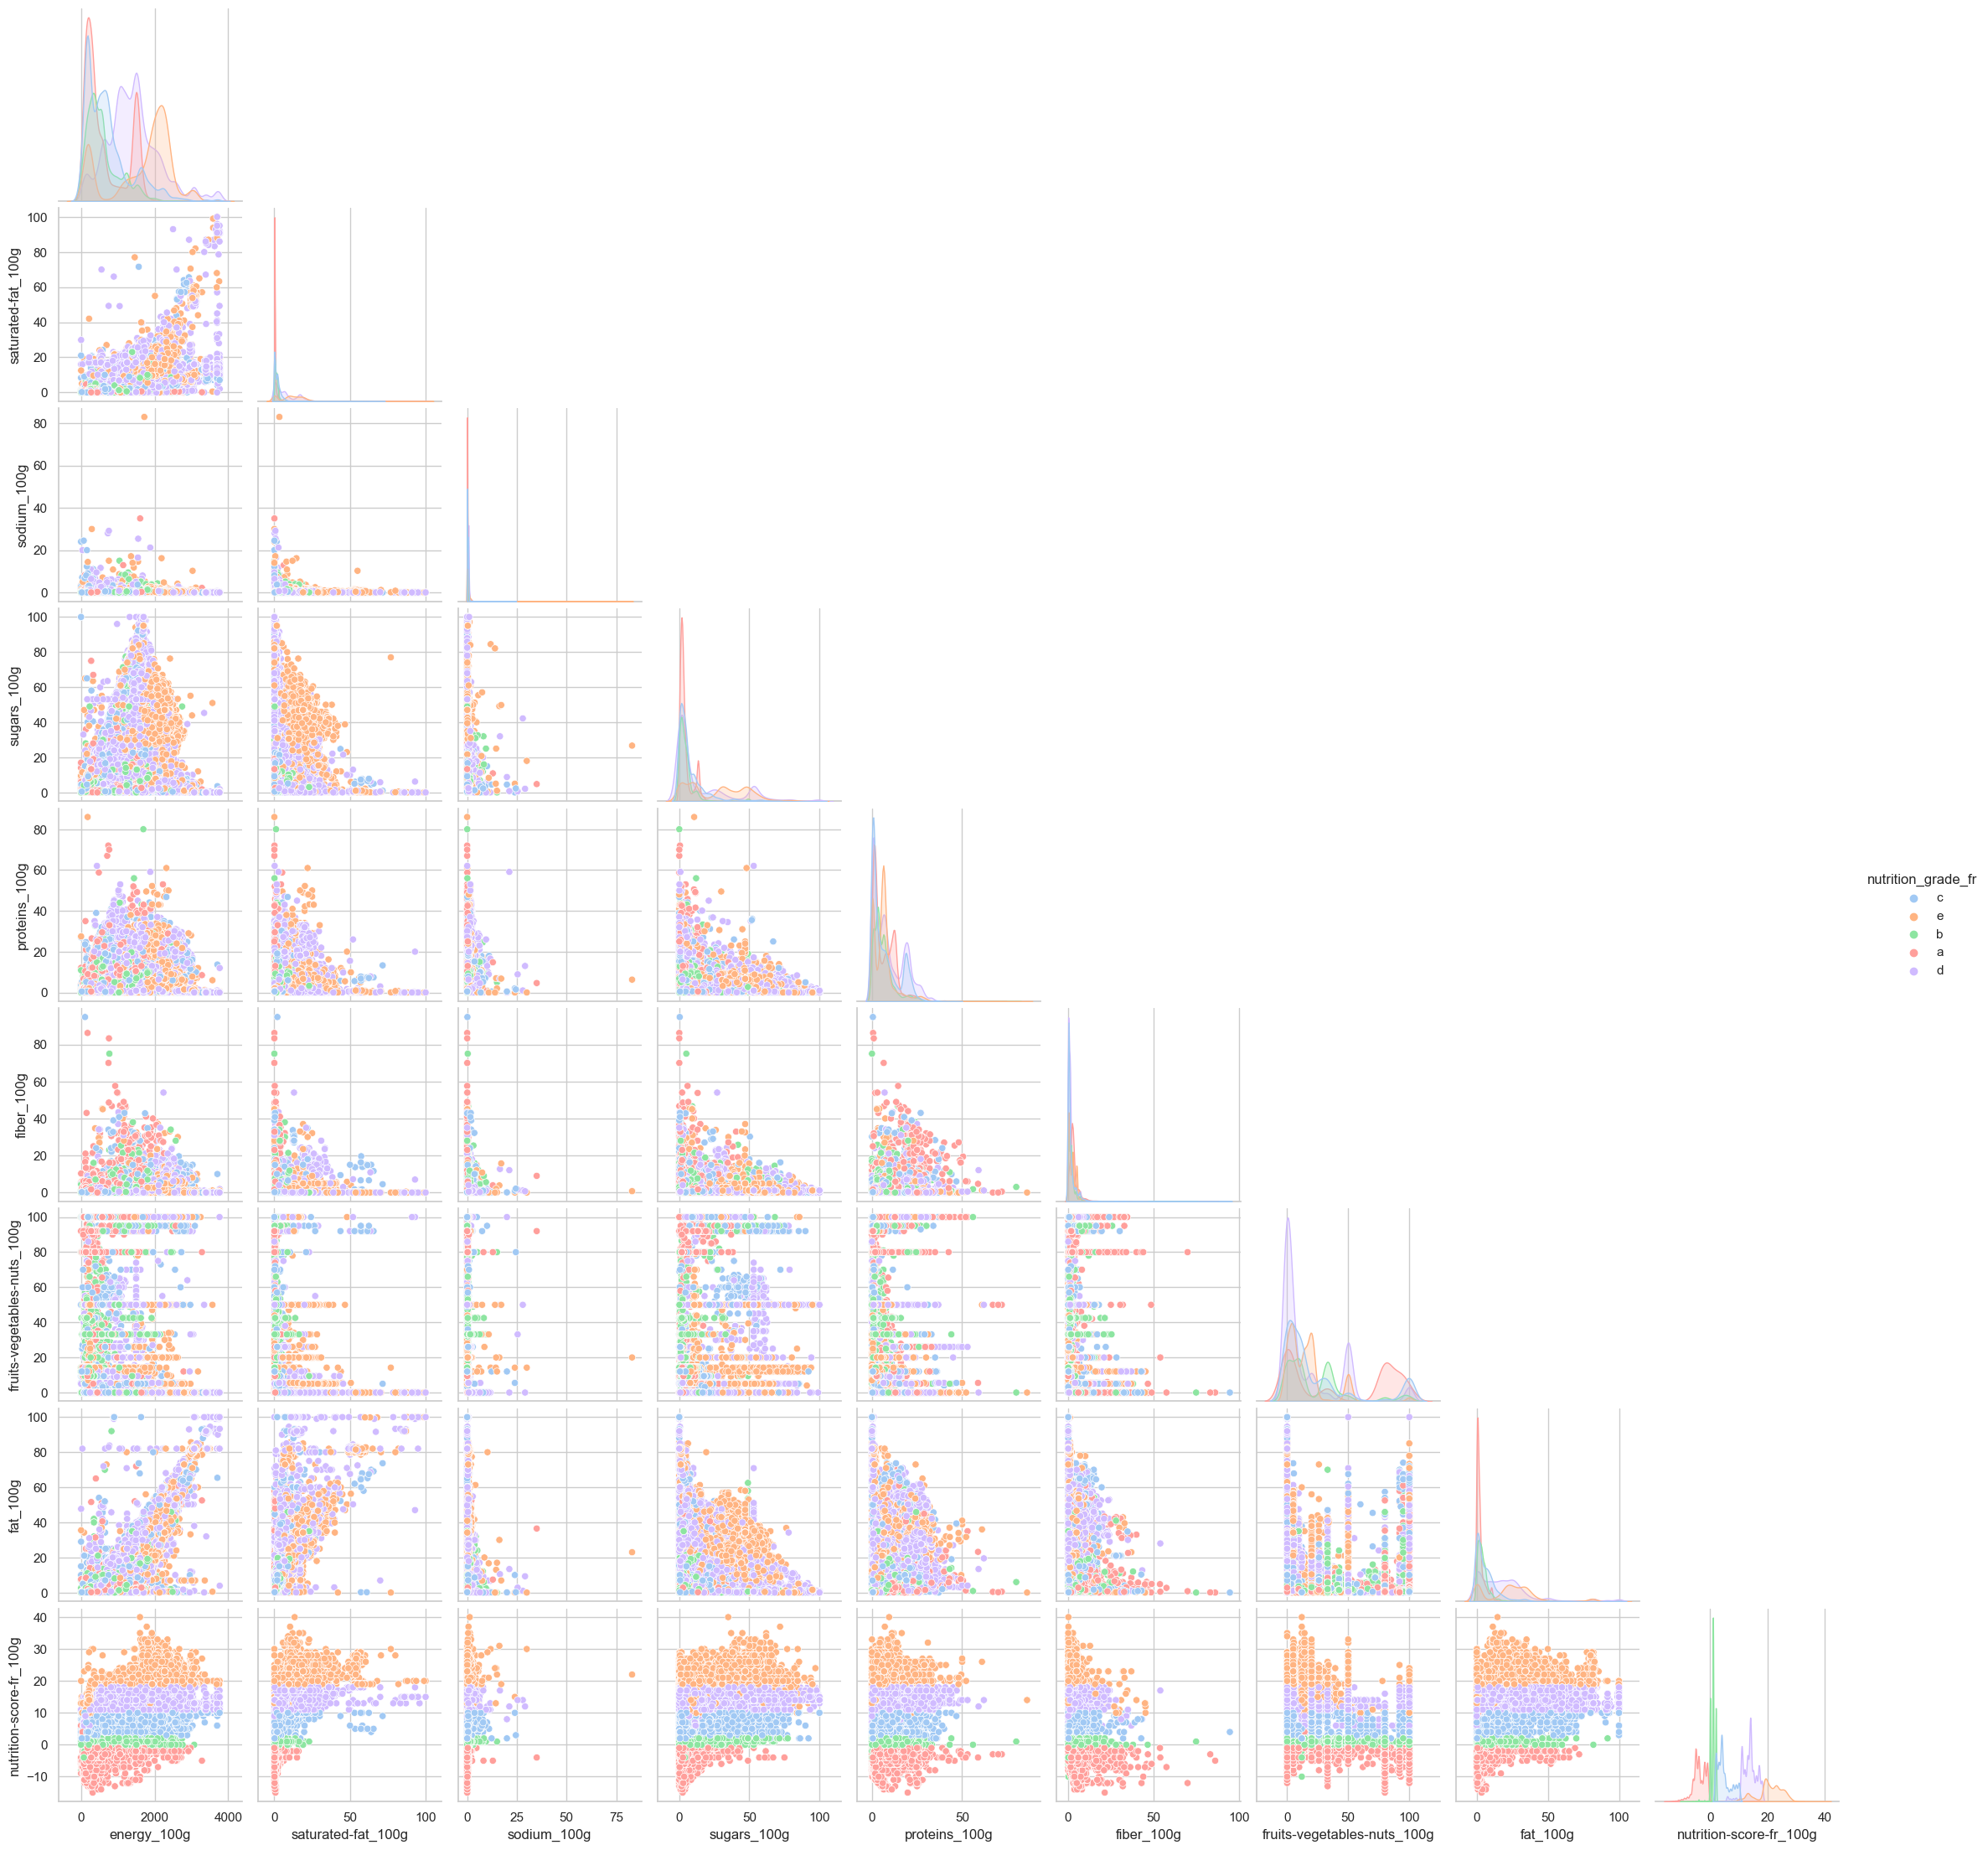

In [16]:
sns.pairplot(df, hue="nutrition_grade_fr", corner=True)

Ce n'est pas très lisible alors je simplifie avec une heatmap indiquant les coefficients de Pearson :

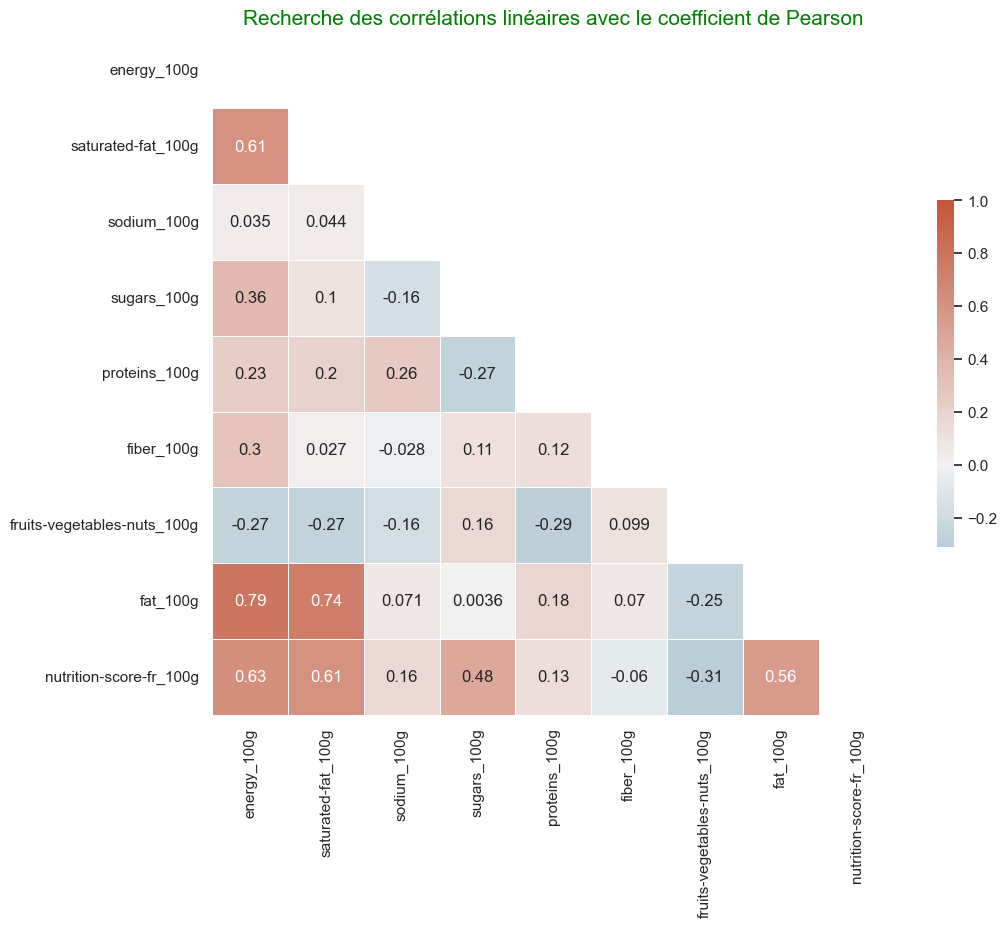

In [17]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
plt.grid(visible=False)
plt.title('Recherche des corrélations linéaires avec le coefficient de Pearson', color='green', fontsize=15)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, annot = True, linewidths=.5, cbar_kws={"shrink": .5});

Les **6 corrélations linéaires potentielles** seraient entre les variables :
- nutrition-score-fr_100g et energy_100g, saturated-fat_100g et dans une moindre mesure fat_100g
- fat_100g et energy_100g, saturated-fat_100g
- saturated-fat_100g et energy_100g

Le plus important à relever, dans le cadre de mon idée d'application, c'est que mon score utilise les **variables *négatives*** :
- energy_100g
- saturated-fat_100g
- sodium_100g
- sugars_100g

Or, seules les 2 premières ont une très légère corrélation linéaire entre elles, avec un coefficient de Pearson de 0,61.

**Il n'y a donc pas de redondance forte parmi les termes du calcul du score.**

J'analyse de plus près les 6 corrélations par régression linéaire.
Pour cela, j'utilise une fonction afin de fournir pour chaque paire de variables :
- un diagramme de dispersion
- la droite de régression linéaire
- le coefficient de détermination R²

In [18]:
def regression_lineaire(variable1, variable2):
    # diagramme de dispersion
    plt.figure(figsize=(10,6))
    sns.scatterplot(data=df, x=variable1, y=variable2, hue='pnns_groups_1')
    plt.ylabel(str(variable2))
    plt.xlabel(str(variable1))
    plt.grid()
    plt.legend(bbox_to_anchor=(1, 1.02))
    plt.title("Analyse de la régression linéaire entre\n"+str(variable2)+' et '+str(variable1), color='green', fontsize=15)
    # régression linéaire
    Y = df[[variable2]]
    X = df[[variable1]]
    X = X.copy() # On modifiera X, on en crée donc une copie
    X['intercept'] = 1.
    result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
    a,b = result.params[variable1],result.params['intercept']
    plt.plot([df[variable1].min(),df[variable1].max()],[a*df[variable1].min()+b,a*df[variable1].max()+b], color='grey')
    # Calcul du coefficient de détermination
    r2 = round((st.pearsonr(df[variable1],df[variable2])[0])**2, 2)
    plt.text(df[variable1].max()*1.1, df[variable2].min()+(df[variable2].max()-df[variable2].min())/10, 'Coefficient de\ndétermination\n\nR² = '+str(r2), color='red')
    plt.show()

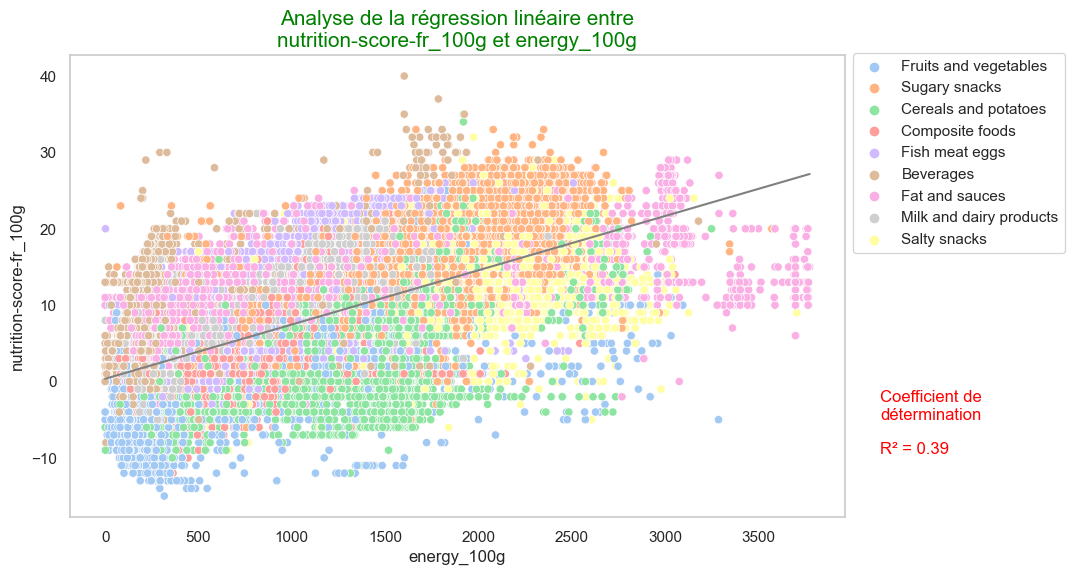

In [19]:
regression_lineaire('energy_100g','nutrition-score-fr_100g')

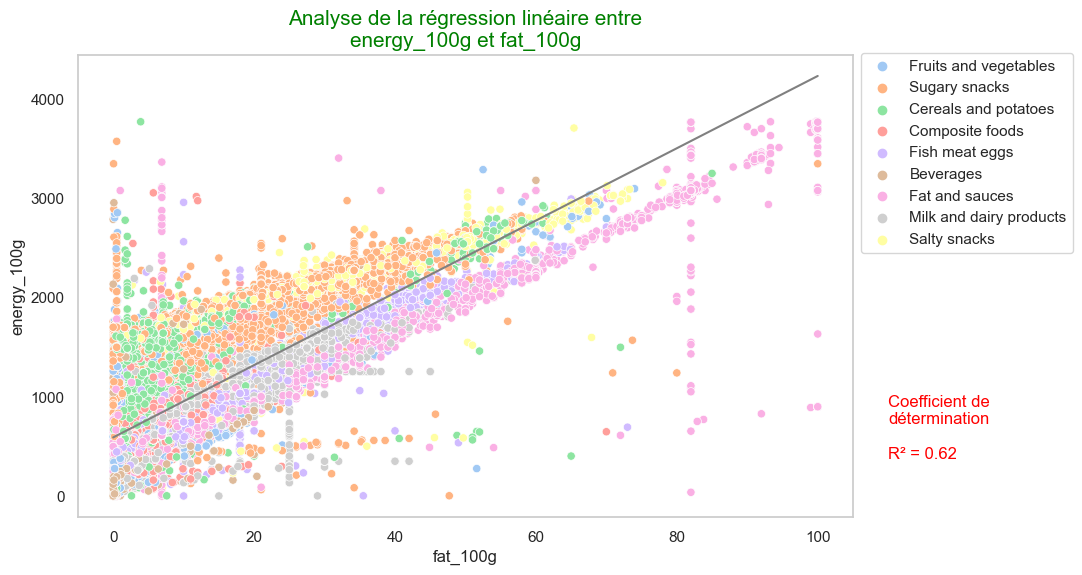

In [20]:
regression_lineaire('fat_100g','energy_100g')

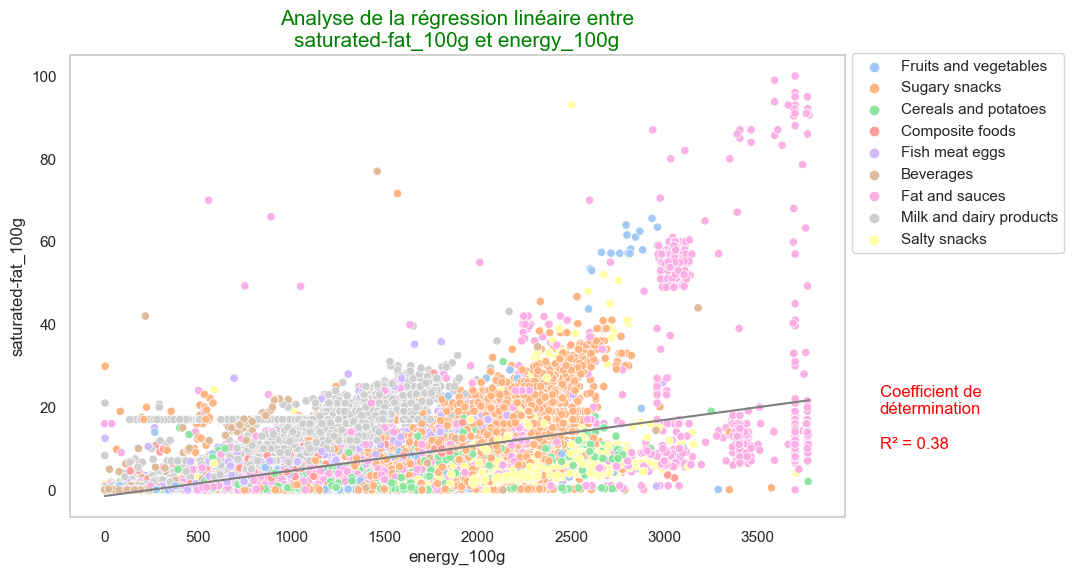

In [21]:
regression_lineaire('energy_100g','saturated-fat_100g')

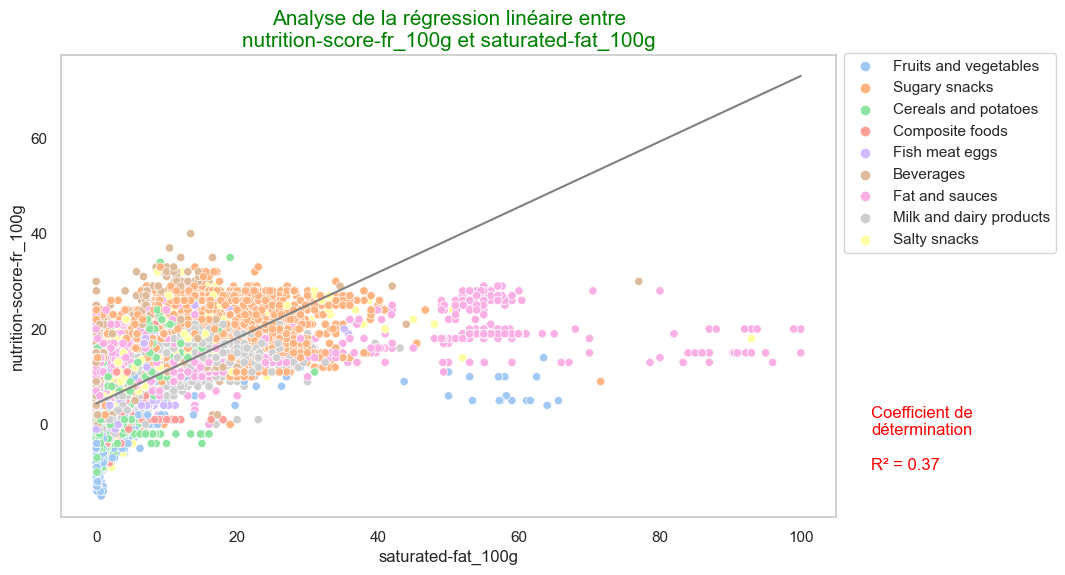

In [22]:
regression_lineaire('saturated-fat_100g','nutrition-score-fr_100g')

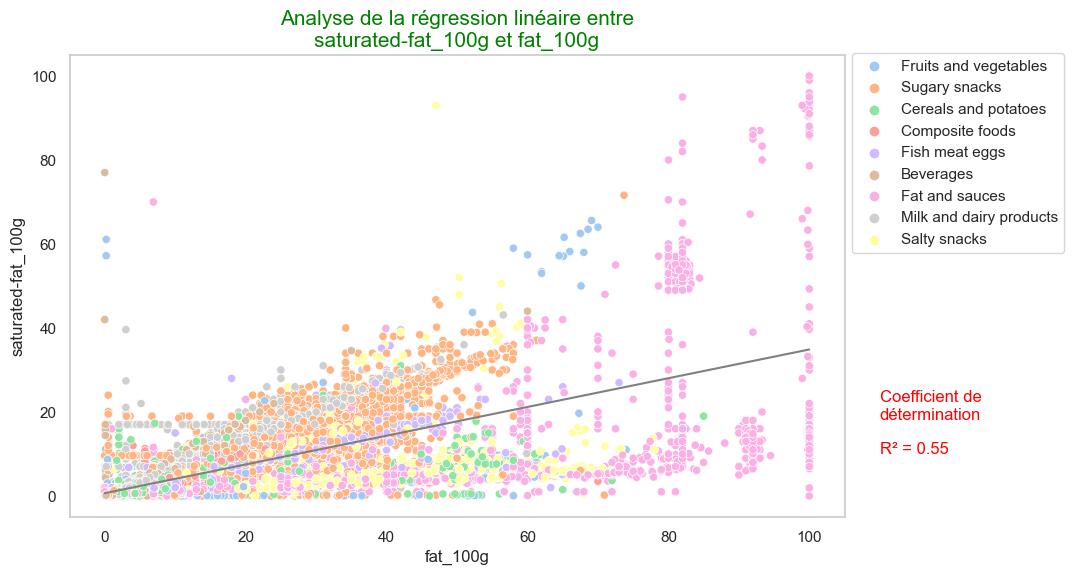

In [23]:
regression_lineaire('fat_100g','saturated-fat_100g')

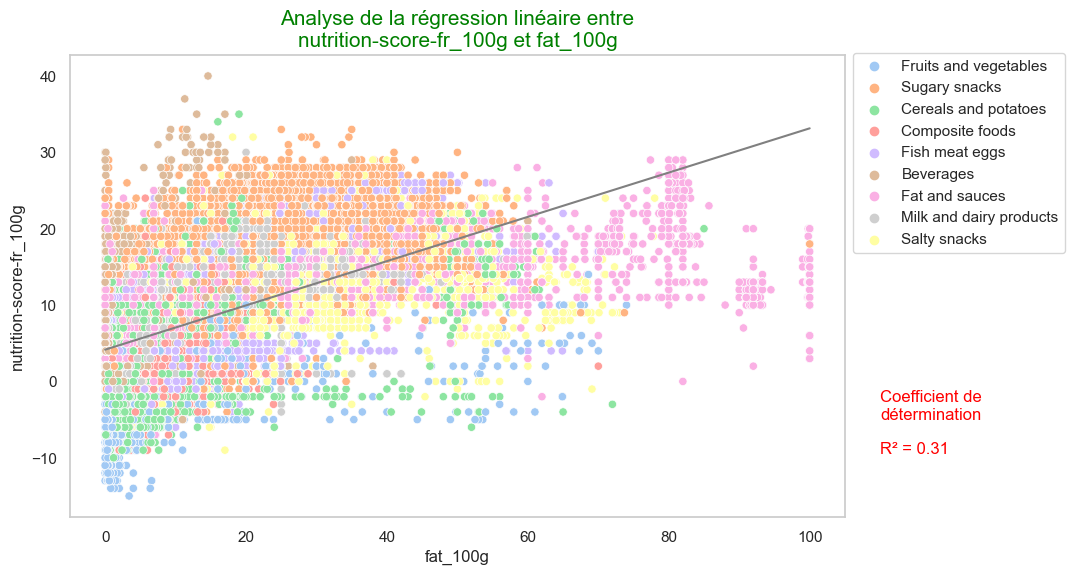

In [24]:
regression_lineaire('fat_100g','nutrition-score-fr_100g')

Finalement, la meilleure corrélation linéaire est obtenue entre *fat_100g* et *energy_100g*.

Une autre, de moins bonne qualité encore, peut être admise entre *fat_100g* et *saturated-fat_100g*.

Pour terminer, la relation entre *saturated-fat_100g* et *energy_100g* n'est pas validée, avec un coefficient de détermination de seulement 0,38.

De ce fait, les quatre **variables** constitutives de mon **score** pour l'application peuvent être considérées comme **indépendantes**.

### Analyses bivariées de variables qualitative et quantitative par ANOVA

Voici quelques questions qui pourraient être intéressantes :
- Est-ce que certaines familles sont liées à une ou plusieurs caractéristiques nutritionnelles ou au nutriscore ?
- Est-ce que certaines sous-familles sont liées à une ou plusieurs caractéristiques nutritionnelles ou au nutriscore ?
- Est-ce que le grade du nutriscore est liée à une ou plusieurs caractéristiques nutritionnelles ?
- Le grade du nutriscore est-il bien lié au nutriscore lui-même, comme le laisse supposer sa construction ?

Là encore, je vais faire appel à une fonction afin de présenter pour chaque paire de variables quantitative/qualitative concernée :
- une représentation graphique sous forme de boîte à moustaches
- le calcul du rapport de corrélation **η²**

In [25]:
def ANOVA(qualitative, quantitative):
    # Boîte à moustaches
    ordre = df.groupby(qualitative)[quantitative].median().sort_values().index
    plt.figure(figsize=(10,10))
    sns.boxplot(x=quantitative, 
                y=qualitative, 
                showfliers=False,
                orient='h', 
                order=ordre, 
                data=df, showmeans=True, meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}, medianprops = {'color':"black"});
    plt.show()
    # Rapport de corrélation η²
    mod = ols('df[quantitative] ~ df[qualitative]',
                data=df).fit()            
    aov_table = sm.stats.anova_lm(mod, typ=2)
    print(aov_table)
    esq_sm = round(aov_table['sum_sq'][0]/(aov_table['sum_sq'][0]+aov_table['sum_sq'][1]),3)
    print('\nRapport de corrélation η² =', esq_sm,'\n')

------------------------------------------------------------------------------------------------------------------------
Analyse ANOVA entre la variable qualitative pnns_groups_1 et la variable quantitative energy_100g


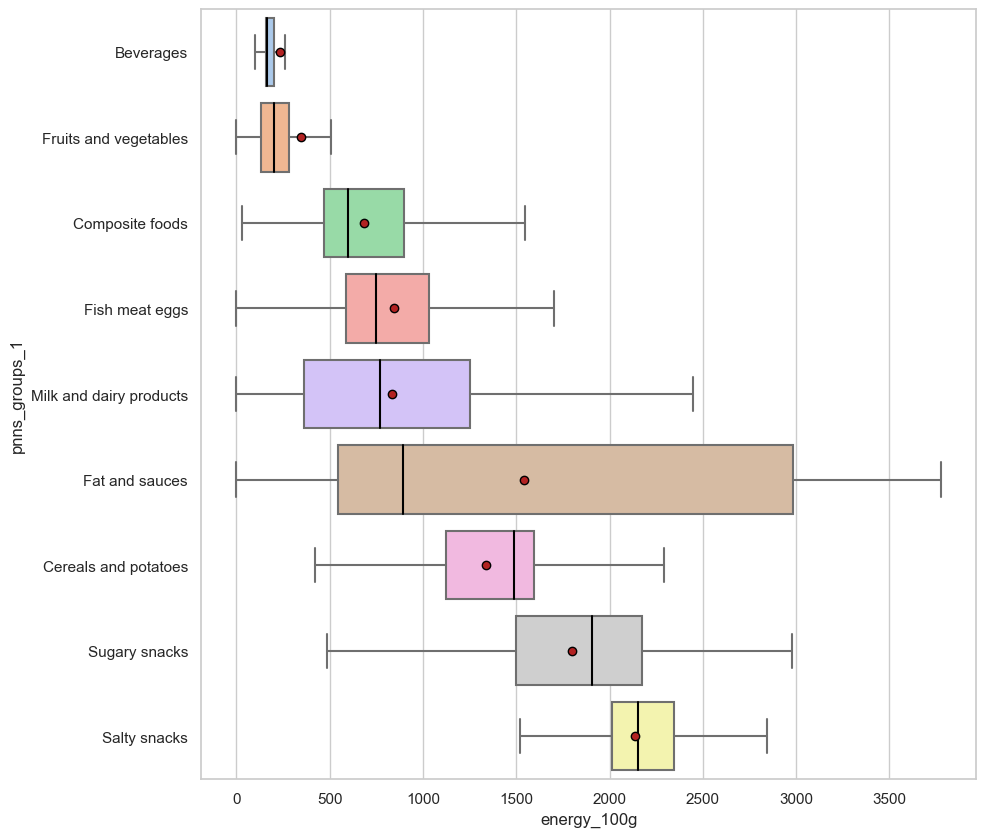

                       sum_sq       df             F  PR(>F)
df[qualitative]  2.333706e+10      8.0  10390.078639     0.0
Residual         1.917684e+10  68303.0           NaN     NaN

Rapport de corrélation η² = 0.549 

------------------------------------------------------------------------------------------------------------------------
Analyse ANOVA entre la variable qualitative pnns_groups_1 et la variable quantitative saturated-fat_100g


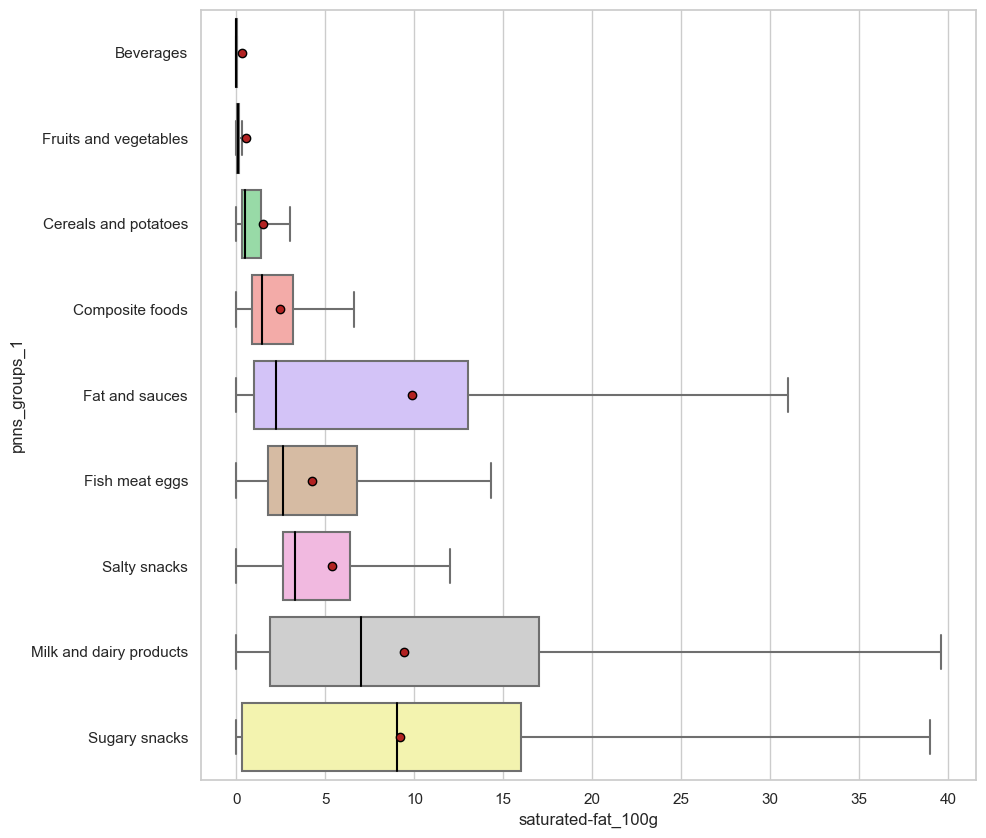

                       sum_sq       df            F  PR(>F)
df[qualitative]  1.002498e+06      8.0  2628.669518     0.0
Residual         3.256098e+06  68303.0          NaN     NaN

Rapport de corrélation η² = 0.235 

------------------------------------------------------------------------------------------------------------------------
Analyse ANOVA entre la variable qualitative pnns_groups_1 et la variable quantitative sodium_100g


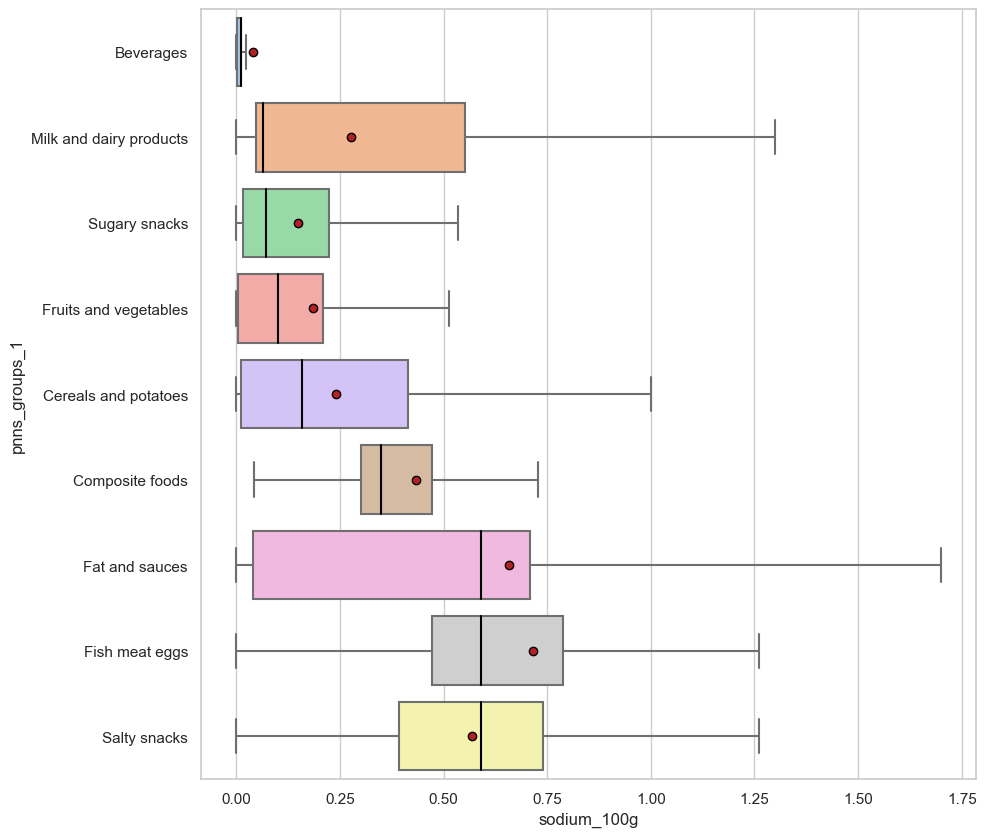

                       sum_sq       df            F  PR(>F)
df[qualitative]   3363.701335      8.0  1008.998468     0.0
Residual         28462.740489  68303.0          NaN     NaN

Rapport de corrélation η² = 0.106 

------------------------------------------------------------------------------------------------------------------------
Analyse ANOVA entre la variable qualitative pnns_groups_1 et la variable quantitative sugars_100g


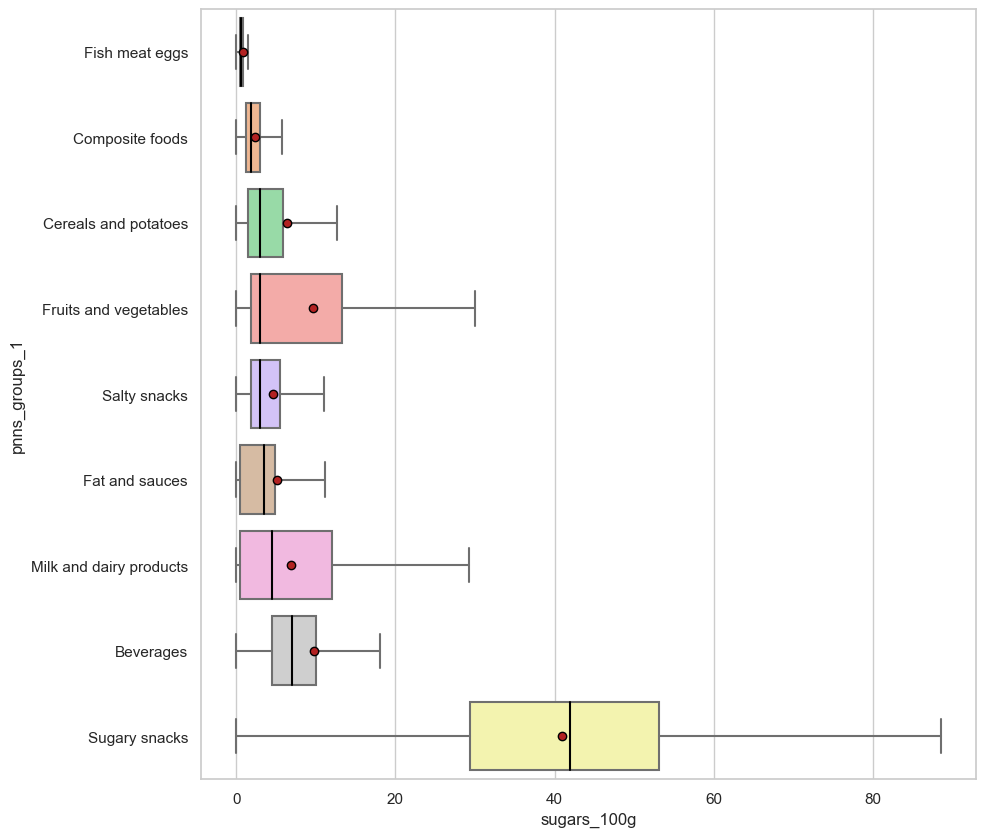

                       sum_sq       df             F  PR(>F)
df[qualitative]  1.330776e+07      8.0  12453.363094     0.0
Residual         9.123639e+06  68303.0           NaN     NaN

Rapport de corrélation η² = 0.593 

------------------------------------------------------------------------------------------------------------------------
Analyse ANOVA entre la variable qualitative pnns_groups_1 et la variable quantitative proteins_100g


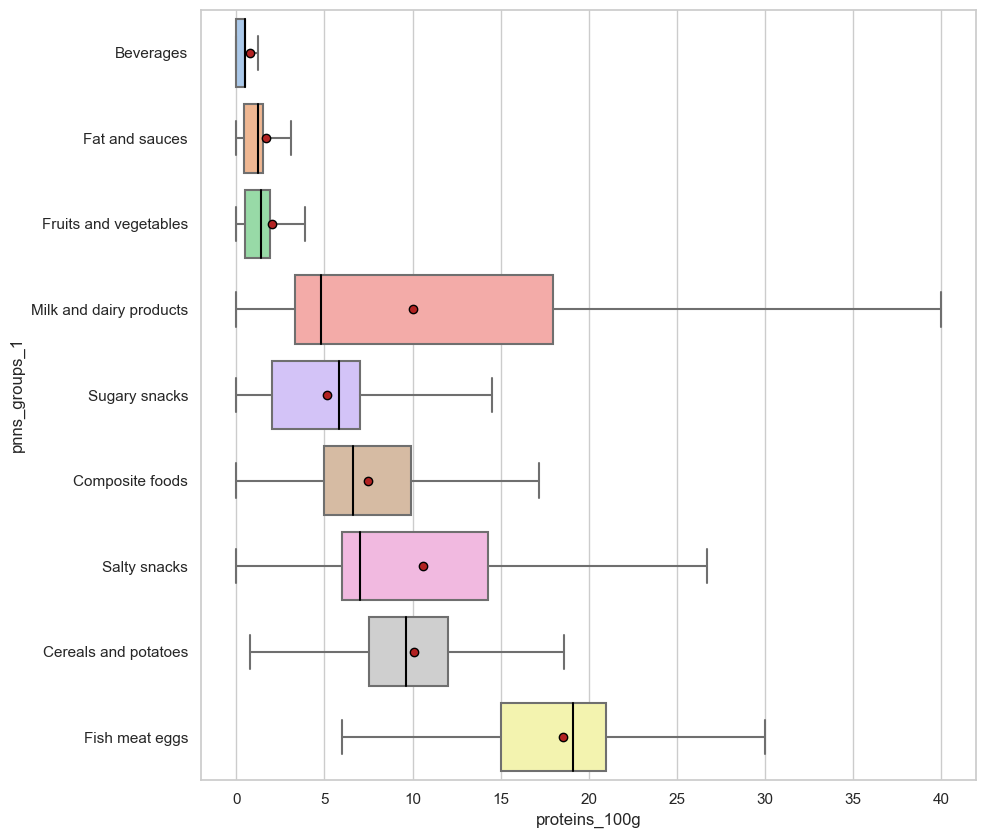

                       sum_sq       df             F  PR(>F)
df[qualitative]  1.967108e+06      8.0  10124.552168     0.0
Residual         1.658831e+06  68303.0           NaN     NaN

Rapport de corrélation η² = 0.543 

------------------------------------------------------------------------------------------------------------------------
Analyse ANOVA entre la variable qualitative pnns_groups_1 et la variable quantitative fiber_100g


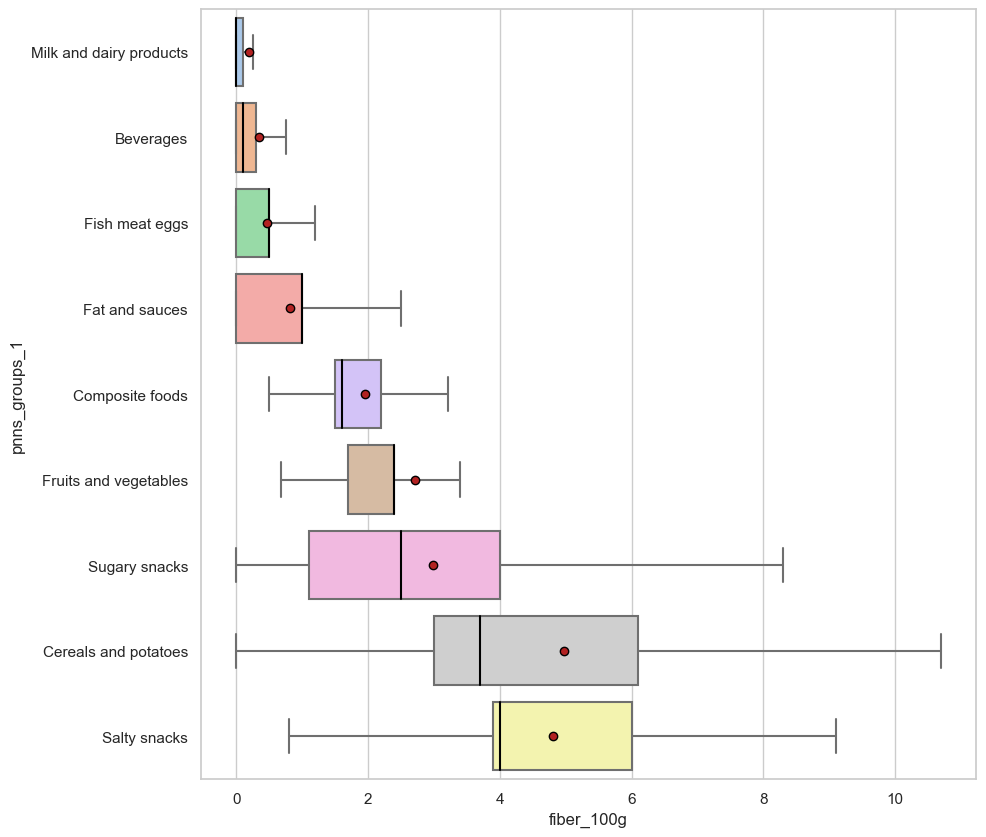

                        sum_sq       df            F  PR(>F)
df[qualitative]  191154.583465      8.0  3678.610936     0.0
Residual         443660.383676  68303.0          NaN     NaN

Rapport de corrélation η² = 0.301 

------------------------------------------------------------------------------------------------------------------------
Analyse ANOVA entre la variable qualitative pnns_groups_1 et la variable quantitative fruits-vegetables-nuts_100g


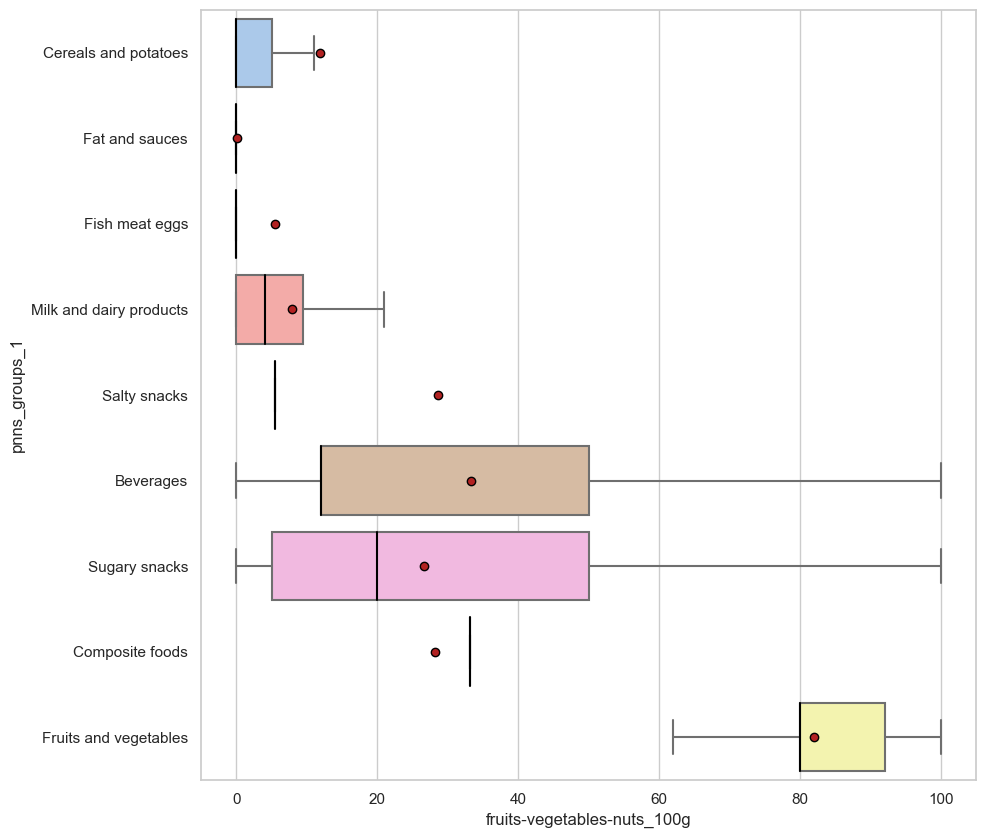

                       sum_sq       df            F  PR(>F)
df[qualitative]  3.326160e+07      8.0  8419.199768     0.0
Residual         3.373045e+07  68303.0          NaN     NaN

Rapport de corrélation η² = 0.497 

------------------------------------------------------------------------------------------------------------------------
Analyse ANOVA entre la variable qualitative pnns_groups_1 et la variable quantitative fat_100g


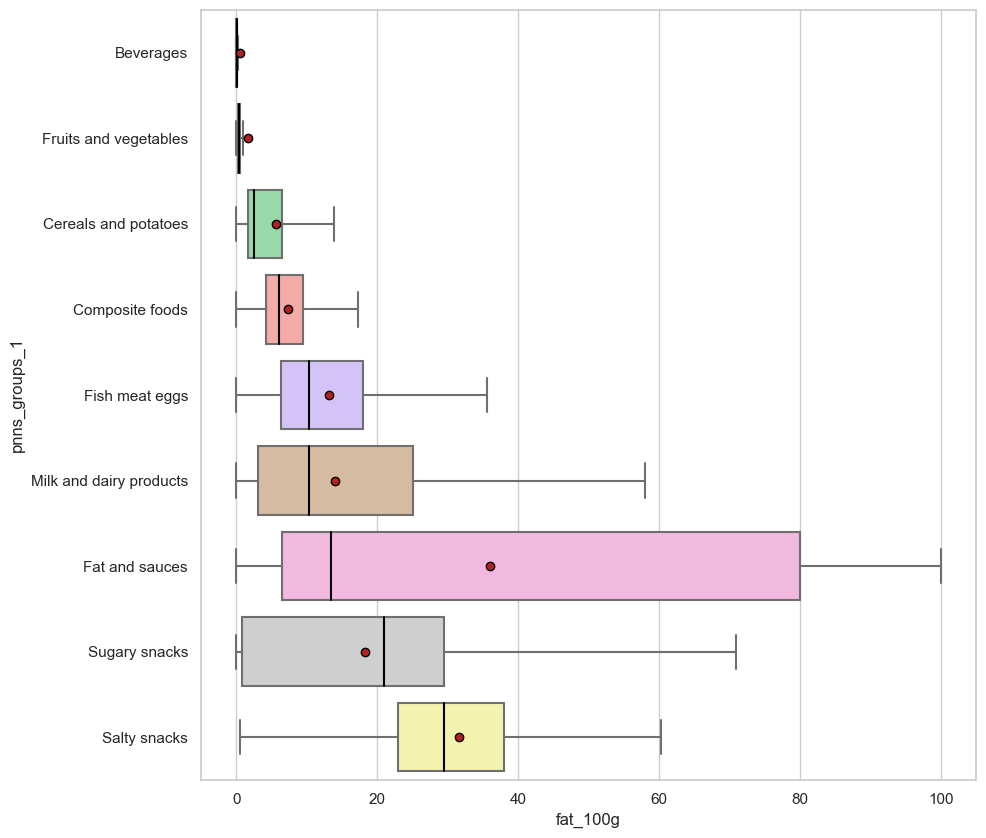

                       sum_sq       df           F  PR(>F)
df[qualitative]  6.963203e+06      8.0  4573.81721     0.0
Residual         1.299810e+07  68303.0         NaN     NaN

Rapport de corrélation η² = 0.349 

------------------------------------------------------------------------------------------------------------------------
Analyse ANOVA entre la variable qualitative pnns_groups_1 et la variable quantitative nutrition-score-fr_100g


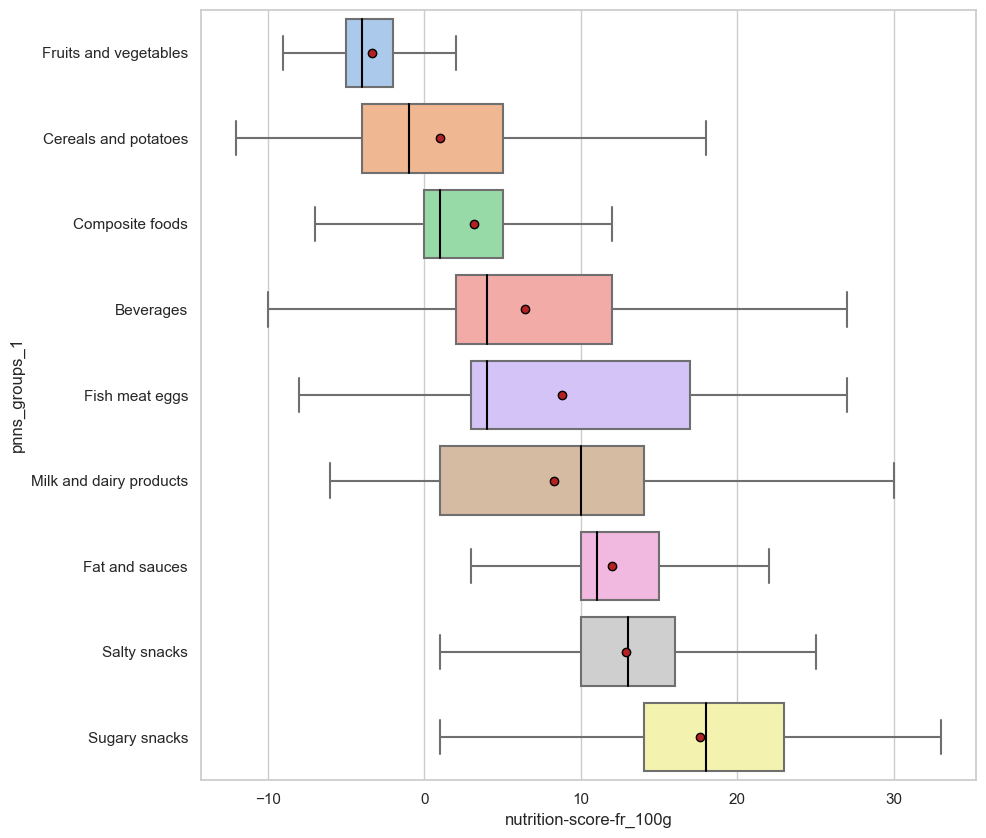

                       sum_sq       df            F  PR(>F)
df[qualitative]  2.805413e+06      8.0  9085.065493     0.0
Residual         2.636444e+06  68303.0          NaN     NaN

Rapport de corrélation η² = 0.516 

------------------------------------------------------------------------------------------------------------------------
Analyse ANOVA entre la variable qualitative pnns_groups_2 et la variable quantitative energy_100g


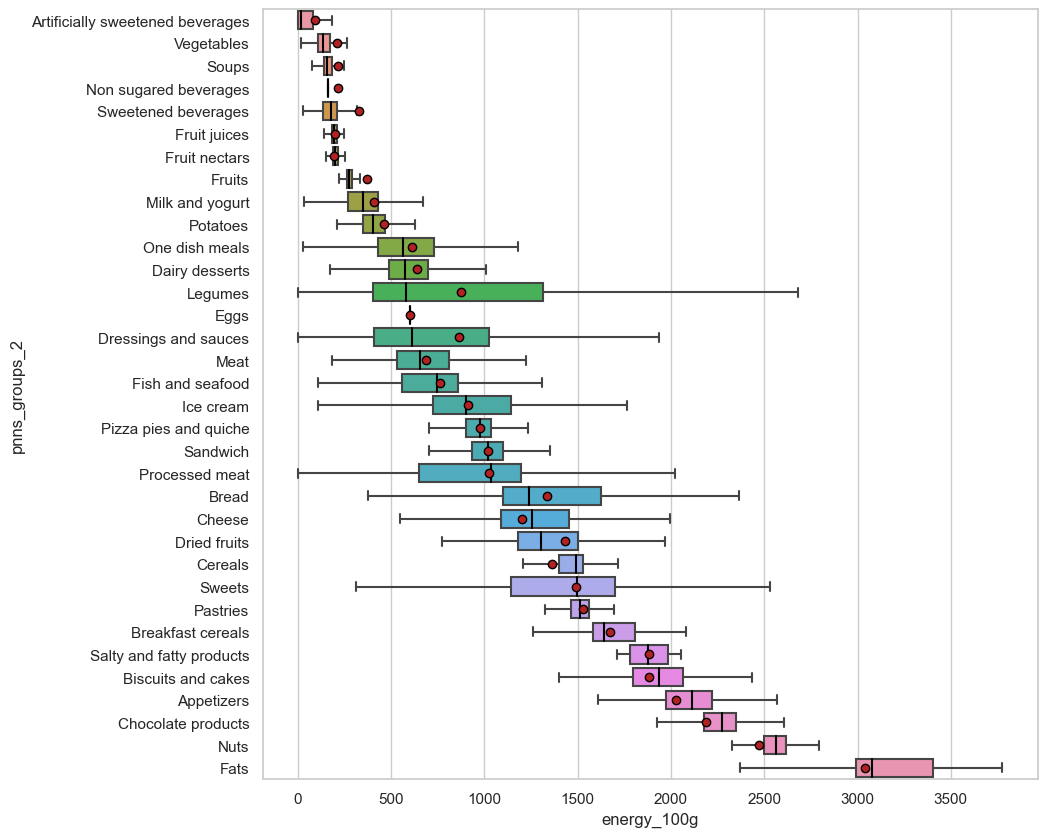

                       sum_sq       df            F  PR(>F)
df[qualitative]  3.233555e+10     33.0  6573.090026     0.0
Residual         1.017835e+10  68278.0          NaN     NaN

Rapport de corrélation η² = 0.761 

------------------------------------------------------------------------------------------------------------------------
Analyse ANOVA entre la variable qualitative pnns_groups_2 et la variable quantitative saturated-fat_100g


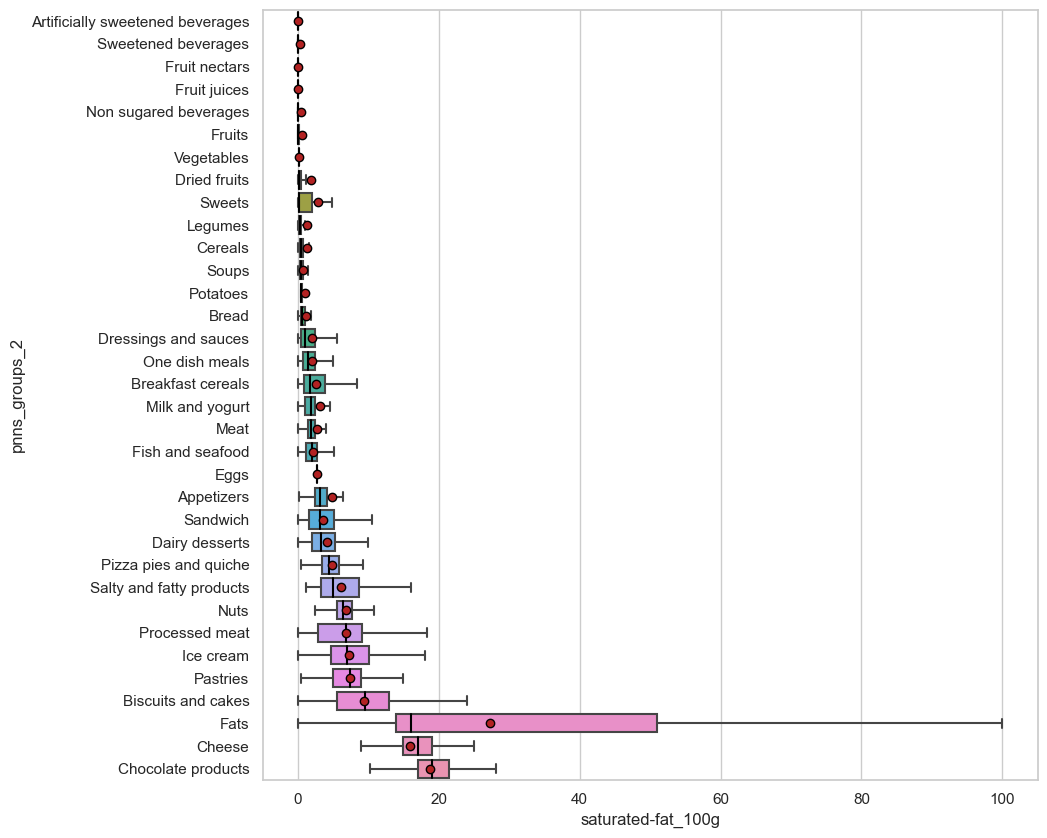

                       sum_sq       df            F  PR(>F)
df[qualitative]  2.549116e+06     33.0  3085.263953     0.0
Residual         1.709480e+06  68278.0          NaN     NaN

Rapport de corrélation η² = 0.599 

------------------------------------------------------------------------------------------------------------------------
Analyse ANOVA entre la variable qualitative pnns_groups_2 et la variable quantitative sodium_100g


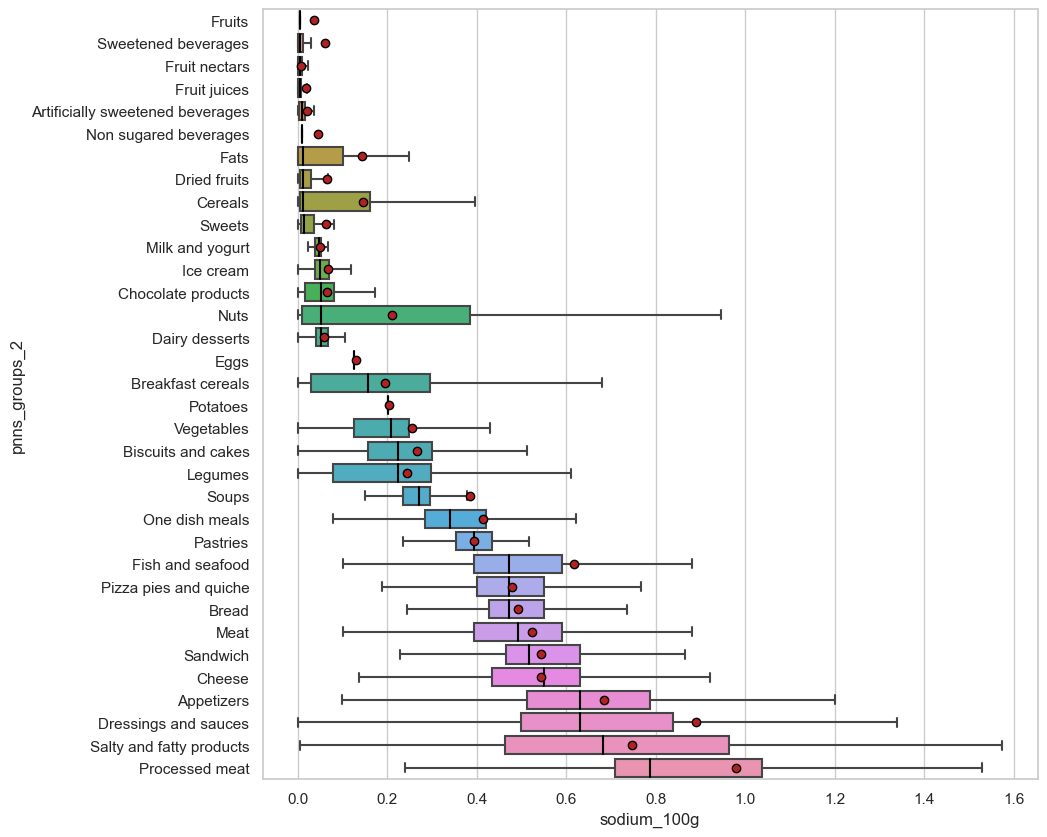

                       sum_sq       df           F  PR(>F)
df[qualitative]   5495.653148     33.0  431.839435     0.0
Residual         26330.788676  68278.0         NaN     NaN

Rapport de corrélation η² = 0.173 

------------------------------------------------------------------------------------------------------------------------
Analyse ANOVA entre la variable qualitative pnns_groups_2 et la variable quantitative sugars_100g


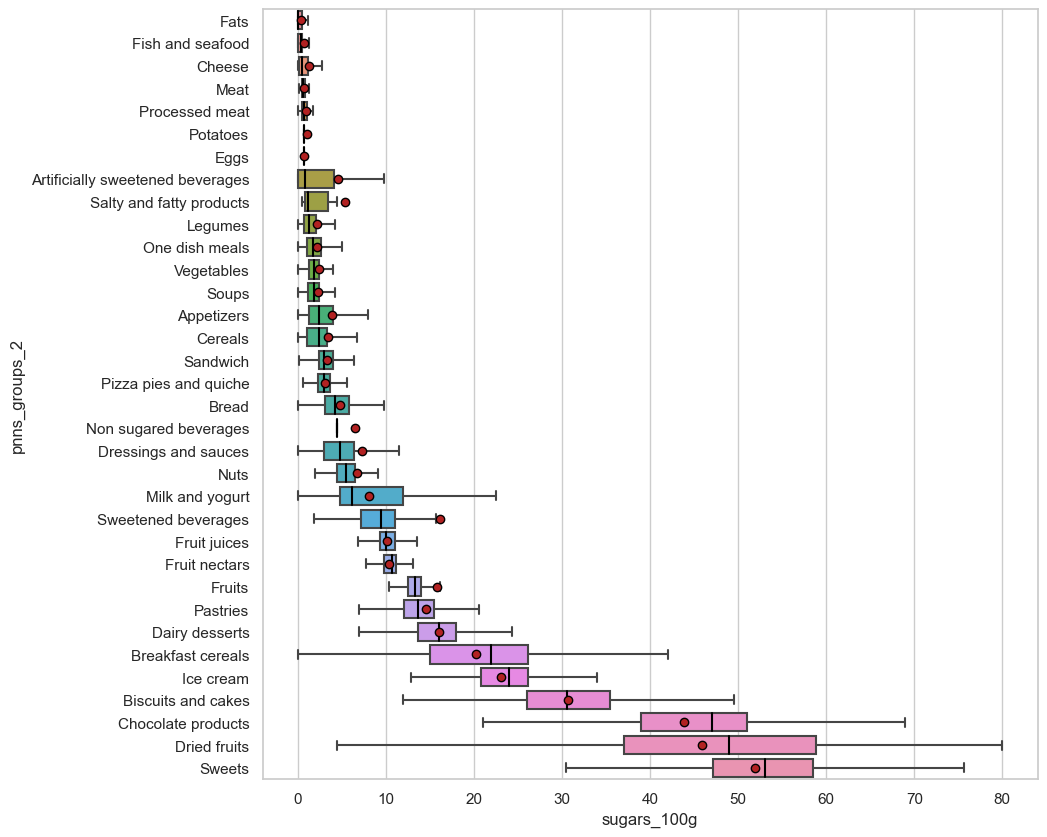

                       sum_sq       df           F  PR(>F)
df[qualitative]  1.657925e+07     33.0  5861.59882     0.0
Residual         5.852151e+06  68278.0         NaN     NaN

Rapport de corrélation η² = 0.739 

------------------------------------------------------------------------------------------------------------------------
Analyse ANOVA entre la variable qualitative pnns_groups_2 et la variable quantitative proteins_100g


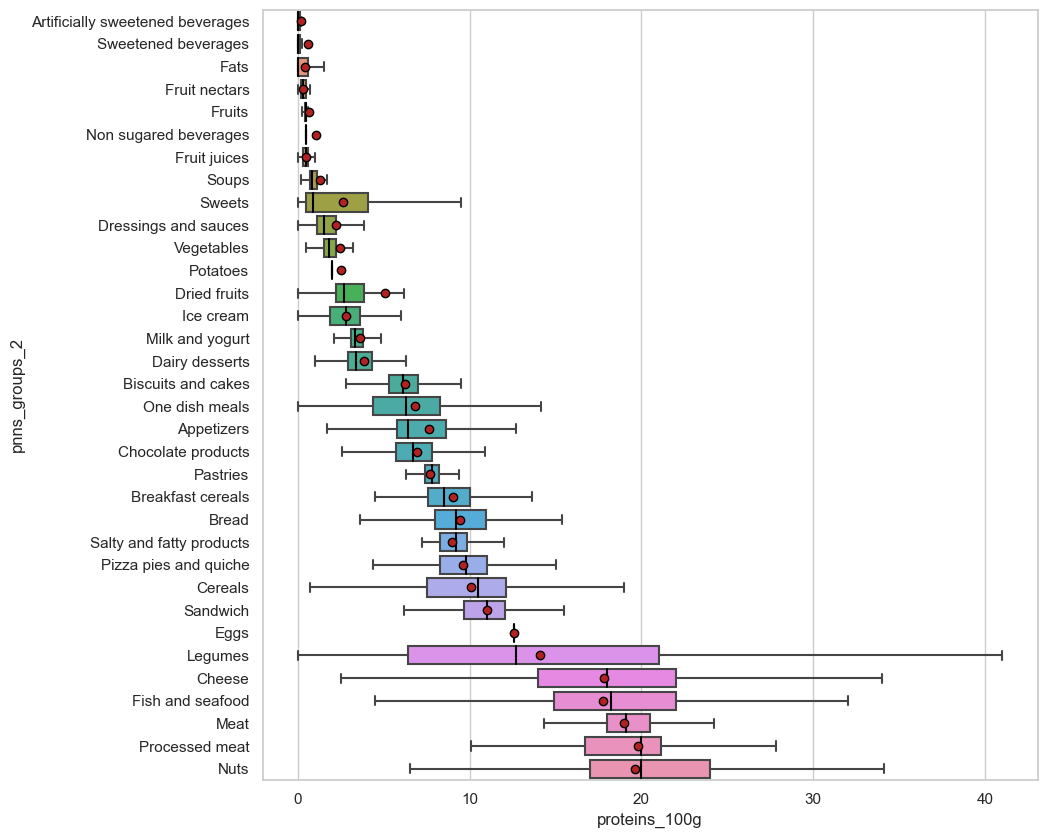

                       sum_sq       df           F  PR(>F)
df[qualitative]  2.608193e+06     33.0  5302.33419     0.0
Residual         1.017746e+06  68278.0         NaN     NaN

Rapport de corrélation η² = 0.719 

------------------------------------------------------------------------------------------------------------------------
Analyse ANOVA entre la variable qualitative pnns_groups_2 et la variable quantitative fiber_100g


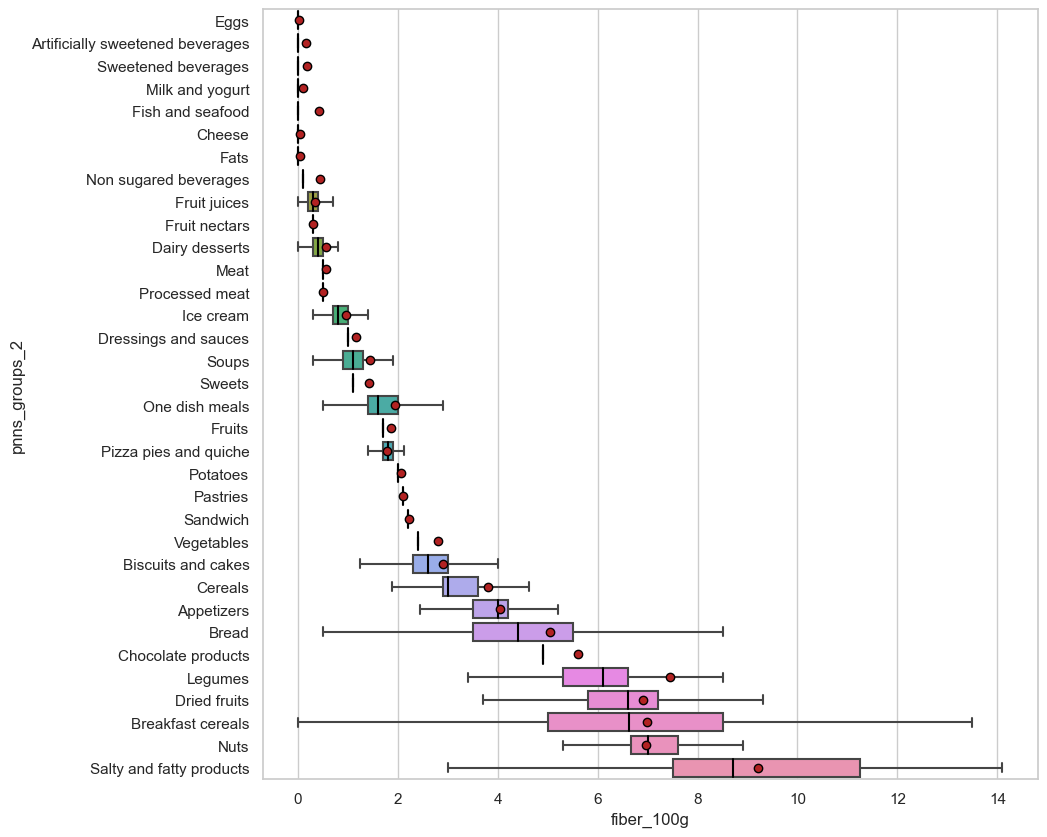

                        sum_sq       df            F  PR(>F)
df[qualitative]  260651.774393     33.0  1441.340116     0.0
Residual         374163.192747  68278.0          NaN     NaN

Rapport de corrélation η² = 0.411 

------------------------------------------------------------------------------------------------------------------------
Analyse ANOVA entre la variable qualitative pnns_groups_2 et la variable quantitative fruits-vegetables-nuts_100g


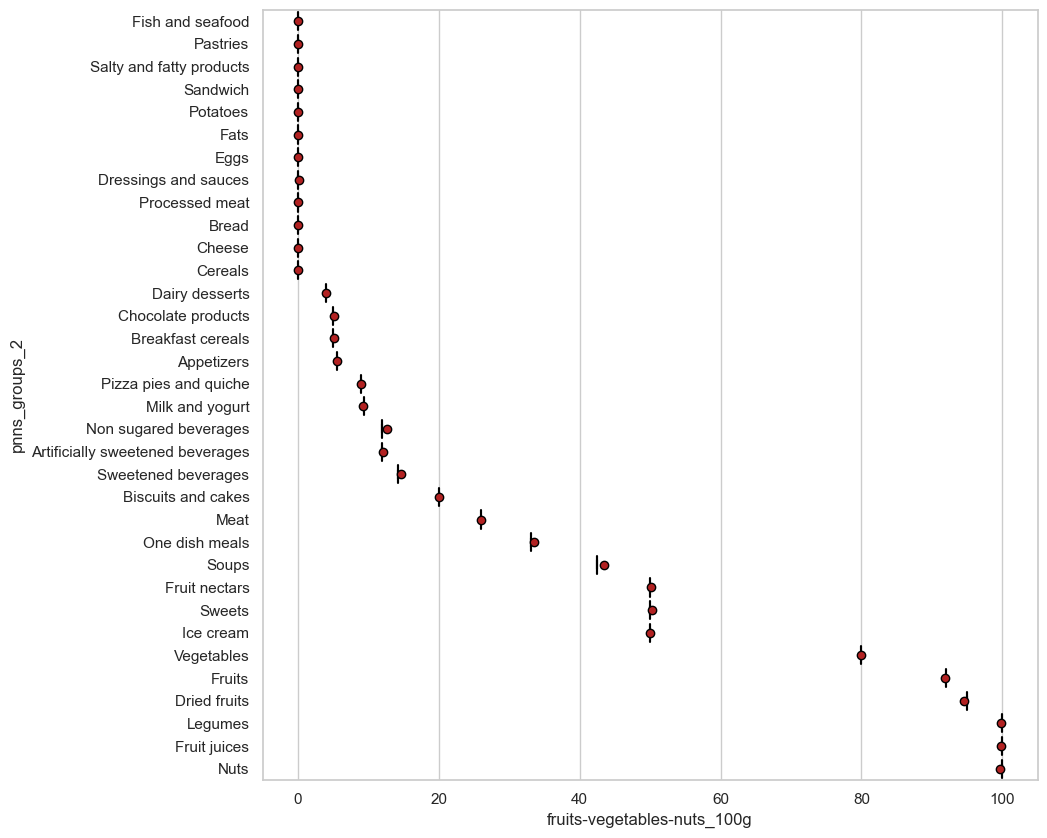

                       sum_sq       df              F  PR(>F)
df[qualitative]  6.591777e+07     33.0  126956.792996     0.0
Residual         1.074270e+06  68278.0            NaN     NaN

Rapport de corrélation η² = 0.984 

------------------------------------------------------------------------------------------------------------------------
Analyse ANOVA entre la variable qualitative pnns_groups_2 et la variable quantitative fat_100g


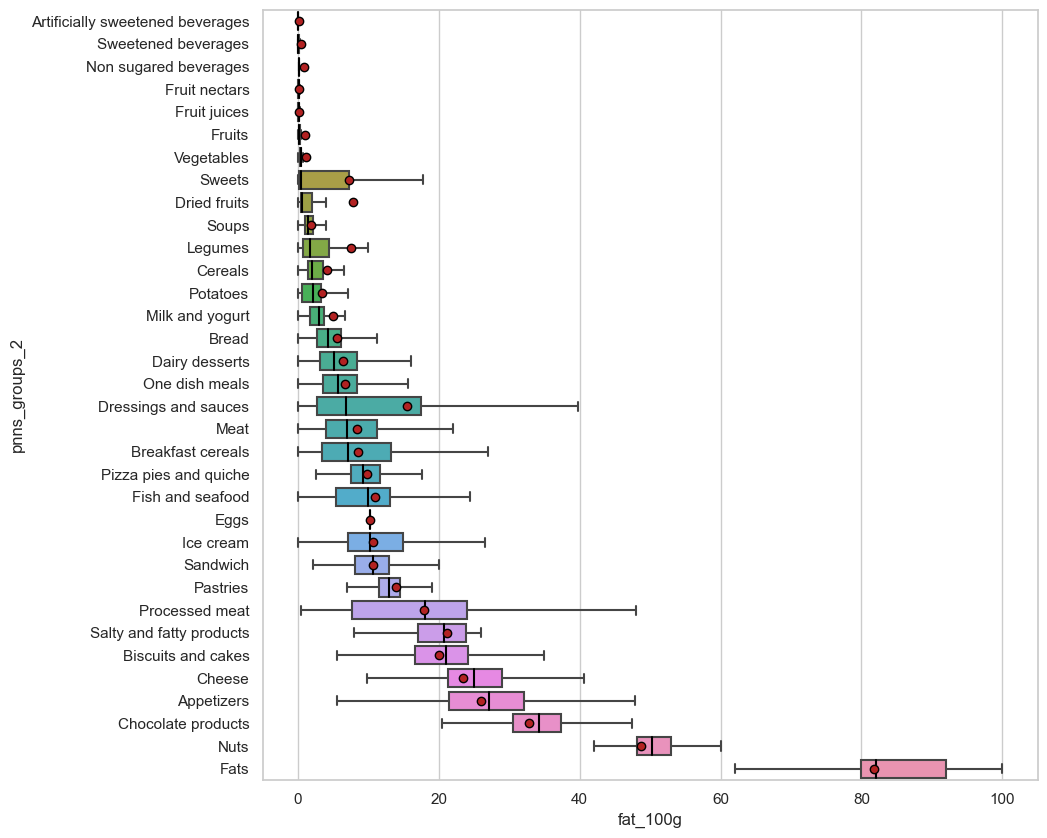

                       sum_sq       df            F  PR(>F)
df[qualitative]  1.419175e+07     33.0  5089.323393     0.0
Residual         5.769560e+06  68278.0          NaN     NaN

Rapport de corrélation η² = 0.711 

------------------------------------------------------------------------------------------------------------------------
Analyse ANOVA entre la variable qualitative pnns_groups_2 et la variable quantitative nutrition-score-fr_100g


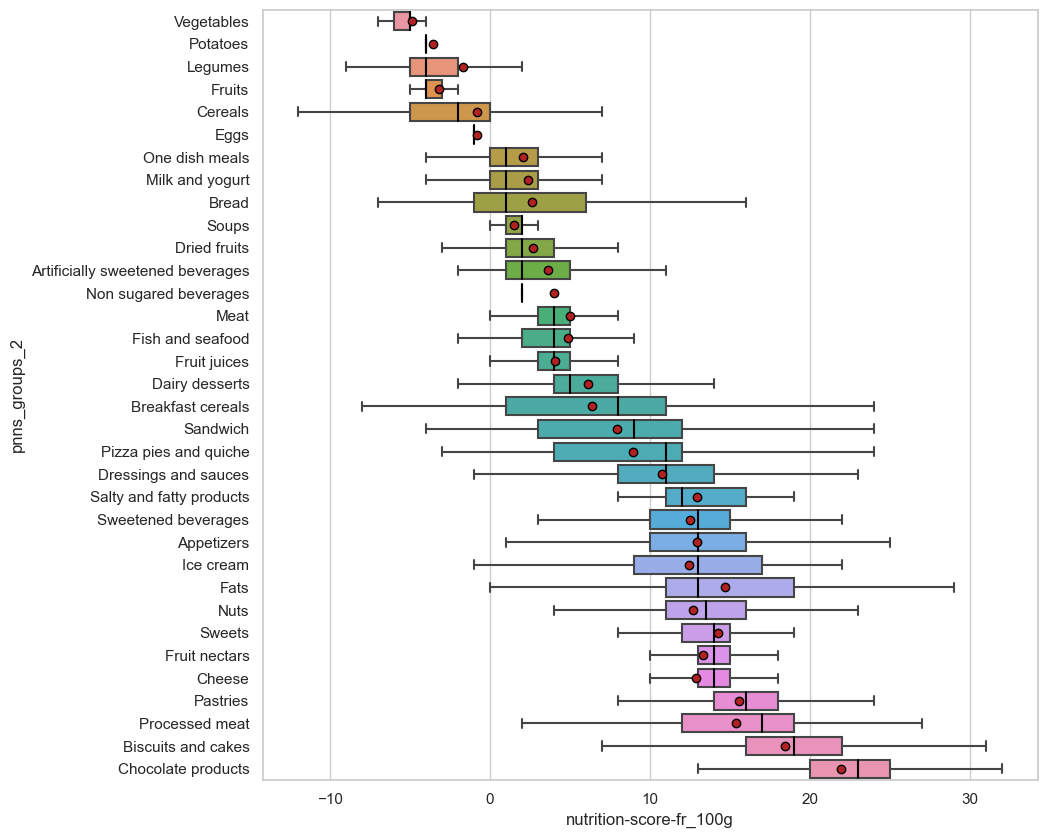

                       sum_sq       df            F  PR(>F)
df[qualitative]  3.679300e+06     33.0  4319.057501     0.0
Residual         1.762557e+06  68278.0          NaN     NaN

Rapport de corrélation η² = 0.676 

------------------------------------------------------------------------------------------------------------------------
Analyse ANOVA entre la variable qualitative nutrition_grade_fr et la variable quantitative energy_100g


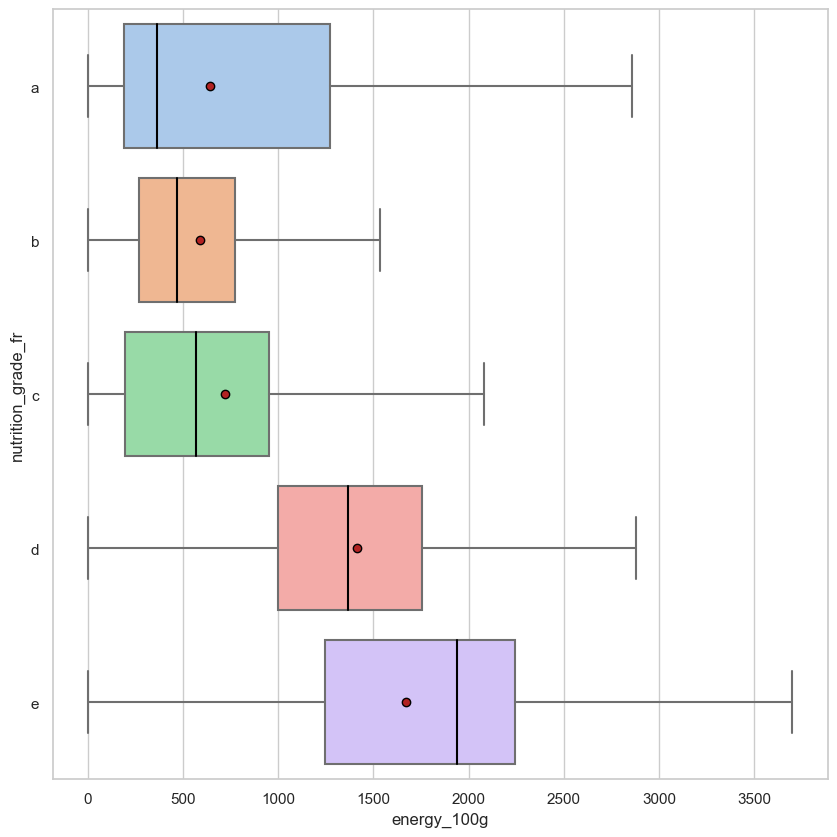

                       sum_sq       df            F  PR(>F)
df[qualitative]  1.277031e+10      4.0  7331.841181     0.0
Residual         2.974359e+10  68307.0          NaN     NaN

Rapport de corrélation η² = 0.3 

------------------------------------------------------------------------------------------------------------------------
Analyse ANOVA entre la variable qualitative nutrition_grade_fr et la variable quantitative saturated-fat_100g


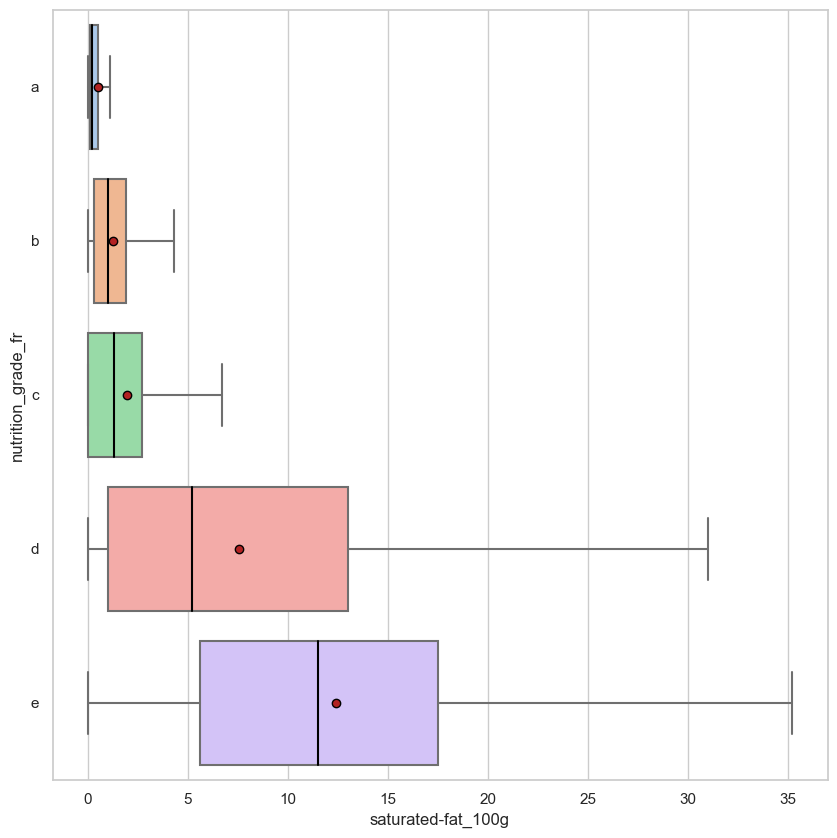

                       sum_sq       df            F  PR(>F)
df[qualitative]  1.287292e+06      4.0  7398.358142     0.0
Residual         2.971304e+06  68307.0          NaN     NaN

Rapport de corrélation η² = 0.302 

------------------------------------------------------------------------------------------------------------------------
Analyse ANOVA entre la variable qualitative nutrition_grade_fr et la variable quantitative sodium_100g


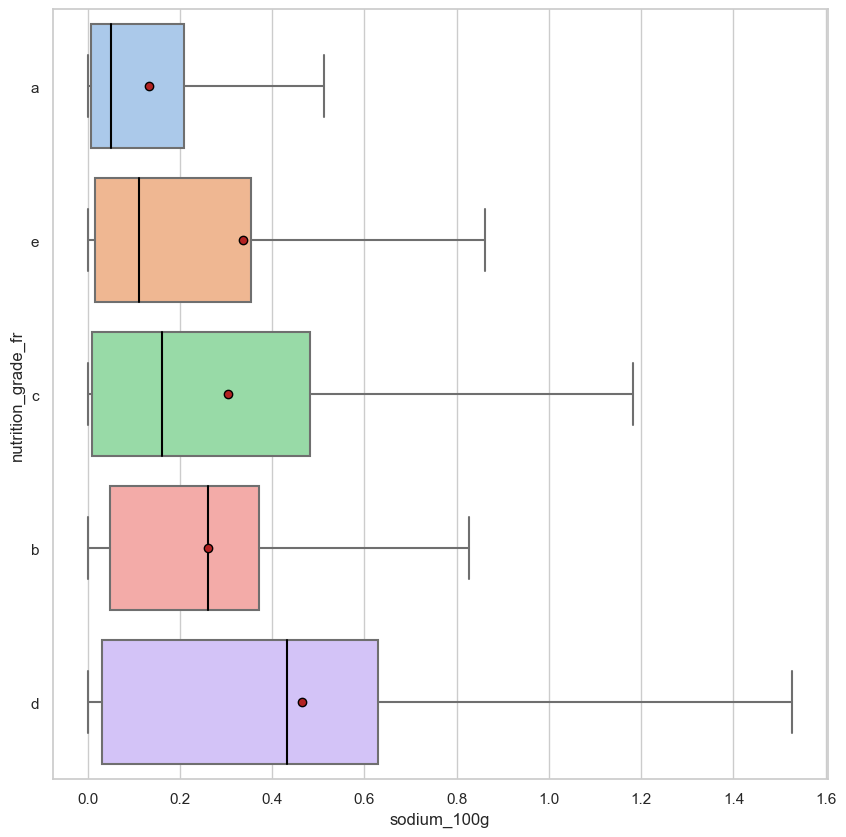

                       sum_sq       df           F  PR(>F)
df[qualitative]    893.946382      4.0  493.516565     0.0
Residual         30932.495441  68307.0         NaN     NaN

Rapport de corrélation η² = 0.028 

------------------------------------------------------------------------------------------------------------------------
Analyse ANOVA entre la variable qualitative nutrition_grade_fr et la variable quantitative sugars_100g


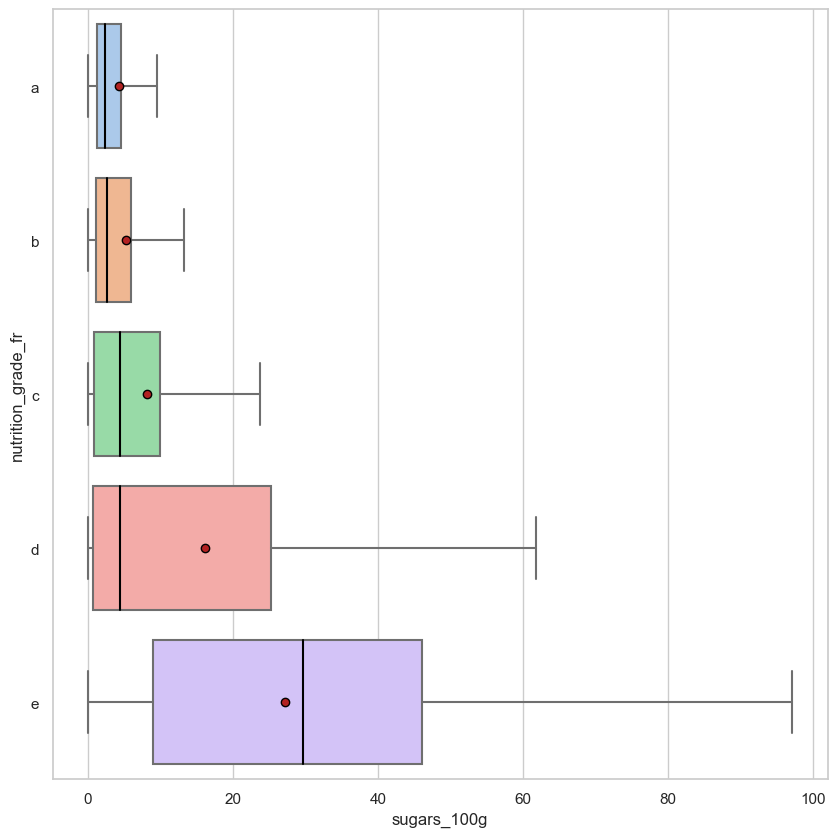

                       sum_sq       df            F  PR(>F)
df[qualitative]  4.411677e+06      4.0  4180.814257     0.0
Residual         1.801972e+07  68307.0          NaN     NaN

Rapport de corrélation η² = 0.197 

------------------------------------------------------------------------------------------------------------------------
Analyse ANOVA entre la variable qualitative nutrition_grade_fr et la variable quantitative proteins_100g


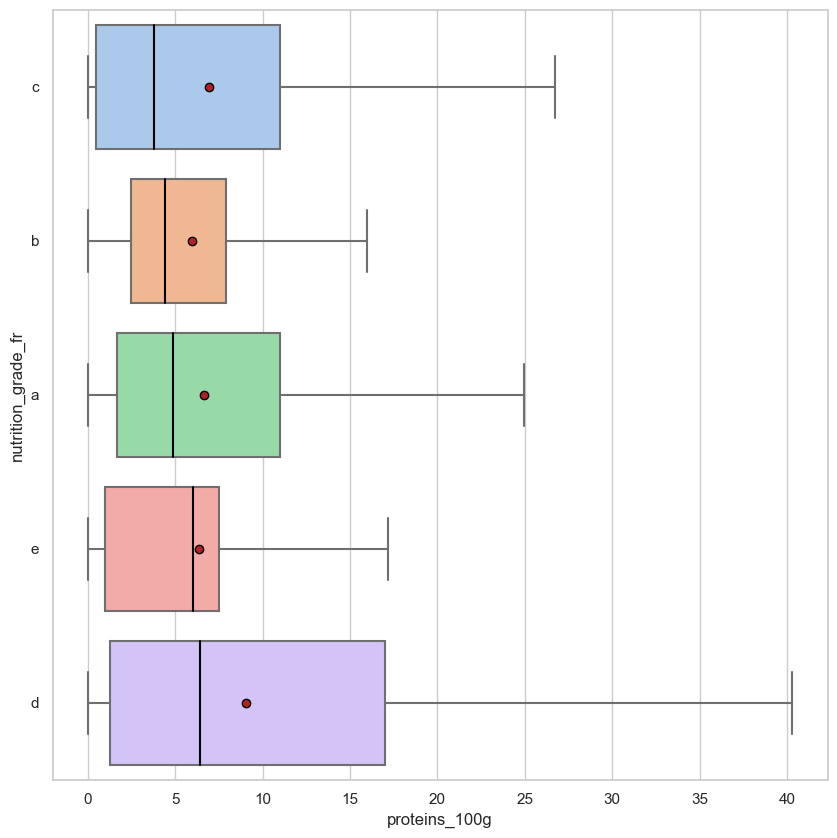

                       sum_sq       df           F  PR(>F)
df[qualitative]  9.178293e+04      4.0  443.487454     0.0
Residual         3.534157e+06  68307.0         NaN     NaN

Rapport de corrélation η² = 0.025 

------------------------------------------------------------------------------------------------------------------------
Analyse ANOVA entre la variable qualitative nutrition_grade_fr et la variable quantitative fiber_100g


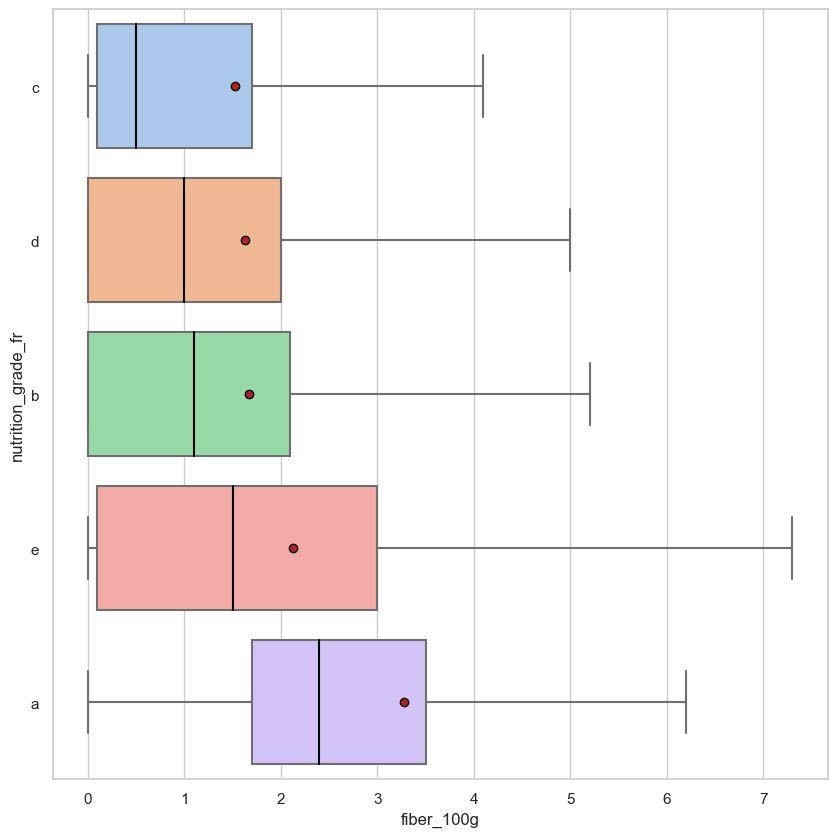

                        sum_sq       df          F  PR(>F)
df[qualitative]   28680.890840      4.0  808.03311     0.0
Residual         606134.076301  68307.0        NaN     NaN

Rapport de corrélation η² = 0.045 

------------------------------------------------------------------------------------------------------------------------
Analyse ANOVA entre la variable qualitative nutrition_grade_fr et la variable quantitative fruits-vegetables-nuts_100g


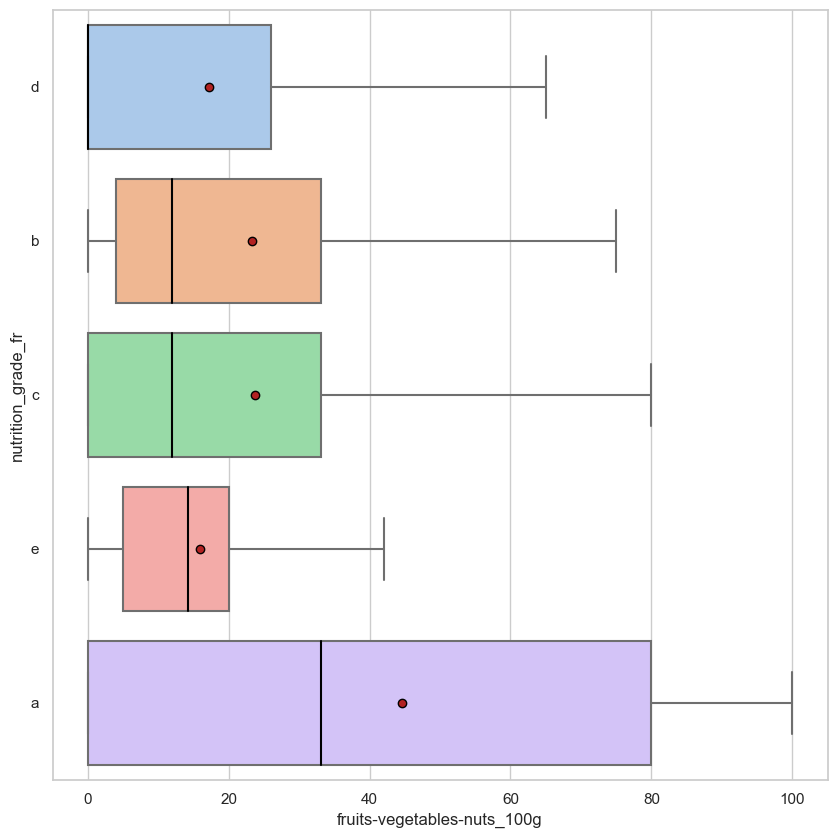

                       sum_sq       df            F  PR(>F)
df[qualitative]  7.239497e+06      4.0  2068.984317     0.0
Residual         5.975254e+07  68307.0          NaN     NaN

Rapport de corrélation η² = 0.108 

------------------------------------------------------------------------------------------------------------------------
Analyse ANOVA entre la variable qualitative nutrition_grade_fr et la variable quantitative fat_100g


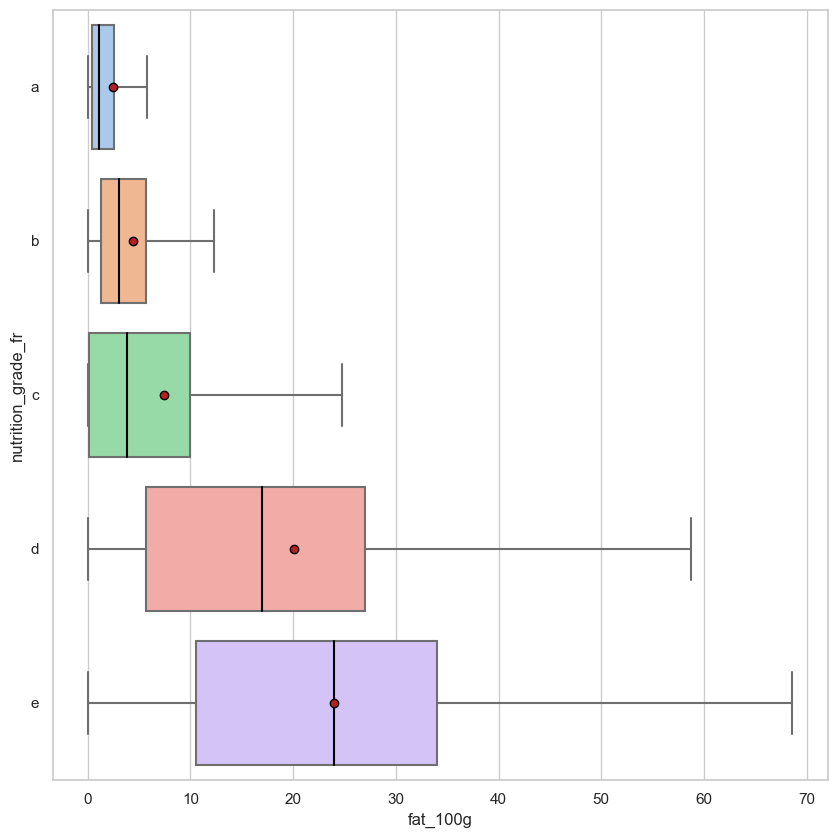

                       sum_sq       df            F  PR(>F)
df[qualitative]  4.945073e+06      4.0  5623.631354     0.0
Residual         1.501623e+07  68307.0          NaN     NaN

Rapport de corrélation η² = 0.248 

------------------------------------------------------------------------------------------------------------------------
Analyse ANOVA entre la variable qualitative nutrition_grade_fr et la variable quantitative nutrition-score-fr_100g


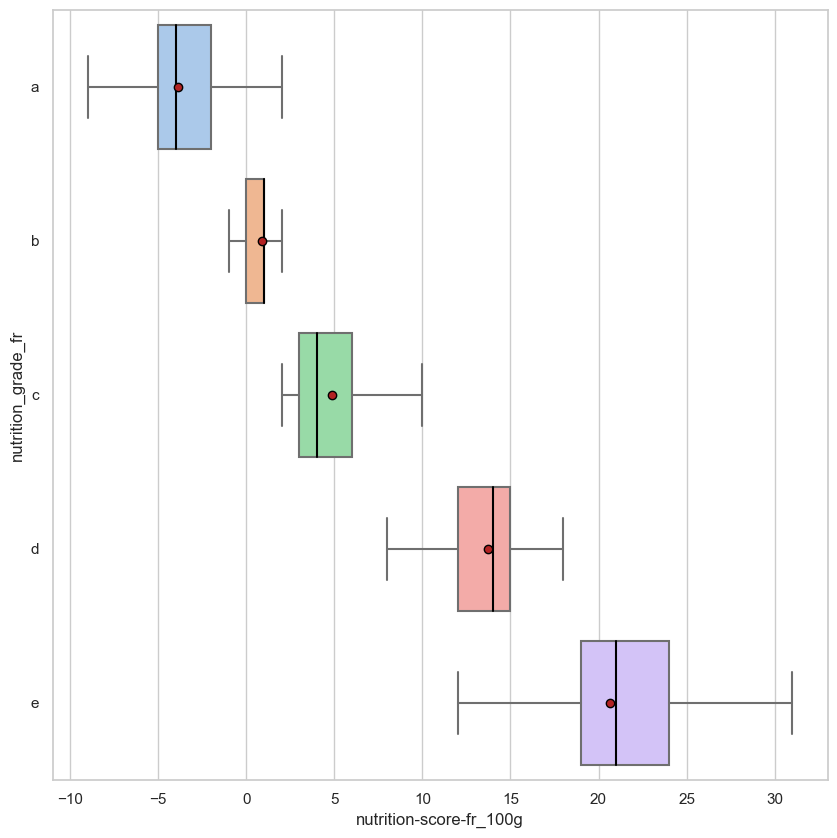

                       sum_sq       df              F  PR(>F)
df[qualitative]  4.931846e+06      4.0  165133.401528     0.0
Residual         5.100113e+05  68307.0            NaN     NaN

Rapport de corrélation η² = 0.906 



In [26]:
# Application de la fonction sur l'ensemble des couples de variables quantitative / qualitatives

for v_qual in variables_qualitatives:
    for v_quant in variables_quantitatives:
        print('-'*120)
        print('Analyse ANOVA entre la variable qualitative',v_qual,'et la variable quantitative',v_quant)
        ANOVA(v_qual, v_quant)

La meilleure corrélation des **familles** de produits se trouve avec le niveau de **sucre**, avec un rapport de corrélation η² de 0,593.

Les corrélations sont globalement plus fortes avec les **sous-familles** et c'est avec le taux de **fruits, légumes et noix** qu'elle est la plus importante, avec un rapport de corrélation de 0,984.

Pour finir, le **nutrigrade** est plus faiblement corrélé aux valeurs nutritionnelles individuelles mais, et c'était attendu, très fortement au **nutriscore** avec un rapport de corrélation de 0,906.

Par curiosité, je cherche le rapport de corrélation entre les pays de vente des produits et le nutriscore.

C:\ProgramData\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2349 (\N{DEVANAGARI LETTER BHA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2366 (\N{DEVANAGARI VOWEL SIGN AA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2352 (\N{DEVANAGARI LETTER RA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2340 (\N{DEVANAGARI LETTER TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\l

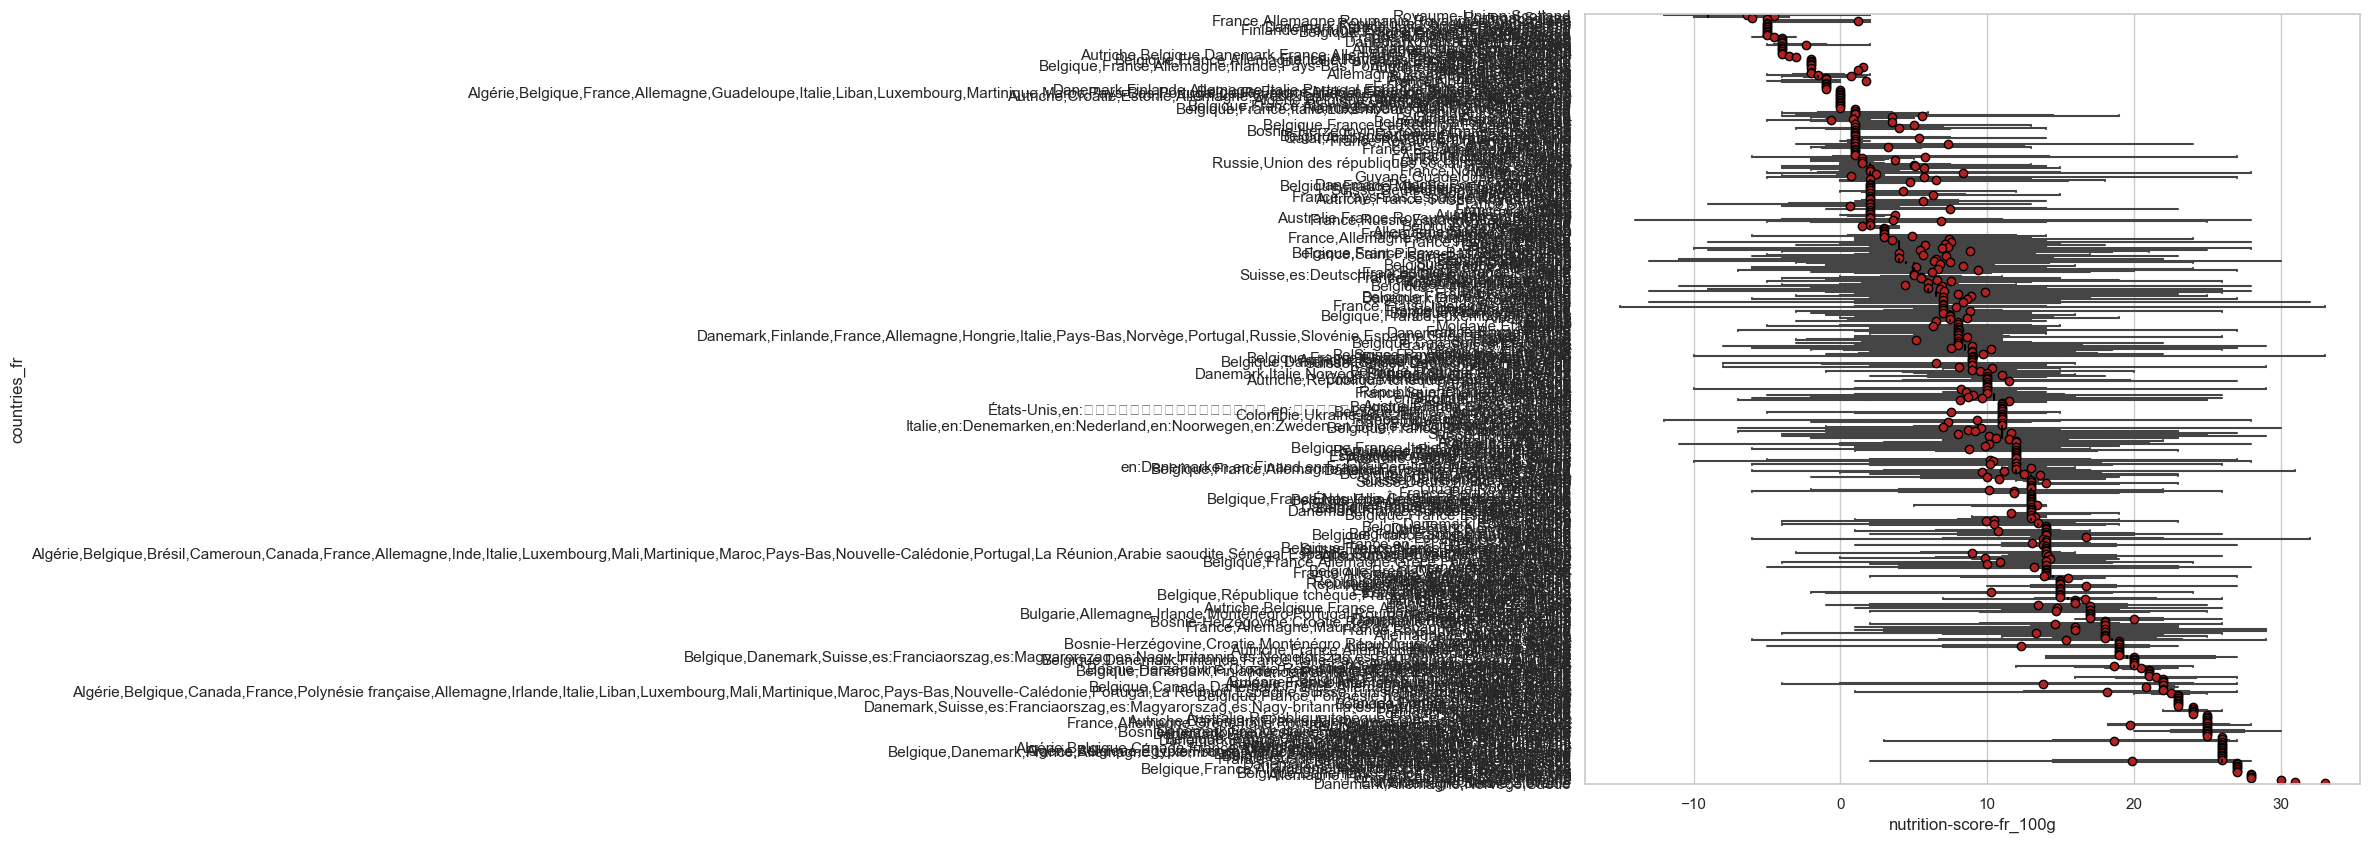

                       sum_sq       df         F         PR(>F)
df[qualitative]  1.460956e+05    487.0  3.842051  5.751677e-158
Residual         5.295762e+06  67824.0       NaN            NaN

Rapport de corrélation η² = 0.027 



In [27]:
ANOVA('countries_fr','nutrition-score-fr_100g')

Le résultat est forcément faussé car les modalités des pays sont parfois des listes de plusieurs pays et il faudrait réaliser un travail de tri/répartition plus poussé mais le rapport de corrélation est tellement bas qu'on peut affirmer que **le nutriscore n'est pas dépendant des pays**.

### Analyses bivariées qualitatives avec le Chi-2

Là aussi, les questions à se poser pourraient être :
- Est-ce que les familles et sous-familles sont liées ?
- Le sont-elles ensuite au nutrigrade ?

Je définis une nouvelle fonction pour présenter :
- le tableau de contingences
- une heatmap

In [28]:
def Chi_2(X,Y):
    # Tableau de contingences
    cont = df[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
    display(cont)
    # Heatmap
    tx = cont.loc[:,["Total"]]
    ty = cont.loc[["Total"],:]
    n = len(df)
    indep = tx.dot(ty) / n

    c = cont.fillna(0) # On remplace les valeurs nulles par 0
    measure = (c-indep)**2/indep
    xi_n = measure.sum().sum()
    table = measure/xi_n
    
    plt.figure(figsize=(10,10))
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    sns.heatmap(table.iloc[:-1,:-1], cmap=cmap, linewidths=.5)
    plt.title("Analyse entre les variables qualitatives \n"+str(X)+' et '+str(Y), color='green', fontsize=15)
    plt.show()

pnns_groups_1                     Beverages  Cereals and potatoes  \
pnns_groups_2                                                       
Appetizers                              NaN                   NaN   
Artificially sweetened beverages      260.0                   NaN   
Biscuits and cakes                      NaN                   NaN   
Bread                                   NaN                1814.0   
Breakfast cereals                       NaN                1403.0   
Cereals                                 NaN                4093.0   
Cheese                                  NaN                   NaN   
Chocolate products                      NaN                   NaN   
Dairy desserts                          NaN                   NaN   
Dressings and sauces                    NaN                   NaN   
Dried fruits                            NaN                   NaN   
Eggs                                    NaN                   NaN   
Fats                                    NaN                   NaN   
Fish and seafood                        NaN                   NaN   
Fruit juices                         1904.0                   NaN   
Fruit nectars                         373.0                   NaN   
Fruits                                  NaN                   NaN   
Ice cream                               NaN                   NaN   
Legumes                                 NaN                 917.0   
Meat                                    NaN                   NaN   
Milk and yogurt                         NaN                   NaN   
Non sugared beverages                4207.0                   NaN   
Nuts                                    NaN                   NaN   
One dish meals                          NaN                   NaN   
Pastries                                NaN                   NaN   
Pizza pies and quiche                   NaN                   NaN   
Potatoes                                NaN                 162.0   
Processed meat                          NaN                   NaN   
Salty and fatty products                NaN                   NaN   
Sandwich                                NaN                   NaN   
Soups                                   NaN                   NaN   
Sweetened beverages                  2151.0                   NaN   
Sweets                                  NaN                   NaN   
Vegetables                              NaN                   NaN   
Total                                8895.0                8389.0   

pnns_groups_1                     Composite foods  Fat and sauces  \
pnns_groups_2                                                       
Appetizers                                    NaN             NaN   
Artificially sweetened beverages              NaN             NaN   
Biscuits and cakes                            NaN             NaN   
Bread                                         NaN             NaN   
Breakfast cereals                             NaN             NaN   
Cereals                                       NaN             NaN   
Cheese                                        NaN             NaN   
Chocolate products                            NaN             NaN   
Dairy desserts                                NaN             NaN   
Dressings and sauces                          NaN          3560.0   
Dried fruits                                  NaN             NaN   
Eggs                                          NaN             NaN   
Fats                                          NaN          1599.0   
Fish and seafood                              NaN             NaN   
Fruit juices                                  NaN             NaN   
Fruit nectars                                 NaN             NaN   
Fruits                                        NaN             NaN   
Ice cream                                     NaN             NaN   
Legumes                                       NaN             NaN 

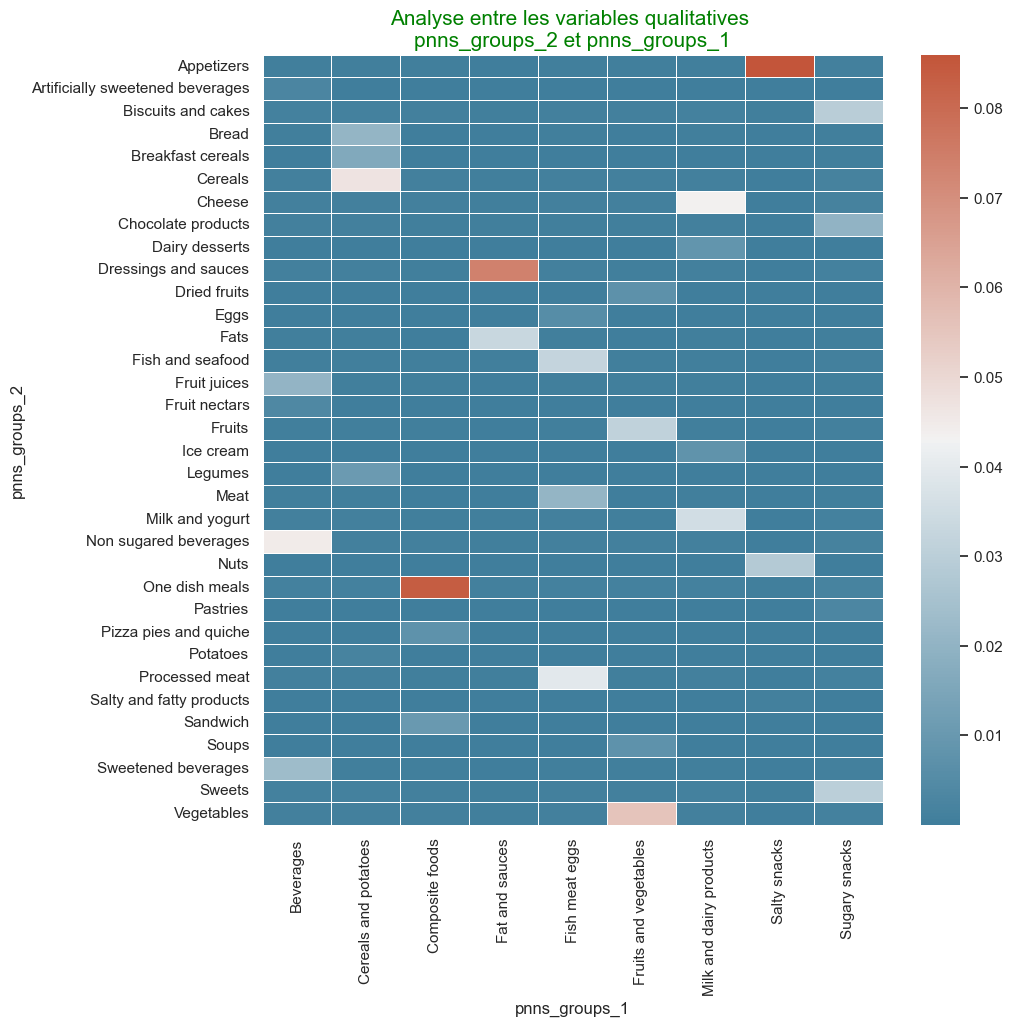

In [29]:
Chi_2('pnns_groups_2','pnns_groups_1')

Je retrouve bien les familles dont dépendent les sous-familles.

nutrition_grade_fr           a     b      c      d      e  Total
pnns_groups_1                                                   
Beverages                  256   812   4271    899   2657   8895
Cereals and potatoes      4555  1394   1485    844    111   8389
Composite foods           1303  2784   1638    929     70   6724
Fat and sauces              93   243    966   3132    725   5159
Fish meat eggs             840   735   2945   2404   1056   7980
Fruits and vegetables     5400   921    485     46      3   6855
Milk and dairy products    634  2046   1780   4045    265   8770
Salty snacks                55    84    664   1621    365   2789
Sugary snacks               68   337    868   5256   6222  12751
Total                    13204  9356  15102  19176  11474  68312

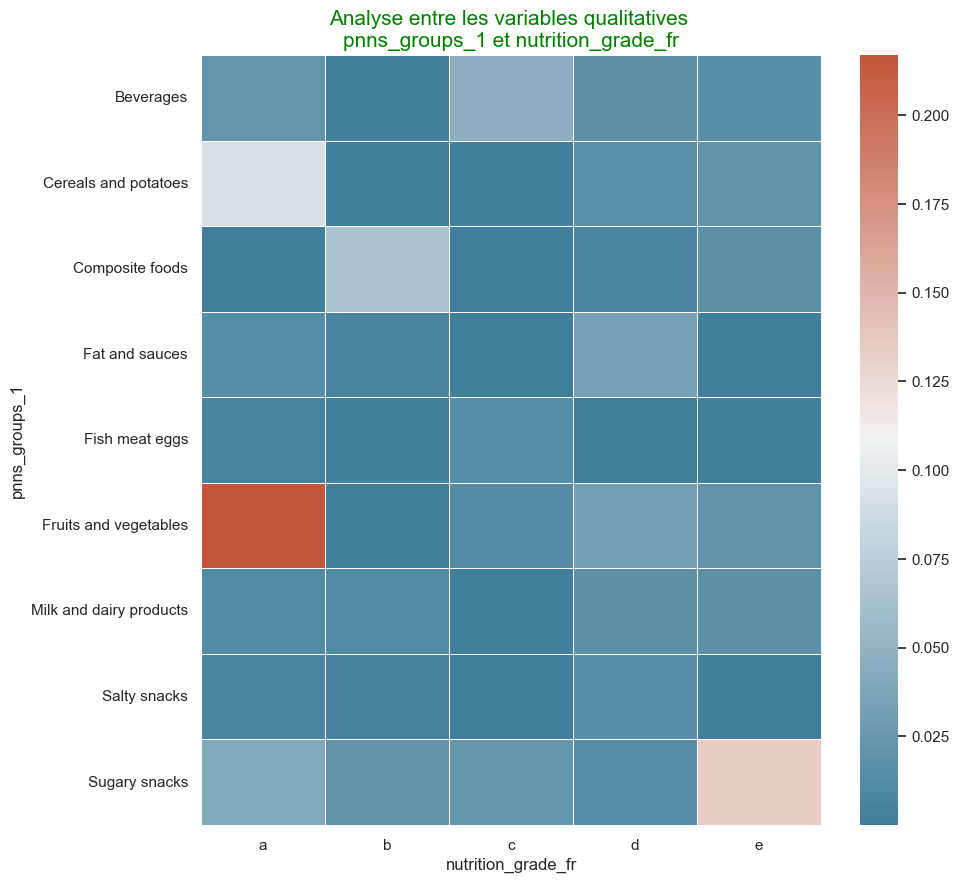

In [30]:
Chi_2('pnns_groups_1','nutrition_grade_fr')

Dans les extrêmes du nutrigrade, en **A**, on est rassuré de retrouver les familles *fruits et légumes* et *Céréales et pommes-de-terre*.
Tandis que les *snacks sucrés* se retrouvent en grade **E**.

nutrition_grade_fr                      a       b        c        d        e  \
pnns_groups_2                                                                  
Appetizers                           25.0    70.0    540.0   1160.0    290.0   
Artificially sweetened beverages      3.0    79.0    114.0     46.0     18.0   
Biscuits and cakes                   22.0    41.0    268.0   1444.0   2762.0   
Bread                               506.0   718.0    393.0    175.0     22.0   
Breakfast cereals                   275.0   112.0    664.0    340.0     12.0   
Cereals                            2905.0   496.0    383.0    249.0     60.0   
Cheese                              189.0    94.0    318.0   3236.0    165.0   
Chocolate products                   16.0    31.0     67.0    422.0   2539.0   
Dairy desserts                       34.0    79.0    524.0    131.0     12.0   
Dressings and sauces                 91.0   241.0    772.0   2132.0    324.0   
Dried fruits                         63.0   259.0    148.0     20.0      NaN   
Eggs                                412.0    38.0      1.0      4.0      NaN   
Fats                                  2.0     2.0    194.0   1000.0    401.0   
Fish and seafood                    244.0   435.0   1393.0    530.0     14.0   
Fruit juices                          NaN   135.0   1428.0    258.0     83.0   
Fruit nectars                         NaN     1.0      8.0     37.0    327.0   
Fruits                             1930.0    44.0    108.0     21.0      3.0   
Ice cream                             2.0    16.0    199.0    416.0     84.0   
Legumes                             725.0    61.0     36.0     78.0     17.0   
Meat                                183.0   174.0    994.0    282.0     45.0   
Milk and yogurt                     409.0  1857.0    739.0    262.0      4.0   
Non sugared beverages               203.0   512.0   2666.0    266.0    560.0   
Nuts                                 29.0    14.0    121.0    448.0     73.0   
One dish meals                     1236.0  2601.0   1268.0    385.0     47.0   
Pastries                              NaN     5.0     30.0    370.0     88.0   
Pizza pies and quiche                10.0    75.0    137.0    283.0      3.0   
Potatoes                            144.0     7.0      9.0      2.0      NaN   
Processed meat                        1.0    88.0    557.0   1588.0    997.0   
Salty and fatty products              1.0     NaN      3.0     13.0      2.0   
Sandwich                             57.0   108.0    233.0    261.0     20.0   
Soups                                39.0   377.0     85.0      NaN      NaN   
Sweetened beverages                  50.0    85.0     55.0    292.0   1669.0   
Sweets                               30.0   260.0    503.0   3020.0    833.0   
Vegetables                         3368.0   241.0    144.0      5.0      NaN   
Total                             13204.0  9356.0  15102.0  19176.0  11474.0   

nutrition_grade_fr                Total  
pnns_groups_2                            
Appetizers                         2085  
Artificially sweetened beverages    260  
Biscuits and cakes                 4537  
Bread                              1814  
Breakfast cereals                  1403  
Cereals                            4093  
Cheese                             4002  
Chocolate products                 3075  
Dairy desserts                      780  
Dressings and sauces               3560  
Dried fruits                        490  
Eggs                                455  
Fats                               1599  
Fish and seafood                   2616  
Fruit juices                       1904  
Fruit nectars                       373  
Fruits                             2106  
Ice cream                           717  
Legumes                             917  
Meat                               1678  
Milk and yogurt                    3271  
Non sugared beverages              4207  
Nuts                           

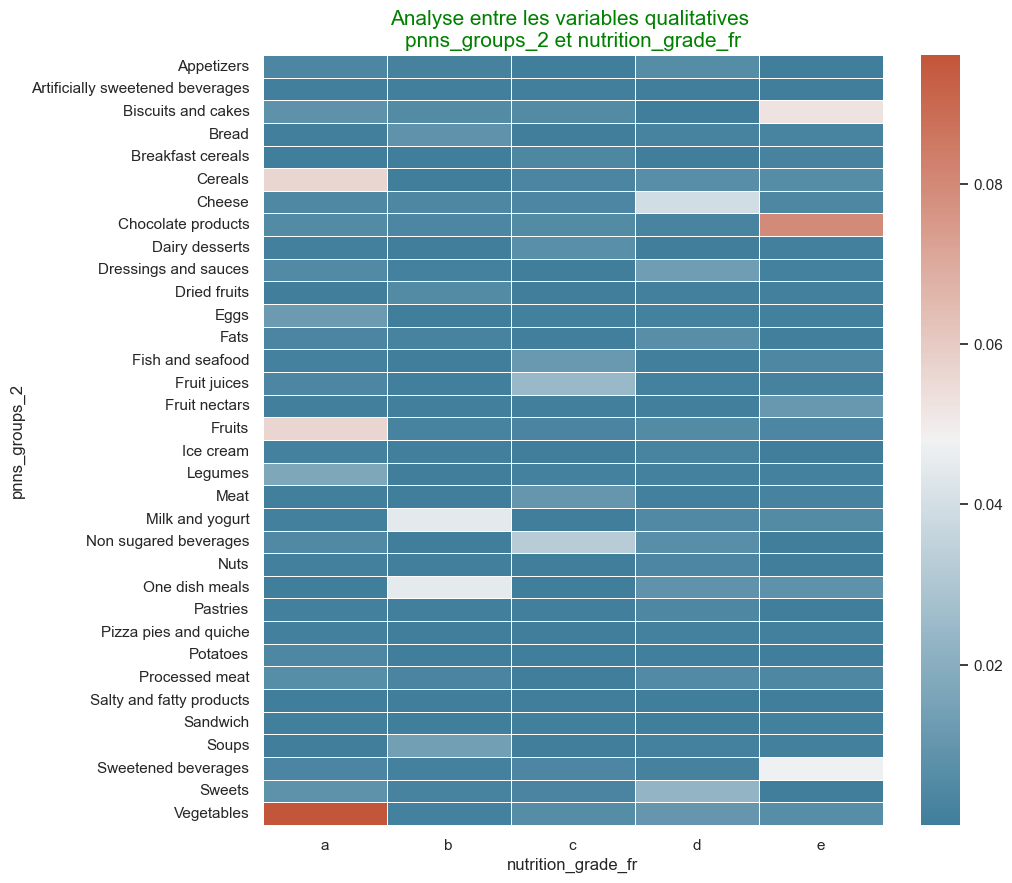

In [31]:
Chi_2('pnns_groups_2','nutrition_grade_fr')

Là encore, on retrouve des sous-familles assez fortement liées à une classe de nutrigrade.

Seule sous-famille qui m'interpelle : les produits chocolatés classés majoritairement en grade **E** !!! Je suppose que les chocolats noirs sont des produits minoritaires.

## Partie 3 - Analyse multivariée avec l'ACP

### Sélection des données

In [32]:
cols = variables_qualitatives + variables_quantitatives
df = df[cols]
df.head()

pnns_groups_1       pnns_groups_2 nutrition_grade_fr  energy_100g  \
0  Fruits and vegetables          Vegetables                  c       1210.0   
1          Sugary snacks  Biscuits and cakes                  e       1520.0   
2   Cereals and potatoes               Bread                  b       1240.5   
3          Sugary snacks  Biscuits and cakes                  c       1090.0   
4   Cereals and potatoes             Legumes                  a        579.0   

   saturated-fat_100g  sodium_100g  sugars_100g  proteins_100g  fiber_100g  \
0               7.000     0.850000          0.0          22.00        2.00   
1               9.600     0.363000         28.1           4.79        2.05   
2               0.600     0.472441          4.2           9.20        4.40   
3               2.000     0.255000         24.7           3.33        2.00   
4               0.275     0.224705          1.3          12.70        6.10   

   fruits-vegetables-nuts_100g  fat_100g  nutrition-score-fr_100g  
0                         80.0      12.0                      6.0  
1                         20.0      14.4                     19.0  
2                          0.0       4.3                      1.0  
3                         20.0      10.7                      9.0  
4                        100.0       1.7                     -4.0

### Data Split

In [33]:
X = df[variables_quantitatives].values
X[:5]

array([[ 1.21000000e+03,  7.00000000e+00,  8.50000000e-01,
         0.00000000e+00,  2.20000000e+01,  2.00000000e+00,
         8.00000000e+01,  1.20000000e+01,  6.00000000e+00],
       [ 1.52000000e+03,  9.60000000e+00,  3.63000000e-01,
         2.81000000e+01,  4.79000000e+00,  2.05000000e+00,
         2.00000000e+01,  1.44000000e+01,  1.90000000e+01],
       [ 1.24050000e+03,  6.00000000e-01,  4.72440945e-01,
         4.20000000e+00,  9.20000000e+00,  4.40000000e+00,
         0.00000000e+00,  4.30000000e+00,  1.00000000e+00],
       [ 1.09000000e+03,  2.00000000e+00,  2.55000000e-01,
         2.47000000e+01,  3.33000000e+00,  2.00000000e+00,
         2.00000000e+01,  1.07000000e+01,  9.00000000e+00],
       [ 5.79000000e+02,  2.75000000e-01,  2.24704724e-01,
         1.30000000e+00,  1.27000000e+01,  6.10000000e+00,
         1.00000000e+02,  1.70000000e+00, -4.00000000e+00]])

### Scaling

In [34]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Je vérifie que les opérations ont bien mené à une moyenne de 0 et un écart-type de 1 :

In [35]:
idx = ["mean", "std"]
pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

0    1    2    3    4    5    6    7    8
mean -0.0 -0.0 -0.0 -0.0  0.0 -0.0 -0.0  0.0 -0.0
std   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0

### ACP

Je vais m'intéresser aux 8 premières composantes :

In [36]:
n_components = 8
pca = PCA(n_components=n_components)
pca.fit(X_scaled)

PCA(n_components=8)

### Explained variance & scree plot

Quelle est la valeur captée par chaque nouvelle composante ?

In [37]:
pca.explained_variance_ratio_

array([0.36502855, 0.18261034, 0.12771691, 0.10445366, 0.08337613,
       0.06649755, 0.03809674, 0.02319928])

In [38]:
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([36.5 , 18.26, 12.77, 10.45,  8.34,  6.65,  3.81,  2.32])

In [39]:
scree_cum = scree.cumsum().round()
scree_cum

array([36., 55., 68., 78., 86., 93., 97., 99.])

Les 4 premières composantes captent 78% de la variance, ce qui est suffisant.

In [40]:
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5, 6, 7, 8]

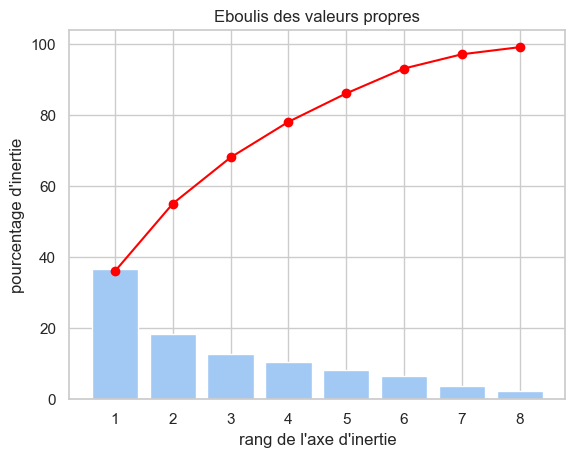

In [41]:
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

On voit mieux la captation de variance à presque 80% pour les 4 premières composantes.

### Composantes

In [42]:
pcs = pca.components_
pcs

array([[ 0.49014206,  0.45713635,  0.08829221,  0.15165774,  0.17895682,
         0.07752951, -0.23886092,  0.4725206 ,  0.44902662],
       [-0.13699062,  0.00852655,  0.41350429, -0.61012417,  0.49871238,
        -0.13712928, -0.38370034,  0.03325323, -0.14857104],
       [ 0.19867197, -0.08325388, -0.03289358, -0.0793975 ,  0.31492496,
         0.84934105,  0.22974103,  0.01946002, -0.2692484 ],
       [-0.02251597, -0.25274455,  0.73501145,  0.446151  ,  0.09794961,
         0.09898868,  0.04163579, -0.31107588,  0.28004651],
       [-0.02338482,  0.24093852,  0.42097636, -0.26275787, -0.21235362,
        -0.12786409,  0.71596825,  0.33815564, -0.08207273],
       [ 0.04921859, -0.04940733,  0.27660206, -0.18457764, -0.739097  ,
         0.32899888, -0.44579948,  0.12444629, -0.12581788],
       [-0.52127642,  0.69590923, -0.01592281, -0.02819339, -0.03559971,
         0.27750564, -0.02365965, -0.35313215,  0.19847929],
       [ 0.18619547,  0.39610608,  0.16072692,  0.4134772 ,  0

Sous forme de dataframe :

In [43]:
pcs = pd.DataFrame(pcs)
pcs

0         1         2         3         4         5         6  \
0  0.490142  0.457136  0.088292  0.151658  0.178957  0.077530 -0.238861   
1 -0.136991  0.008527  0.413504 -0.610124  0.498712 -0.137129 -0.383700   
2  0.198672 -0.083254 -0.032894 -0.079397  0.314925  0.849341  0.229741   
3 -0.022516 -0.252745  0.735011  0.446151  0.097950  0.098989  0.041636   
4 -0.023385  0.240939  0.420976 -0.262758 -0.212354 -0.127864  0.715968   
5  0.049219 -0.049407  0.276602 -0.184578 -0.739097  0.328999 -0.445799   
6 -0.521276  0.695909 -0.015923 -0.028193 -0.035600  0.277506 -0.023660   
7  0.186195  0.396106  0.160727  0.413477  0.053029 -0.178139 -0.129252   

          7         8  
0  0.472521  0.449027  
1  0.033253 -0.148571  
2  0.019460 -0.269248  
3 -0.311076  0.280047  
4  0.338156 -0.082073  
5  0.124446 -0.125818  
6 -0.353132  0.198479  
7 -0.088955 -0.743283

En plus clair, pour calculer les nouvelles composantes :

In [44]:
pcs.columns = variables_quantitatives
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

energy_100g  saturated-fat_100g  sodium_100g  sugars_100g  proteins_100g  \
F1         0.49                0.46         0.09         0.15           0.18   
F2        -0.14                0.01         0.41        -0.61           0.50   
F3         0.20               -0.08        -0.03        -0.08           0.31   
F4        -0.02               -0.25         0.74         0.45           0.10   
F5        -0.02                0.24         0.42        -0.26          -0.21   
F6         0.05               -0.05         0.28        -0.18          -0.74   
F7        -0.52                0.70        -0.02        -0.03          -0.04   
F8         0.19                0.40         0.16         0.41           0.05   

    fiber_100g  fruits-vegetables-nuts_100g  fat_100g  nutrition-score-fr_100g  
F1        0.08                        -0.24      0.47                     0.45  
F2       -0.14                        -0.38      0.03                    -0.15  
F3        0.85                         0.23      0.02                    -0.27  
F4        0.10                         0.04     -0.31                     0.28  
F5       -0.13                         0.72      0.34                    -0.08  
F6        0.33                        -0.45      0.12                    -0.13  
F7        0.28                        -0.02     -0.35                     0.20  
F8       -0.18                        -0.13     -0.09                    -0.74

et en version transposée :

In [45]:
pcs.T

F1        F2        F3        F4        F5  \
energy_100g                  0.490142 -0.136991  0.198672 -0.022516 -0.023385   
saturated-fat_100g           0.457136  0.008527 -0.083254 -0.252745  0.240939   
sodium_100g                  0.088292  0.413504 -0.032894  0.735011  0.420976   
sugars_100g                  0.151658 -0.610124 -0.079397  0.446151 -0.262758   
proteins_100g                0.178957  0.498712  0.314925  0.097950 -0.212354   
fiber_100g                   0.077530 -0.137129  0.849341  0.098989 -0.127864   
fruits-vegetables-nuts_100g -0.238861 -0.383700  0.229741  0.041636  0.715968   
fat_100g                     0.472521  0.033253  0.019460 -0.311076  0.338156   
nutrition-score-fr_100g      0.449027 -0.148571 -0.269248  0.280047 -0.082073   

                                   F6        F7        F8  
energy_100g                  0.049219 -0.521276  0.186195  
saturated-fat_100g          -0.049407  0.695909  0.396106  
sodium_100g                  0.276602 -0.015923  0.160727  
sugars_100g                 -0.184578 -0.028193  0.413477  
proteins_100g               -0.739097 -0.035600  0.053029  
fiber_100g                   0.328999  0.277506 -0.178139  
fruits-vegetables-nuts_100g -0.445799 -0.023660 -0.129252  
fat_100g                     0.124446 -0.353132 -0.088955  
nutrition-score-fr_100g     -0.125818  0.198479 -0.743283

Ou en version plus visuelle pour identifier les niveaux de pondération en fonction des variables :

<Axes: >

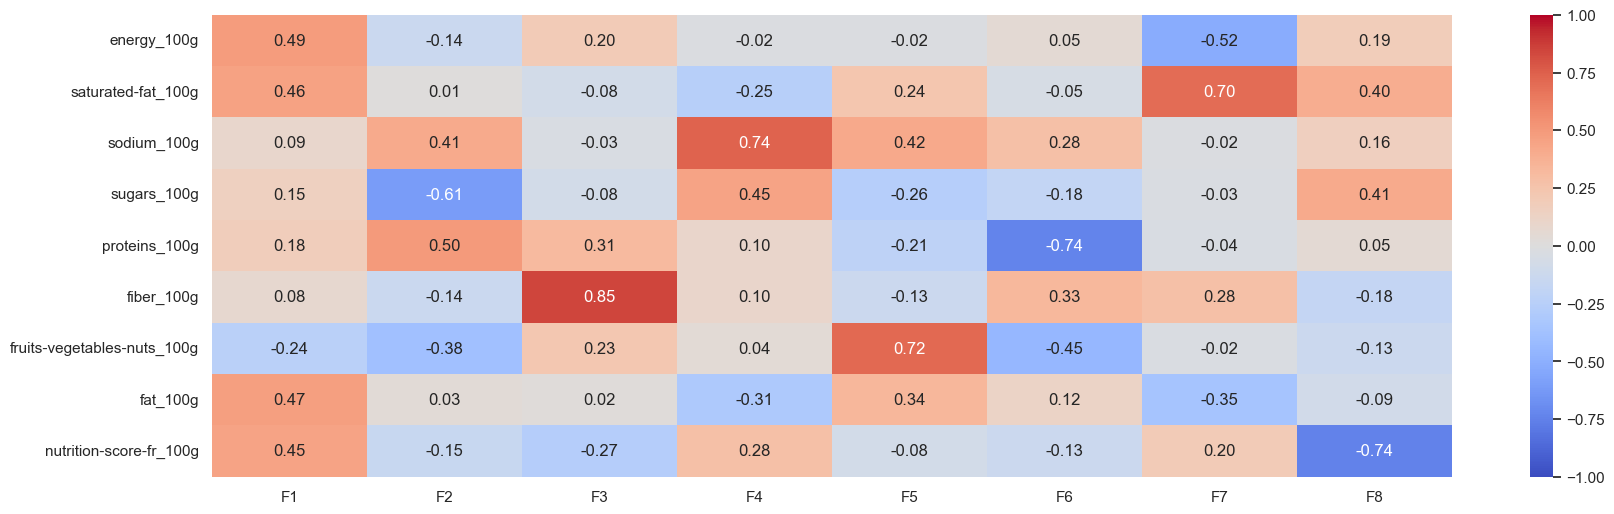

In [46]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

### Graphe des corrélations

Pour le cercle des corrélations, j'utilise la fonction suivante :

In [47]:
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # J'ai copié collé le code sans le lire
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

Ce qui donne pour les 2 premières composantes :

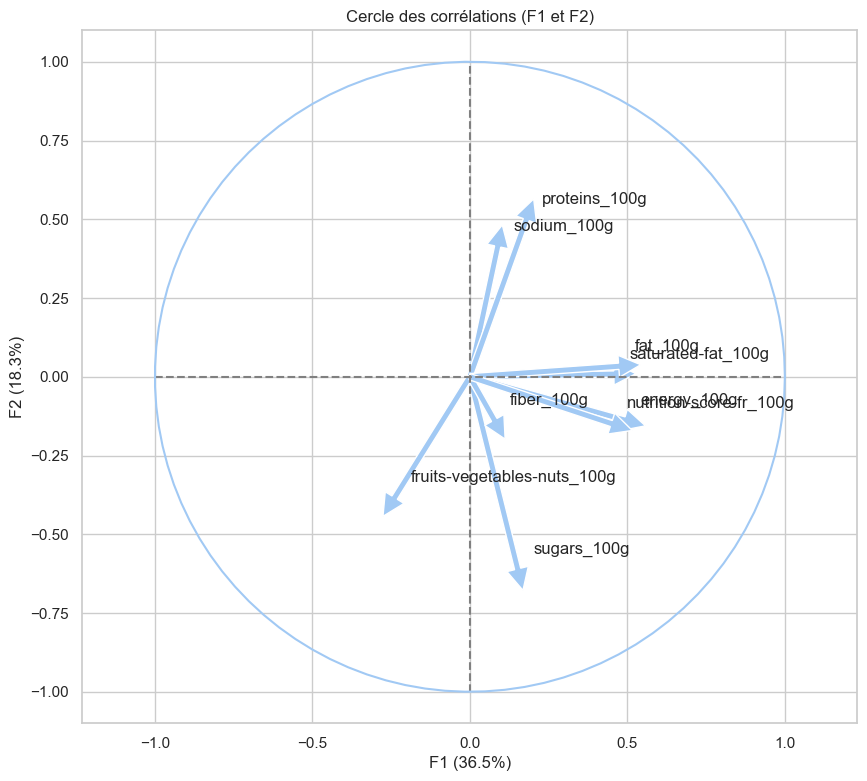

In [48]:
correlation_graph(pca, (0,1), variables_quantitatives)

La composante **F1** semble être le siège des produits gras et caloriques, entraînant naturellement le nutriscore vers le haut.

La composante **F2** paraît distinguer, d'un côté, les produits plutôt protéinés et salés et de l'autre côté, les végétaux sucrés.

J'observe la projection sur les 2 composantes suivantes :

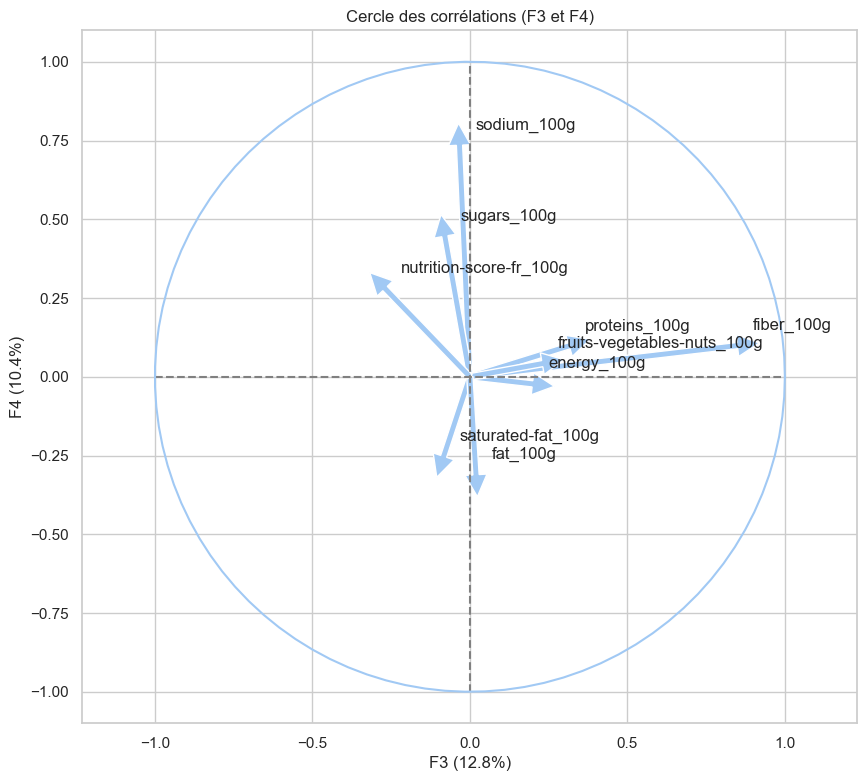

In [49]:
correlation_graph(pca, (2,3), variables_quantitatives)

La composante **F3** est fortement corrélée au taux de fibres, tandis que la composante **F4** l'est avec le sel et le sucre et négativement avec les graisses.

### Projection

Je calcule les nouvelles coordonnées des observations.

In [50]:
X_proj = pca.transform(X_scaled)
X_proj[:5]

array([[ 0.0307762 ,  1.07590613,  1.142152  ,  0.4210337 ,  1.41409439,
        -1.92434199, -0.06547973,  0.01451659],
       [ 1.30264268, -0.87314832, -0.46644678,  0.55107746, -0.16788008,
         0.03480787,  0.29997134, -0.231024  ],
       [-0.44207049,  0.75786773,  0.88766216,  0.10459367, -0.73882651,
         0.63264544, -0.25810543,  0.26080311],
       [-0.08946851, -0.69606588, -0.25408354,  0.33893811, -0.34094721,
         0.30315158, -0.22130336,  0.02752557],
       [-1.88515523, -0.16403174,  2.25558434, -0.07864936,  1.26763272,
        -1.02104496,  0.16526451, -0.0928225 ]])

Pour la projection des individus sur les nouveaux plans, j'utilise la fonction suivante :

In [51]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        # j'ai copié collé la fonction sans la lire
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()

Ce qui donne les visualisations projetées sur les 2 premières composantes puis les 2 suivantes, en faisant varier les clusters parmi les variables qualitatives :

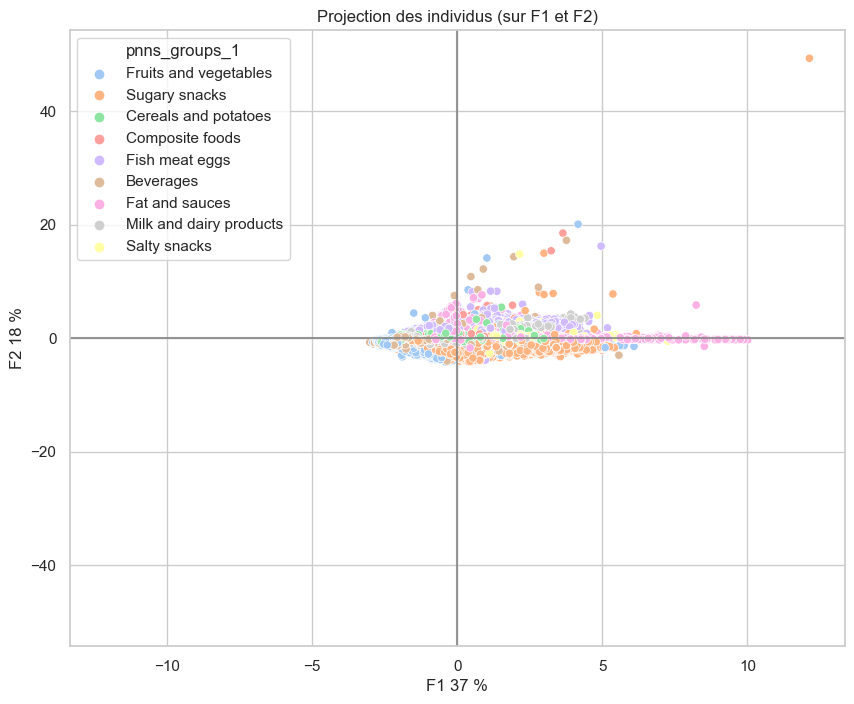

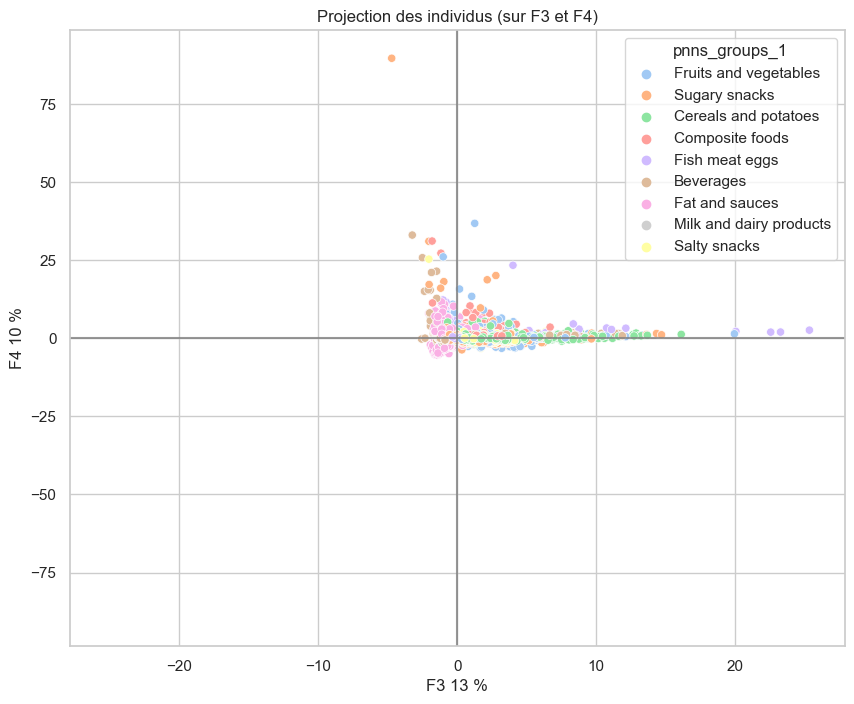

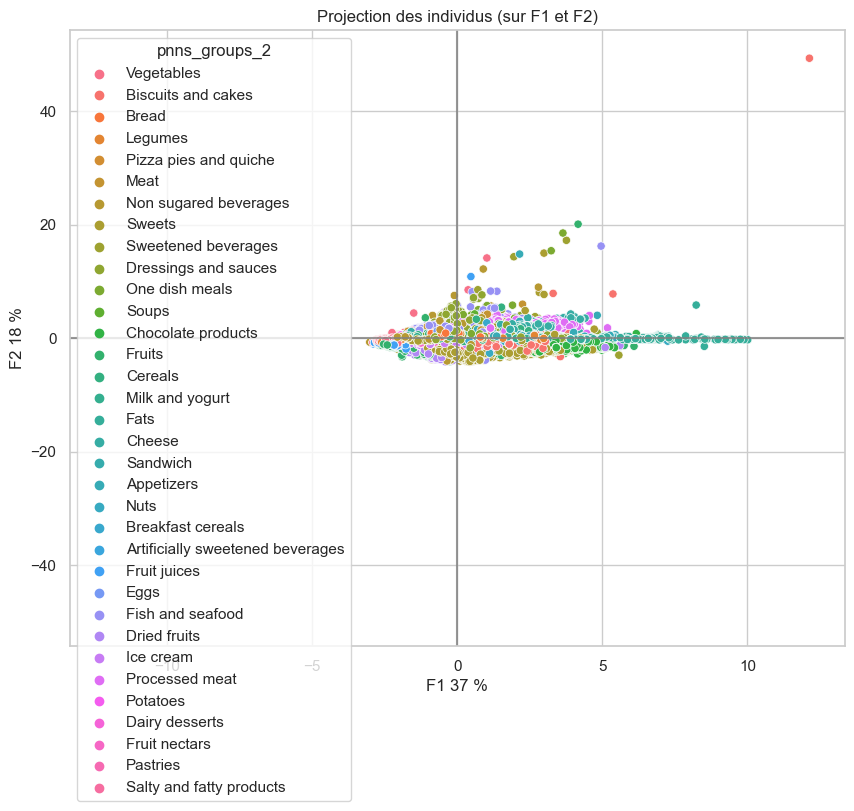

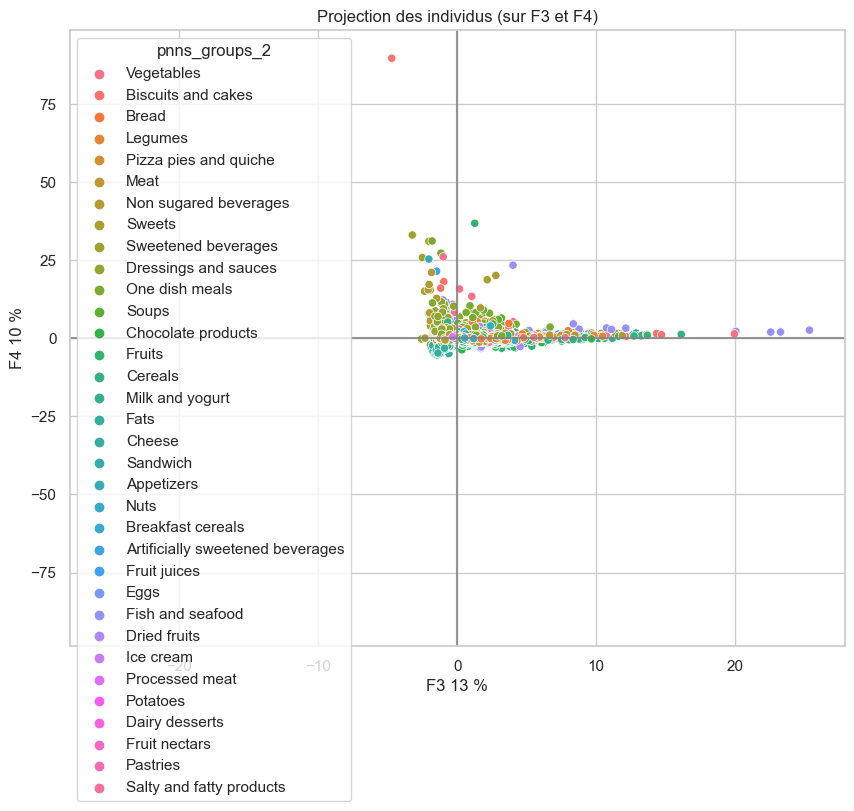

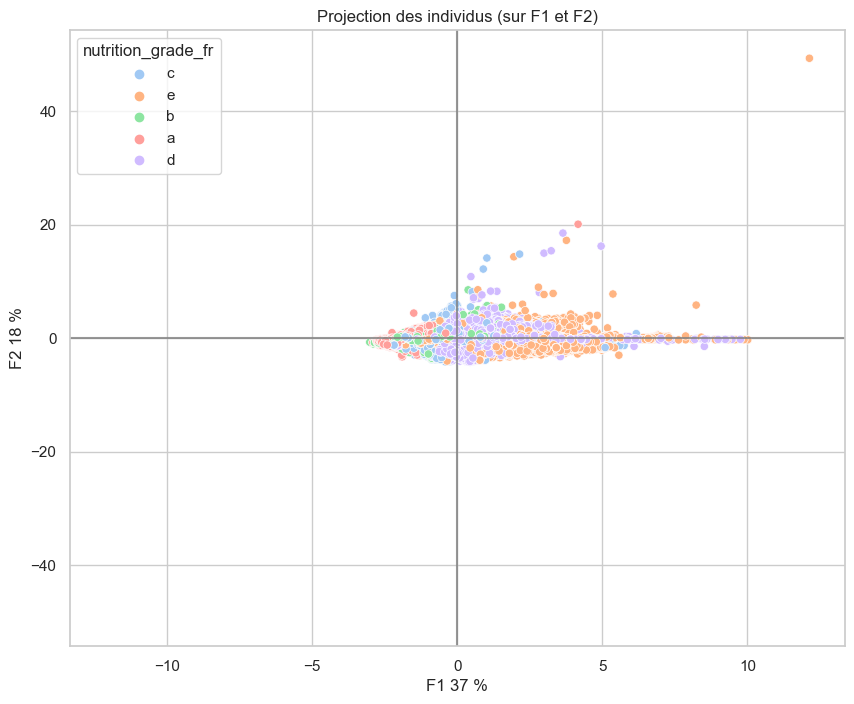

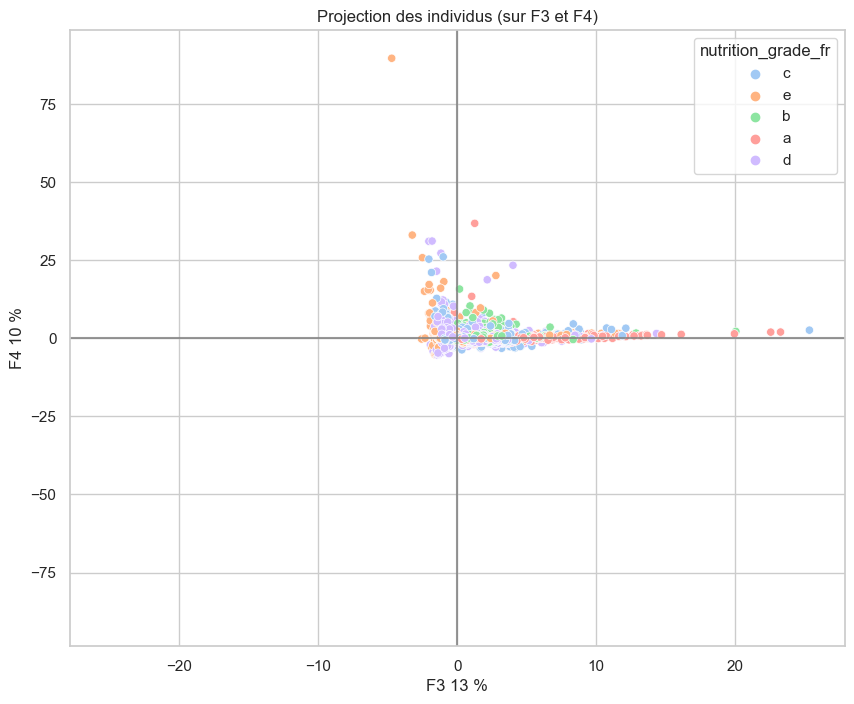

In [52]:
for v_qual in variables_qualitatives:
    for x_y in [[0,1],[2,3]]:
        display_factorial_planes(X_proj, x_y, pca=pca, clusters=df[v_qual])